<a href="https://colab.research.google.com/github/AyaLyousfi/Deep-Dive-Titanic-DNN-From-Scratch/blob/main/Titanic_Survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survivors Deep Learning Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pickle
import os

# **Loading & Reading DataSet**

In [ ]:
train_path = 'Titanic_data/train.csv'
test_path= 'Titanic_data/test.csv'
full_data = 'Titanic_data/titanic full.xls'

In [ ]:
import pandas as pd
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
origin_df = pd.read_csv(test_path)

In [ ]:
train_df.shape

(891, 12)

In [ ]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
test_df.shape

(418, 11)

In [ ]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [ ]:
X = train_df.drop(columns = ['Survived'])
Y = train_df['Survived']

In [ ]:
X

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1    female  38.0      1      0          PC 17599  71.2833   C85        C  
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3    female  35.0      1      0            113803  53.1000  C123        S  
4      male  35.0      0      0            373450   8.0500   NaN        S  
..      ...   ...    ...    ...               ...      ...   ...      ...  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

In [ ]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

***Split the training Set into training and validation sets***

# **Analyzing the Training set**



*   ***Checking for missing values***



In [ ]:
print(X.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

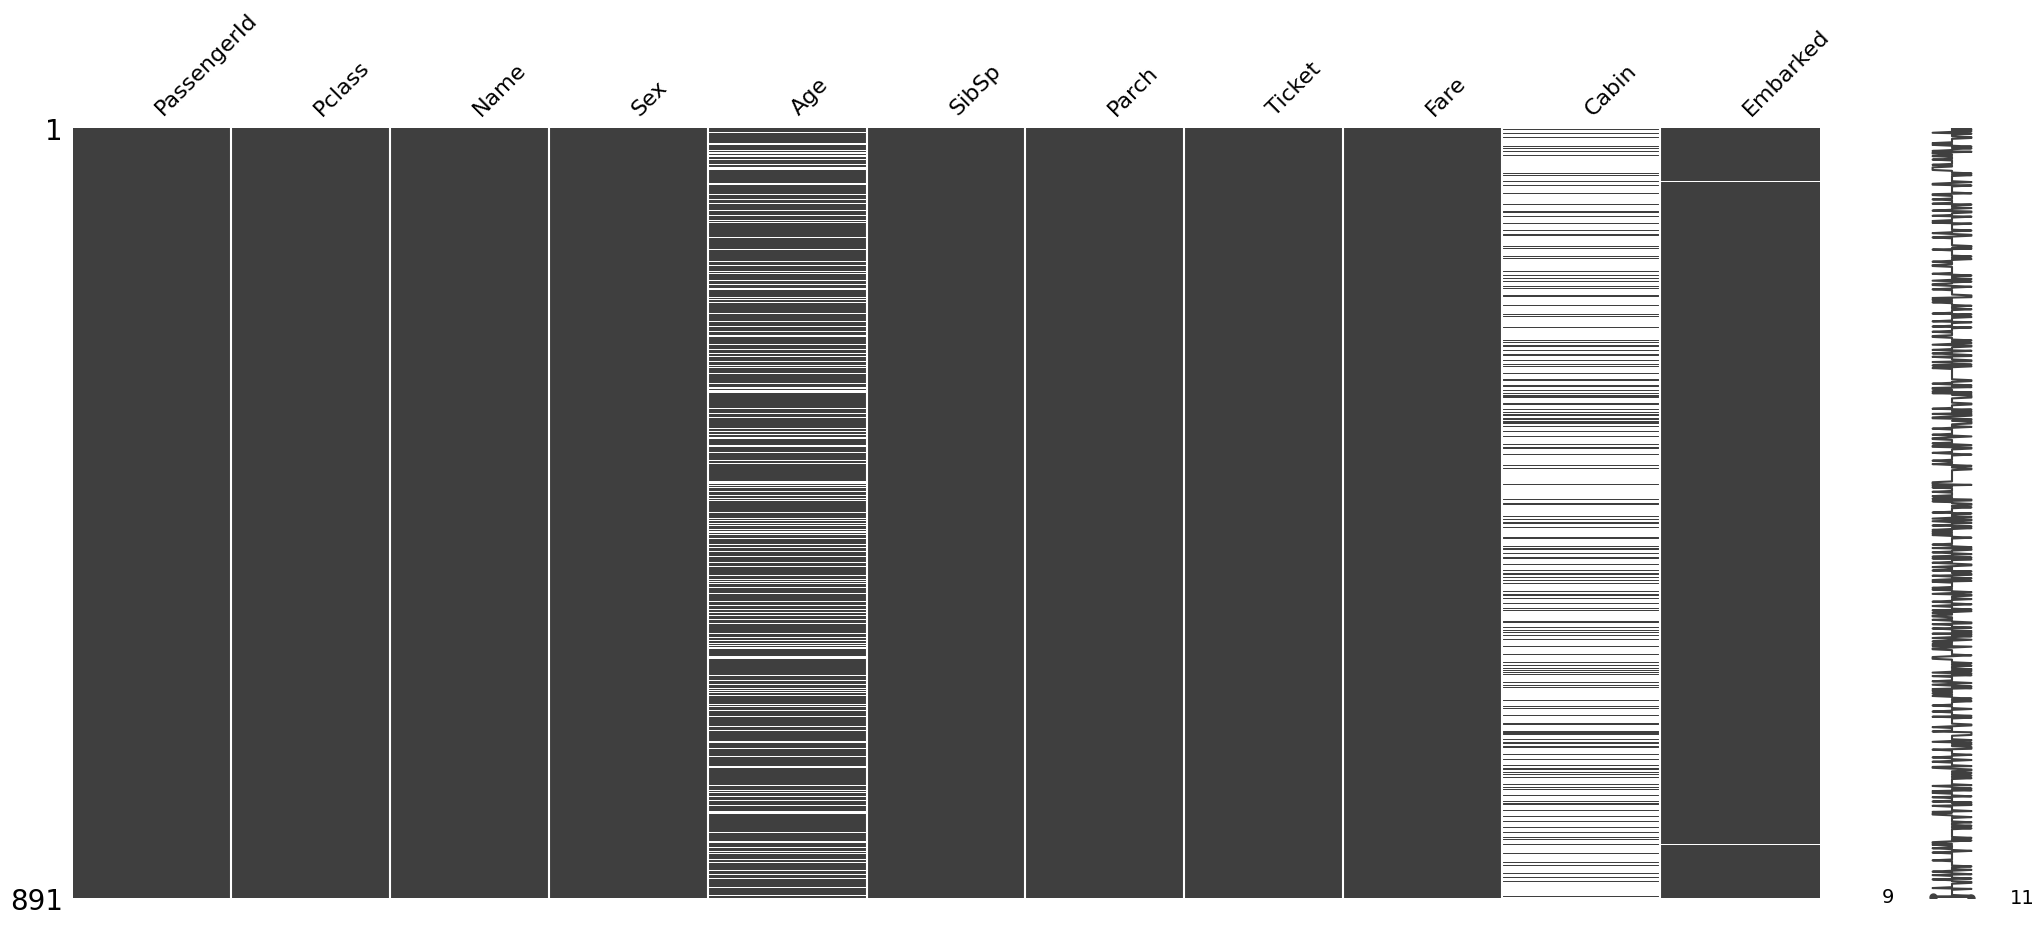

In [ ]:
msno.matrix(X)

**Interpretation:**
The above graph and summary shows notably that Age and Cabin contains many missing values. Dropping this two features may result in loss of important data. Therefore I will impute the missing values using different methods.

In [ ]:
X['Age']= X.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
X = X.drop(columns=['Cabin'])

In [ ]:
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace= True)

<ipython-input-16-d63583bd95d9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Embarked'].fillna(X['Embarked'].mode()[0], inplace= True)


<Axes: >

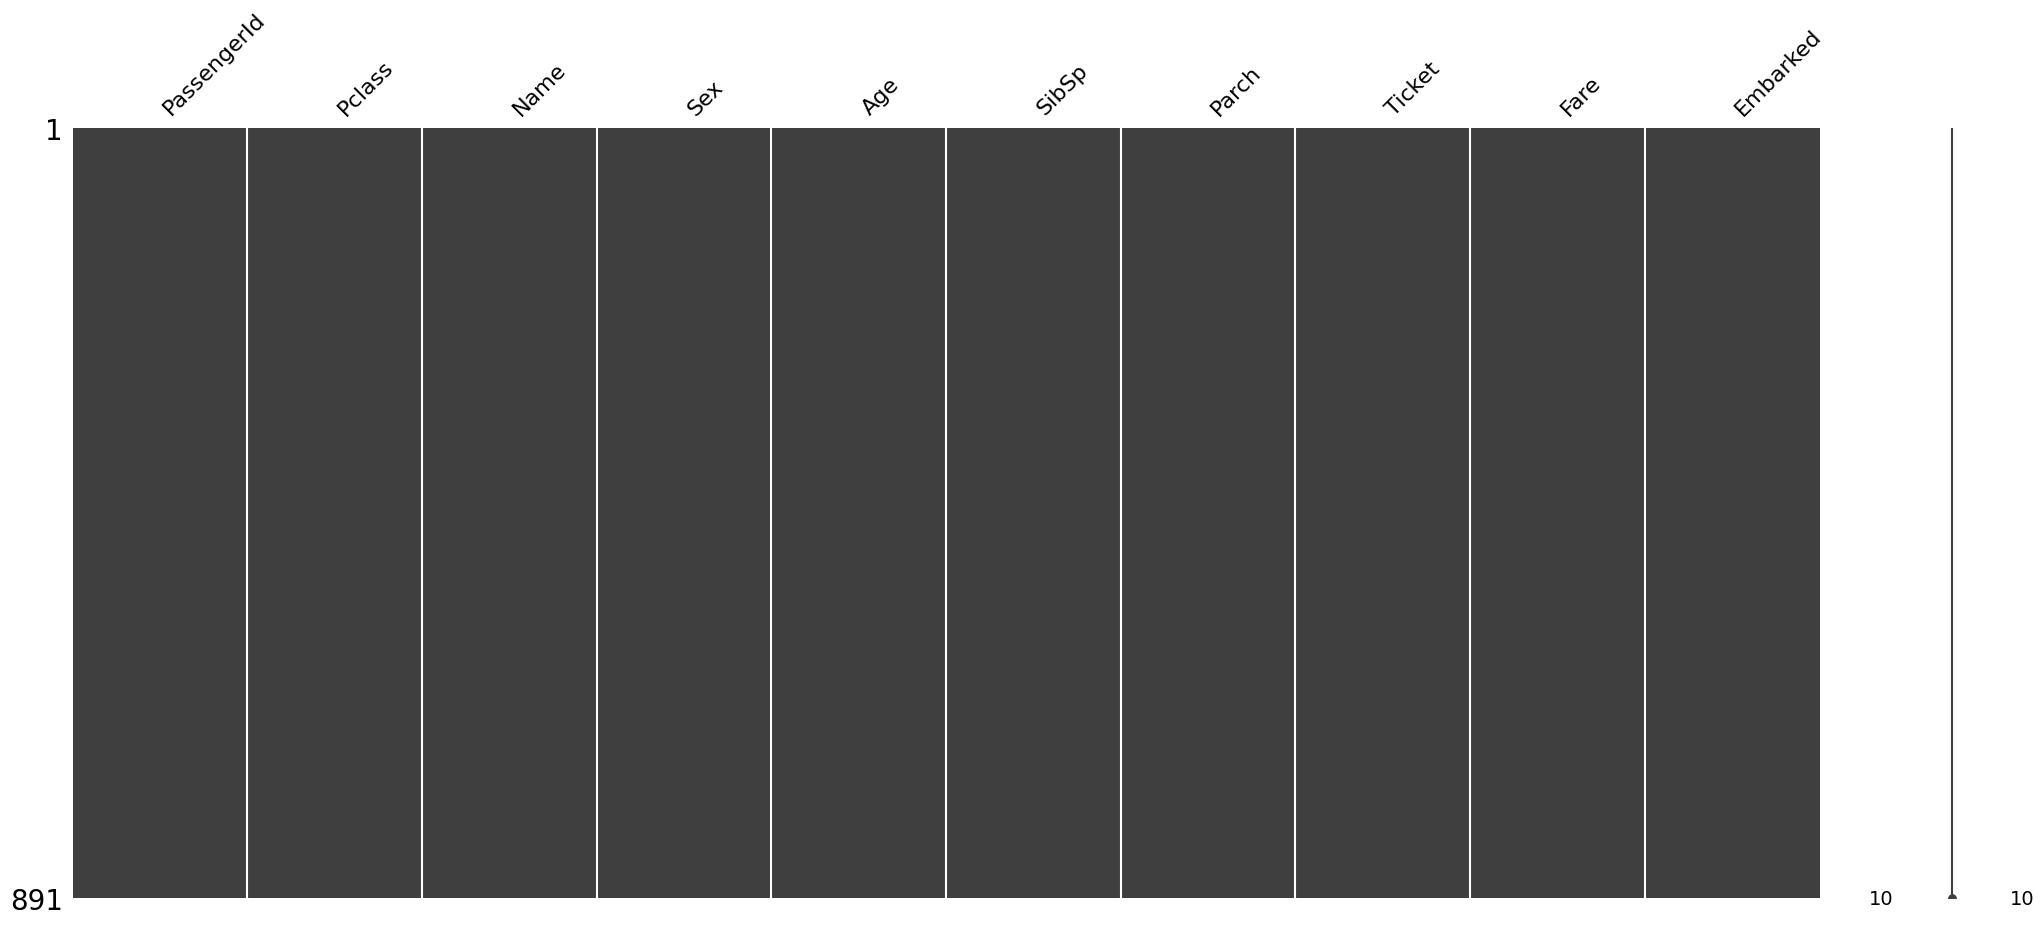

In [ ]:
msno.matrix(X)

As the above matix shows, there is no missing values left.



*   ***Checking if the Ground truth is Balanced in the training set***




In [ ]:
survived_counts= train_df['Survived'].value_counts(normalize=True)
print(survived_counts)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


<ipython-input-19-3102e939d61e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_counts.index, y=survived_counts.values, palette = 'muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


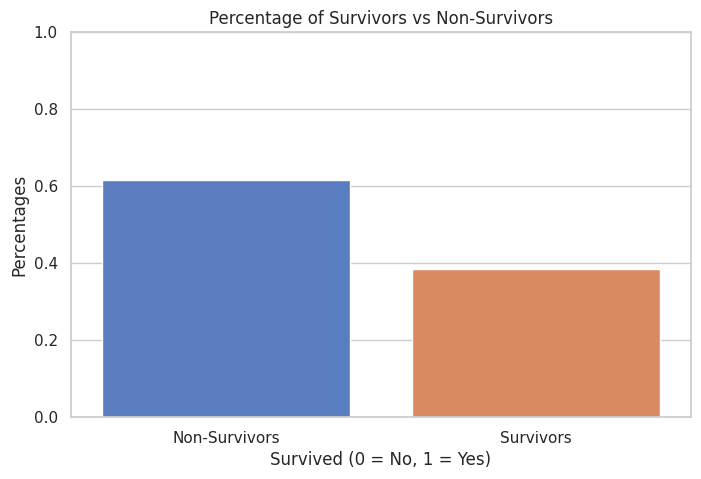

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette = 'muted')

plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Percentages')
plt.title('Percentage of Survivors vs Non-Survivors')

plt.xticks(ticks=[0,1], labels=['Non-Survivors', 'Survivors'])
plt.ylim(0,1)

plt.show()

***Interpretation: ***This shows that the traget is unbalanced which may result in biases towards the majority class after training the model.
Therefore I will solve the problem using Synthetic Minority Over-Sampling Techniques, which geerate synthetic samples for the minority class('YES').

M training DataSet contains many categorical data, and SMOTE cannot handle it; hence, I need first to encode the data.

In [ ]:
#since Name and Tickets are Unique, they may not help that much in the prediction of the survivors; thus, I will drop them
X = X.drop(columns = ['Name', 'Ticket'])

In [ ]:
# Now I will apply the Label Encoder on the remaining categorical data
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

In [ ]:
X.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    1  22.0      1      0   7.2500         2
1            2       1    0  38.0      1      0  71.2833         0
2            3       3    0  26.0      0      0   7.9250         2
3            4       1    0  35.0      1      0  53.1000         2
4            5       3    1  35.0      0      0   8.0500         2

In [ ]:
smote = SMOTE()
X_r, y_r = smote.fit_resample(X, Y)

<ipython-input-24-9c9db6af3057>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_r, palette = 'pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Survived', ylabel='count'>

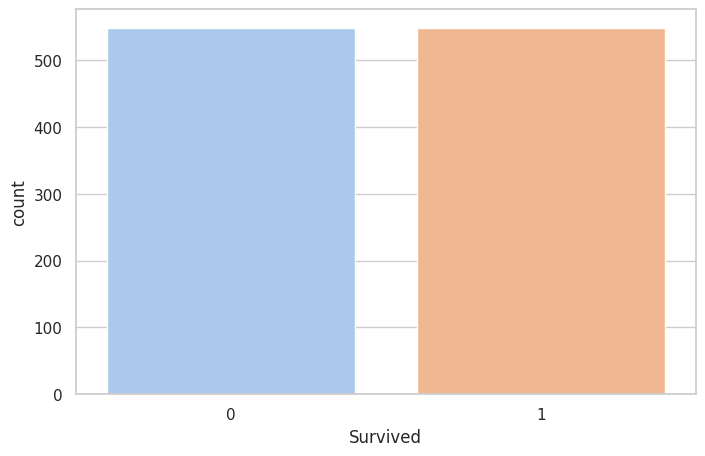

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x=y_r, palette = 'pastel')

***Normalizing the input features between 0 and 1 using min max to ensure that nofeature will dominate the training.***

In [ ]:
Min_Max_Scaler = MinMaxScaler()
X_scale= Min_Max_Scaler.fit_transform(X_r)

X = pd.DataFrame(X_scale, columns=X_r.columns)
X

Y = pd.DataFrame(y_r, columns=['Survived'])

In [ ]:
X

PassengerId  Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0        0.000000     1.0  1.0  0.271174  0.125  0.000000  0.014151       1.0
1        0.001124     0.0  0.0  0.472229  0.125  0.000000  0.139136       0.0
2        0.002247     1.0  0.0  0.321438  0.000  0.000000  0.015469       1.0
3        0.003371     0.0  0.0  0.434531  0.125  0.000000  0.103644       1.0
4        0.004494     1.0  1.0  0.434531  0.000  0.000000  0.015713       1.0
...           ...     ...  ...       ...    ...       ...       ...       ...
1093     0.898876     0.5  0.0  0.384267  0.000  0.000000  0.047546       1.0
1094     0.091011     1.0  0.0  0.334891  0.000  0.000000  0.017683       0.5
1095     0.279775     1.0  0.0  0.323599  0.000  0.166667  0.029945       0.0
1096     0.231461     1.0  0.0  0.320043  0.000  0.000000  0.036139       0.0
1097     0.343820     0.0  0.0  0.209898  0.125  0.000000  0.210408       0.0

[1098 rows x 8 columns]

In [ ]:
Y

Survived
0            0
1            1
2            1
3            1
4            0
...        ...
1093         1
1094         1
1095         1
1096         1
1097         1

[1098 rows x 1 columns]

***Splitting the data into training and validation set***

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size= 0.20)

In [ ]:
print("Dimensions of training set: ")
X_train.shape

Dimensions of training set: 


(878, 8)

In [ ]:
y_train.shape

(878, 1)

In [ ]:
y_train

Survived
408          0
143          0
933          1
210          0
816          0
...        ...
374          0
496          1
1006         1
596          1
941          1

[878 rows x 1 columns]

***Transpose***

In [ ]:
X_train = X_train.T
print(X_train.shape)

(8, 878)


In [ ]:
X_val = X_val.T
print(X_val.shape)

(8, 220)


In [ ]:
y_train = y_train.T
print(y_train.shape)

(1, 878)


In [ ]:
y_val = y_val.T
print(y_val.shape)

(1, 220)


# Applying the gradient decent algo


***- Initializing the weights tandomely using he initialization***

***- Initializing the biases with 0***

In [ ]:
def initialize_param(l_dim):
    params = {}
    n_l = len(l_dim)
    for i in range(1, n_l):
        params[f'W{i}'] = np.random.randn(l_dim[i], l_dim[i-1]) * np.sqrt(2./l_dim[i-1])
        params[f"b{i}"] = np.zeros((l_dim[i], 1))
    return params

In [ ]:
def sigmoid(s):
  return ((1/ (1+np.exp(-s))))

In [ ]:
def sigmoid_derivative(s):
  return s* (1-s)

In [ ]:
def relu(Z):
    return np.maximum(0, Z)

In [ ]:
def relu_derivative(Z):
    return Z > 0

***The values array in the following block of code is used to store the output of A_l-1, the W matrix of the l, b of layer l, and the weighted sum Z ***

In [ ]:
def forward_pass(X, parameters):
    values = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_0 = A
        W = parameters[f'W{l}']
        b = parameters[f'b{l}']

        Z = np.dot(W, A_0) + b
        A = relu(Z)  # I am using ReLU for hidden layers

        vals = (A_0, W, b, Z)
        values.append(vals)

    # and Output layer with sigmoid
    WL = parameters[f'W{L}']
    bL = parameters[f'b{L}']
    ZL = np.dot(WL, A) + bL
    AL = sigmoid(ZL)

    cache = (A, WL, bL, ZL)
    values.append(cache)

    return AL, values

In [ ]:
def compute_cost(A_l, Y, params, lambd):
    m = Y.shape[1]  # number of training example
    cross_entropy_cost = -1/m * np.sum(Y * np.log(A_l) + (1 - Y) * np.log(1 - A_l))

    # I am using L2 regularization cost to minimize the overfitting
    L2_regularization_cost = (lambd / (2 * m)) * sum(np.sum(np.square(params[f"W{l}"])) for l in range(1, len(params) // 2 + 1))

    cost = cross_entropy_cost + L2_regularization_cost
    return np.squeeze(cost)


In [ ]:
def backward_pass(AL, Y, caches, lambd):
    grads = {} # this where i will store the updated weights and biases
    L = len(caches)
    m = Y.shape[1]


    dAL = -(np.divide(Y, AL + 1e-12) - np.divide(1 - Y, 1 - AL + 1e-12))

    curr_cache = caches[L-1]
    A_prev, W, b, Z = curr_cache
    dZ = dAL * sigmoid_derivative(AL)
    dW = 1/m * np.dot(dZ, A_prev.T) + (lambd/m) * W
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    grads[f"dW{L}"] = dW
    grads[f"db{L}"] = db

    for l in reversed(range(L-1)):
        curr_cache = caches[l]
        A_prev, W, b, Z = curr_cache

        dZ = dA_prev * relu_derivative(Z)  # ReLU derivative for hidden layers
        dW = 1/m * np.dot(dZ, A_prev.T) + (lambd/m) * W
        db = 1/m * np.sum(dZ, axis=1, keepdims=True) # this keepdims is set to true to ensure that my dimension is preserved after the summation
        dA_prev = np.dot(W.T, dZ)

        grads[f"dW{l+1}"] = dW
        grads[f"db{l+1}"] = db

    return grads


In [ ]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(L):
        parameters[f"W{l+1}"] -= learning_rate * grads[f"dW{l+1}"]
        parameters[f"b{l+1}"] -= learning_rate * grads[f"db{l+1}"]

    return parameters


In [ ]:
def compute_metrics(predictions, Y):
    # Here I am ensuring that predictions and Y have the same shape
    if predictions.shape != Y.shape:
        predictions = predictions.reshape(Y.shape)

    # Convert to numpy arrays if they are pandas objects
    predictions = np.array(predictions)
    Y = np.array(Y)

    TP = np.sum((predictions == 1) & (Y == 1))
    TN = np.sum((predictions == 0) & (Y == 0))
    FP = np.sum((predictions == 1) & (Y == 0))
    FN = np.sum((predictions == 0) & (Y == 1))

    # Compute metrics with scalar values
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}



In [ ]:
def save_checkpoint(parameters, epoch, train_cost, val_cost, path='checkpoints'):
    if not os.path.exists(path):
        os.makedirs(path)

    checkpoint = {
        'epoch': epoch,
        'parameters': {k: v.tolist() for k, v in parameters.items()},
        'train_cost': train_cost,
        'val_cost': val_cost
    }

    with open(f'{path}/checkpoint_{epoch}.json', 'w') as f:
        json.dump(checkpoint, f)

In [ ]:
def predict(X, parameters):
    AL, _ = forward_pass(X, parameters)
    predictions = (AL.T >= 0.5).astype(int)
    return predictions

In [ ]:
def model(X_train, y_train, X_val, y_val, layer_dims, learning_rate=0.01, num_epochs=1000, lambd=0.01, checkpoint_file='model_checkpoint.pkl'):

    if isinstance(y_train, pd.DataFrame):
        y_train = y_train.values
    if isinstance(y_val, pd.DataFrame):
        y_val = y_val.values

    parameters = initialize_param(layer_dims)
    train_costs = []
    val_costs = []

    for epoch in range(num_epochs):
        # Forward pass
        AL_train, caches_train = forward_pass(X_train, parameters)
        AL_val, caches_val = forward_pass(X_val, parameters)

        # Computing costs
        train_cost = compute_cost(AL_train, y_train, parameters, lambd)
        val_cost = compute_cost(AL_val, y_val, parameters, lambd)

        train_costs.append(train_cost)
        val_costs.append(val_cost)

        # Backward pass
        grads = backward_pass(AL_train, y_train, caches_train, lambd)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Every 50 epochs, I print cost and save checkpoint
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Train Cost = {train_cost}, Validation Cost = {val_cost}")

            # Saving checkpoints
            checkpoint = {
                'epoch': epoch,
                'parameters': parameters,
                'train_cost': train_cost,
                'val_cost': val_cost,
            }
            with open(checkpoint_file, 'wb') as f:
                pickle.dump(checkpoint, f)

            # Computing and print metrics (accuracy, precision, recall, F1)
            train_predictions = predict(X_train, parameters)
            val_predictions = predict(X_val, parameters)

            train_metrics = compute_metrics(train_predictions, y_train.flatten())
            val_metrics = compute_metrics(val_predictions, y_val.flatten())

            print(f"Train Metrics: {train_metrics}")
            print(f"Validation Metrics: {val_metrics}")

    # Plottng training and validation costs to see if mt model is overfitting
    plt.figure(figsize=(12, 6))
    plt.plot(train_costs, label='Training Cost')
    plt.plot(val_costs, label='Validation Cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Training and Validation Costs')
    plt.legend()
    plt.show()

    return parameters, train_costs, val_costs


In [ ]:
layer_dimension = [X_train.shape[0]] + [64] * 3 + [1]
learning_rate = 0.001
lambd = 0.01

Epoch 0: Train Cost = 0.7384852523360697, Validation Cost = 0.7612908465618363
Train Metrics: {'accuracy': 0.510250569476082, 'precision': 0, 'recall': 0.0, 'f1': 0}
Validation Metrics: {'accuracy': 0.4590909090909091, 'precision': 0, 'recall': 0.0, 'f1': 0}
Epoch 50: Train Cost = 0.7026920238821374, Validation Cost = 0.7211034118826879
Train Metrics: {'accuracy': 0.510250569476082, 'precision': 0, 'recall': 0.0, 'f1': 0}
Validation Metrics: {'accuracy': 0.4590909090909091, 'precision': 0, 'recall': 0.0, 'f1': 0}
Epoch 100: Train Cost = 0.6812622295308798, Validation Cost = 0.6969634030876956
Train Metrics: {'accuracy': 0.5113895216400911, 'precision': 1.0, 'recall': 0.002325581395348837, 'f1': 0.004640371229698376}
Validation Metrics: {'accuracy': 0.4590909090909091, 'precision': 0, 'recall': 0.0, 'f1': 0}
Epoch 150: Train Cost = 0.6649079996875831, Validation Cost = 0.6791136067769789
Train Metrics: {'accuracy': 0.5387243735763098, 'precision': 1.0, 'recall': 0.05813953488372093, 'f1

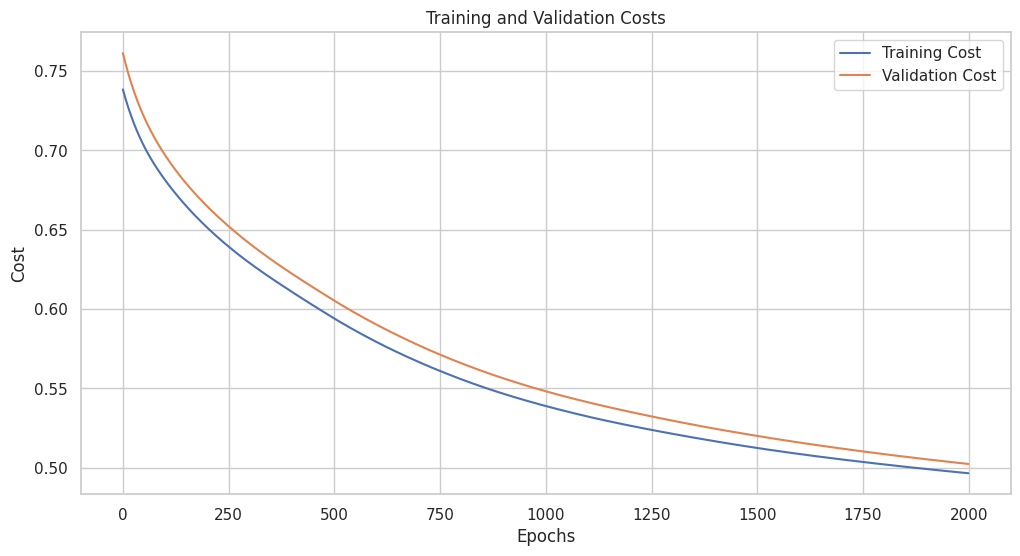

In [ ]:
params, train_costs, val_costs = model(
    X_train, y_train, X_val, y_val,
    layer_dims=layer_dimension,
    learning_rate=learning_rate,
    num_epochs=2000,
    checkpoint_file='model_checkpoint.pkl',
    lambd=lambd
)

In [ ]:
train_predictions = predict(X_train, params)
val_predictions = predict(X_val, params)

train_metrics = compute_metrics(train_predictions, y_train.to_numpy().flatten())
val_metrics = compute_metrics(val_predictions, y_val.to_numpy().flatten())

print("\nFinal Metrics:")
print(f"Train Metrics: {train_metrics}")
print(f"Validation Metrics: {val_metrics}")


Final Metrics:
Train Metrics: {'accuracy': 0.7790432801822323, 'precision': 0.8224043715846995, 'recall': 0.7, 'f1': 0.7562814070351759}
Validation Metrics: {'accuracy': 0.7636363636363637, 'precision': 0.8526315789473684, 'recall': 0.680672268907563, 'f1': 0.7570093457943926}


#Hyperparameters tuning

In [ ]:
pip install optuna



***   In the objective function, I ma defining diffenrent ranges of units per layer, learning rate, lambda, and number of layers.***

In [ ]:
import optuna


def objective(trial):
    n_layers = trial.suggest_int("n_layers", 1, 8)


    layer_dims = [X_train.shape[0]] + [trial.suggest_int(f'n_units_{i}', 10, 100) for i in range(n_layers)] + [1]

    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)
    lambd = trial.suggest_float("lambda_reg", 1e-5, 1e-1, log=True)
    num_epochs = 2800

    parameters = initialize_param(layer_dims)
    params, train_costs, val_costs = model(X_train, y_train, X_val, y_val,
                                           layer_dims=layer_dims,
                                           learning_rate=learning_rate,
                                           num_epochs=num_epochs,
                                           lambd=lambd)


    val_predictions = predict(X_val, params)
    val_metrics = compute_metrics(val_predictions, y_val)


    return val_metrics['accuracy']


***I am trying to run 50 trials, each with different values of the hypermarameters aiming to maximize the objective function.***

***After that I retrive the best hyperparameters that gave the best accuracy between the training and the validation. Then, I use these parameters to optimize my dnn model***

[I 2024-10-02 07:46:58,982] A new study created in memory with name: no-name-bde3471f-9a20-41cf-8919-133f304862e3


Epoch 0: Train Cost = 0.749817199845317, Validation Cost = 0.7391718483297579
Train Metrics: {'accuracy': 0.5227790432801822, 'precision': 0.5604395604395604, 'recall': 0.1186046511627907, 'f1': 0.1957773512476008}
Validation Metrics: {'accuracy': 0.4909090909090909, 'precision': 0.6842105263157895, 'recall': 0.1092436974789916, 'f1': 0.18840579710144928}
Epoch 50: Train Cost = 0.4714239890894906, Validation Cost = 0.4583910166281928
Train Metrics: {'accuracy': 0.8006833712984055, 'precision': 0.8, 'recall': 0.7906976744186046, 'f1': 0.7953216374269007}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.8611111111111112, 'recall': 0.7815126050420168, 'f1': 0.8193832599118943}
Epoch 100: Train Cost = 0.4387348952053085, Validation Cost = 0.4210357114122916
Train Metrics: {'accuracy': 0.7995444191343963, 'precision': 0.8009478672985783, 'recall': 0.786046511627907, 'f1': 0.7934272300469484}
Validation Metrics: {'accuracy': 0.8272727272727273, 'precision': 0.8785046728971

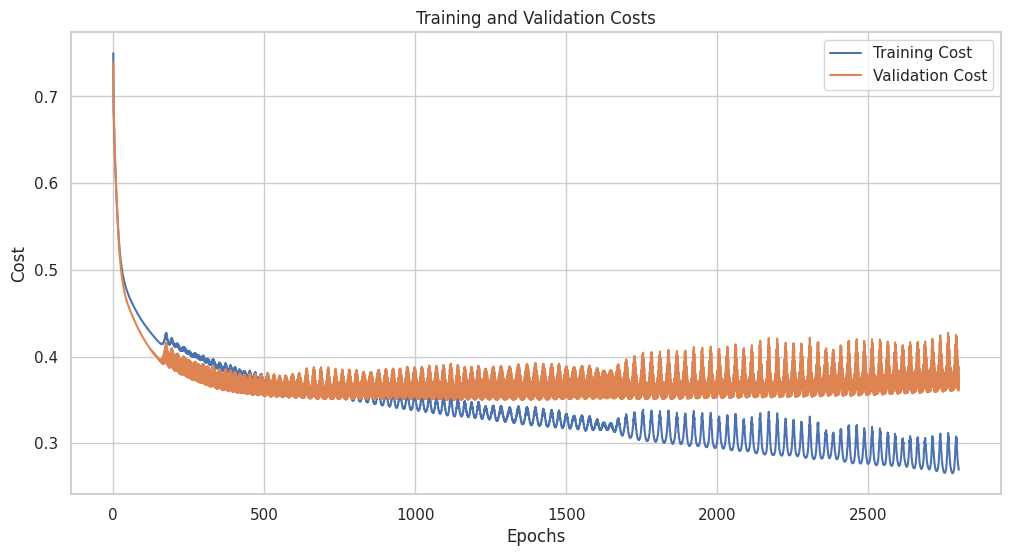

[I 2024-10-02 07:48:17,352] Trial 0 finished with value: 0.8409090909090909 and parameters: {'n_layers': 5, 'n_units_0': 64, 'n_units_1': 82, 'n_units_2': 86, 'n_units_3': 84, 'n_units_4': 91, 'learning_rate': 0.04271286385329541, 'lambda_reg': 0.00026695198826550353}. Best is trial 0 with value: 0.8409090909090909.


Epoch 0: Train Cost = 0.7631617256643103, Validation Cost = 0.7705740859519268
Train Metrics: {'accuracy': 0.489749430523918, 'precision': 0.489749430523918, 'recall': 1.0, 'f1': 0.6574923547400612}
Validation Metrics: {'accuracy': 0.5409090909090909, 'precision': 0.5409090909090909, 'recall': 1.0, 'f1': 0.7020648967551621}
Epoch 50: Train Cost = 0.5989665571101501, Validation Cost = 0.6337641798042517
Train Metrics: {'accuracy': 0.755125284738041, 'precision': 0.8028169014084507, 'recall': 0.6627906976744186, 'f1': 0.7261146496815286}
Validation Metrics: {'accuracy': 0.75, 'precision': 0.8478260869565217, 'recall': 0.6554621848739496, 'f1': 0.7393364928909951}
Epoch 100: Train Cost = 0.533636875018439, Validation Cost = 0.5639313426503373
Train Metrics: {'accuracy': 0.7824601366742597, 'precision': 0.8120104438642297, 'recall': 0.7232558139534884, 'f1': 0.7650676506765067}
Validation Metrics: {'accuracy': 0.7727272727272727, 'precision': 0.8484848484848485, 'recall': 0.705882352941176

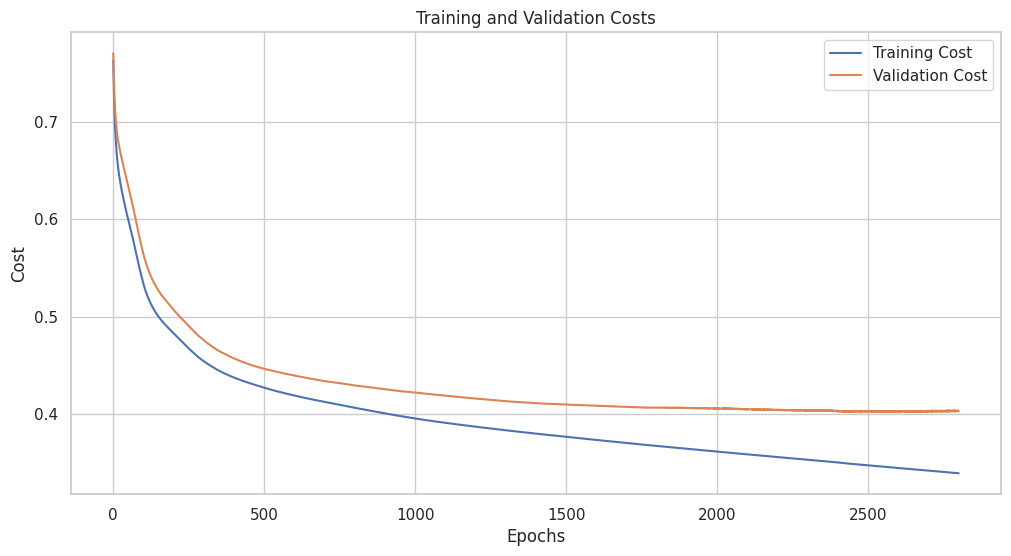

[I 2024-10-02 07:49:09,959] Trial 1 finished with value: 0.8409090909090909 and parameters: {'n_layers': 8, 'n_units_0': 81, 'n_units_1': 58, 'n_units_2': 80, 'n_units_3': 37, 'n_units_4': 34, 'n_units_5': 68, 'n_units_6': 27, 'n_units_7': 61, 'learning_rate': 0.005284896820381934, 'lambda_reg': 0.028392875444583233}. Best is trial 0 with value: 0.8409090909090909.


Epoch 0: Train Cost = 0.6315281733304512, Validation Cost = 0.6265989583649931
Train Metrics: {'accuracy': 0.7676537585421412, 'precision': 0.8174157303370787, 'recall': 0.6767441860465117, 'f1': 0.7404580152671757}
Validation Metrics: {'accuracy': 0.7727272727272727, 'precision': 0.8631578947368421, 'recall': 0.6890756302521008, 'f1': 0.7663551401869159}
Epoch 50: Train Cost = 0.5085812628726808, Validation Cost = 0.5029003882582025
Train Metrics: {'accuracy': 0.8041002277904328, 'precision': 0.856353591160221, 'recall': 0.7209302325581395, 'f1': 0.7828282828282827}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.9222222222222223, 'recall': 0.6974789915966386, 'f1': 0.7942583732057417}
Epoch 100: Train Cost = 0.47577426819702184, Validation Cost = 0.460908673670393
Train Metrics: {'accuracy': 0.8041002277904328, 'precision': 0.8359375, 'recall': 0.7465116279069768, 'f1': 0.7886977886977888}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8958333

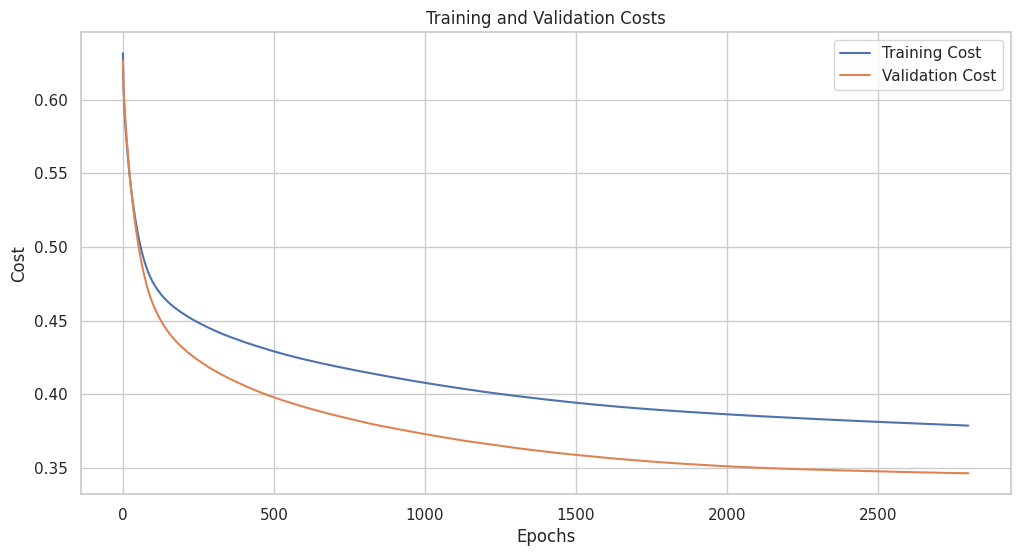

[I 2024-10-02 07:49:35,648] Trial 2 finished with value: 0.85 and parameters: {'n_layers': 3, 'n_units_0': 79, 'n_units_1': 46, 'n_units_2': 66, 'learning_rate': 0.014411126690707661, 'lambda_reg': 0.0008592652944112674}. Best is trial 2 with value: 0.85.


Epoch 0: Train Cost = 0.7334902638924086, Validation Cost = 0.7317815764310607
Train Metrics: {'accuracy': 0.49430523917995445, 'precision': 0.49191685912240185, 'recall': 0.9906976744186047, 'f1': 0.6574074074074073}
Validation Metrics: {'accuracy': 0.5454545454545454, 'precision': 0.543778801843318, 'recall': 0.9915966386554622, 'f1': 0.7023809523809523}
Epoch 50: Train Cost = 0.7078310990258274, Validation Cost = 0.7107294284737289
Train Metrics: {'accuracy': 0.5159453302961275, 'precision': 0.503037667071689, 'recall': 0.9627906976744186, 'f1': 0.6608140462889066}
Validation Metrics: {'accuracy': 0.5545454545454546, 'precision': 0.5502392344497608, 'recall': 0.9663865546218487, 'f1': 0.7012195121951219}
Epoch 100: Train Cost = 0.6895704853935022, Validation Cost = 0.6964320317789059
Train Metrics: {'accuracy': 0.5956719817767654, 'precision': 0.5542691751085383, 'recall': 0.8906976744186047, 'f1': 0.6833184656556646}
Validation Metrics: {'accuracy': 0.6045454545454545, 'precision':

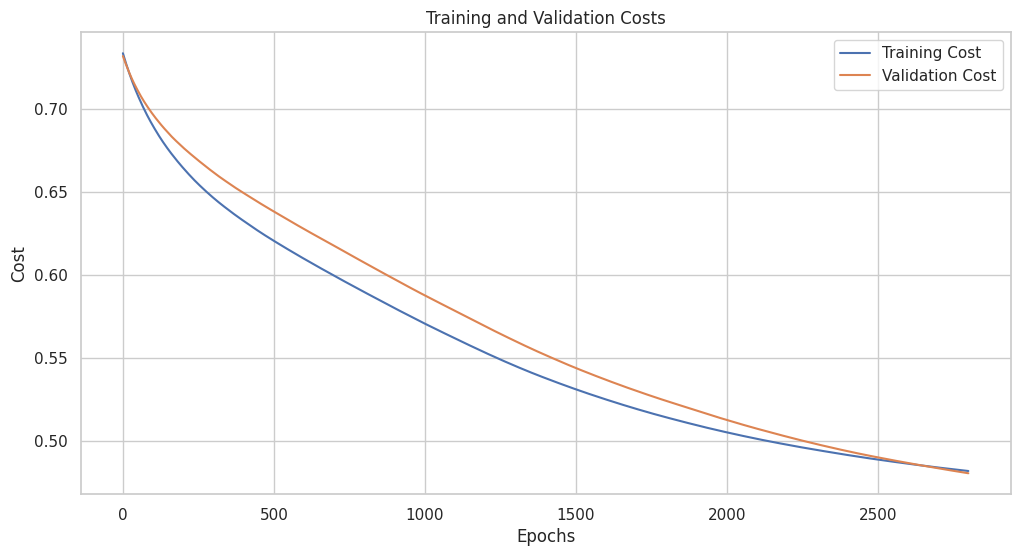

[I 2024-10-02 07:49:58,932] Trial 3 finished with value: 0.8090909090909091 and parameters: {'n_layers': 5, 'n_units_0': 76, 'n_units_1': 14, 'n_units_2': 61, 'n_units_3': 11, 'n_units_4': 62, 'learning_rate': 0.0004436178039011484, 'lambda_reg': 0.014234737915625566}. Best is trial 2 with value: 0.85.


Epoch 0: Train Cost = 0.6617904851020722, Validation Cost = 0.6688194741748674
Train Metrics: {'accuracy': 0.6104783599088838, 'precision': 0.7444444444444445, 'recall': 0.3116279069767442, 'f1': 0.43934426229508194}
Validation Metrics: {'accuracy': 0.5545454545454546, 'precision': 0.7560975609756098, 'recall': 0.2605042016806723, 'f1': 0.3875}
Epoch 50: Train Cost = 0.6444580757887554, Validation Cost = 0.6549260771768435
Train Metrics: {'accuracy': 0.5478359908883826, 'precision': 0.6633663366336634, 'recall': 0.1558139534883721, 'f1': 0.2523540489642185}
Validation Metrics: {'accuracy': 0.5136363636363637, 'precision': 0.75, 'recall': 0.15126050420168066, 'f1': 0.2517482517482517}
Epoch 100: Train Cost = 0.631984004650721, Validation Cost = 0.6447978112328207
Train Metrics: {'accuracy': 0.5774487471526196, 'precision': 0.736, 'recall': 0.21395348837209302, 'f1': 0.3315315315315315}
Validation Metrics: {'accuracy': 0.5272727272727272, 'precision': 0.7586206896551724, 'recall': 0.1848

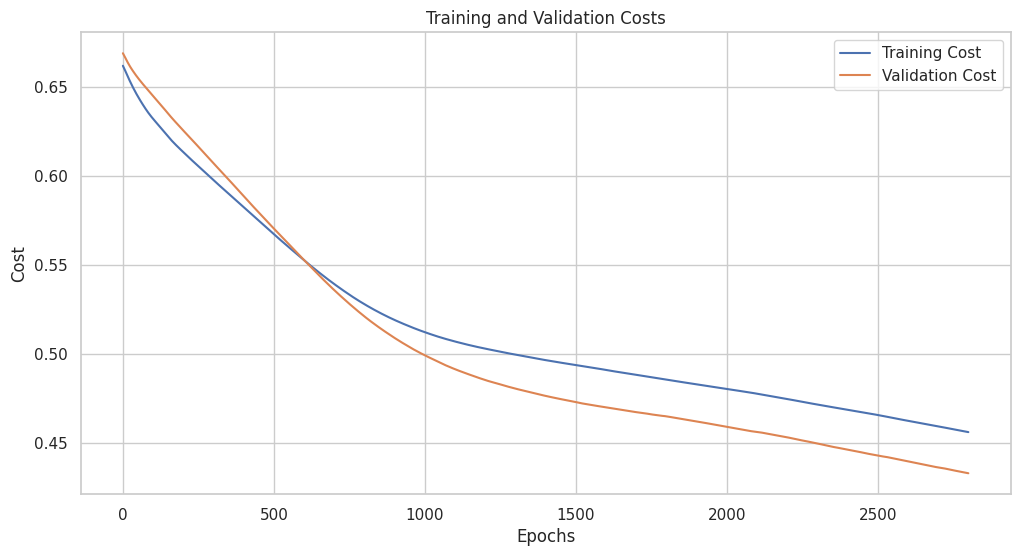

[I 2024-10-02 07:50:41,256] Trial 4 finished with value: 0.8181818181818182 and parameters: {'n_layers': 8, 'n_units_0': 54, 'n_units_1': 35, 'n_units_2': 64, 'n_units_3': 74, 'n_units_4': 37, 'n_units_5': 10, 'n_units_6': 33, 'n_units_7': 20, 'learning_rate': 0.0012959186489480048, 'lambda_reg': 0.0035861184113812248}. Best is trial 2 with value: 0.85.


Epoch 0: Train Cost = 0.7007963049276555, Validation Cost = 0.7073885746296662
Train Metrics: {'accuracy': 0.5193621867881549, 'precision': 0.7857142857142857, 'recall': 0.02558139534883721, 'f1': 0.04954954954954954}
Validation Metrics: {'accuracy': 0.4636363636363636, 'precision': 1.0, 'recall': 0.008403361344537815, 'f1': 0.016666666666666666}
Epoch 50: Train Cost = 0.6924244041202182, Validation Cost = 0.701251533414431
Train Metrics: {'accuracy': 0.5170842824601367, 'precision': 1.0, 'recall': 0.013953488372093023, 'f1': 0.027522935779816512}
Validation Metrics: {'accuracy': 0.4636363636363636, 'precision': 1.0, 'recall': 0.008403361344537815, 'f1': 0.016666666666666666}
Epoch 100: Train Cost = 0.6827629101588982, Validation Cost = 0.6931925600566567
Train Metrics: {'accuracy': 0.5136674259681093, 'precision': 1.0, 'recall': 0.0069767441860465115, 'f1': 0.013856812933025405}
Validation Metrics: {'accuracy': 0.4590909090909091, 'precision': 0, 'recall': 0.0, 'f1': 0}
Epoch 150: Tra

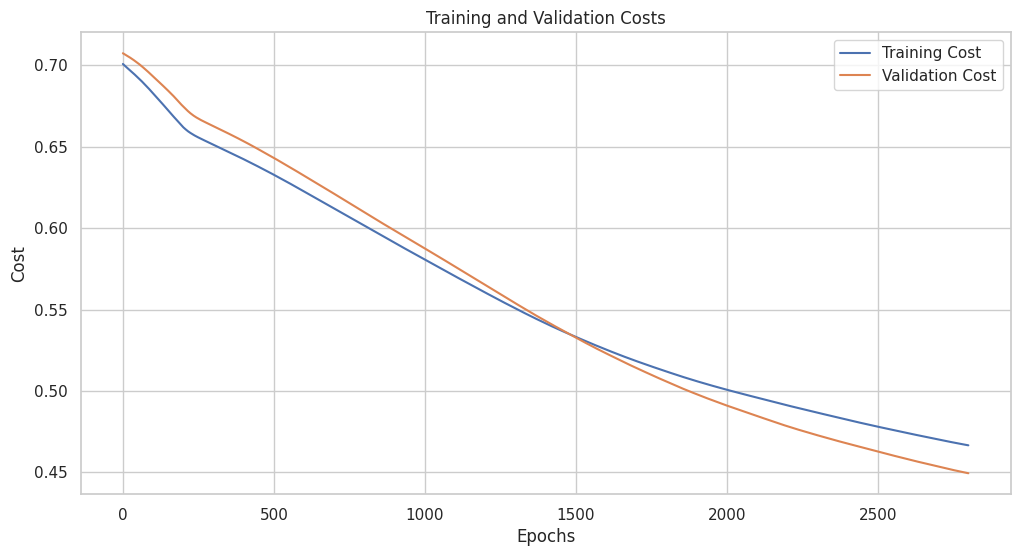

[I 2024-10-02 07:51:28,250] Trial 5 finished with value: 0.8181818181818182 and parameters: {'n_layers': 7, 'n_units_0': 89, 'n_units_1': 62, 'n_units_2': 65, 'n_units_3': 27, 'n_units_4': 37, 'n_units_5': 30, 'n_units_6': 73, 'learning_rate': 0.0006443505866195124, 'lambda_reg': 1.0195951722956901e-05}. Best is trial 2 with value: 0.85.


Epoch 0: Train Cost = 0.6639409318695058, Validation Cost = 0.6682141328298054
Train Metrics: {'accuracy': 0.5933940774487472, 'precision': 0.622895622895623, 'recall': 0.43023255813953487, 'f1': 0.5089408528198075}
Validation Metrics: {'accuracy': 0.6136363636363636, 'precision': 0.717948717948718, 'recall': 0.47058823529411764, 'f1': 0.5685279187817259}
Epoch 50: Train Cost = 0.6058837129686128, Validation Cost = 0.6136159691752243
Train Metrics: {'accuracy': 0.7050113895216401, 'precision': 0.7697160883280757, 'recall': 0.5674418604651162, 'f1': 0.6532797858099062}
Validation Metrics: {'accuracy': 0.6863636363636364, 'precision': 0.8472222222222222, 'recall': 0.5126050420168067, 'f1': 0.6387434554973821}
Epoch 100: Train Cost = 0.5718802797812893, Validation Cost = 0.577818702551956
Train Metrics: {'accuracy': 0.7722095671981777, 'precision': 0.8042328042328042, 'recall': 0.7069767441860465, 'f1': 0.7524752475247524}
Validation Metrics: {'accuracy': 0.7636363636363637, 'precision': 

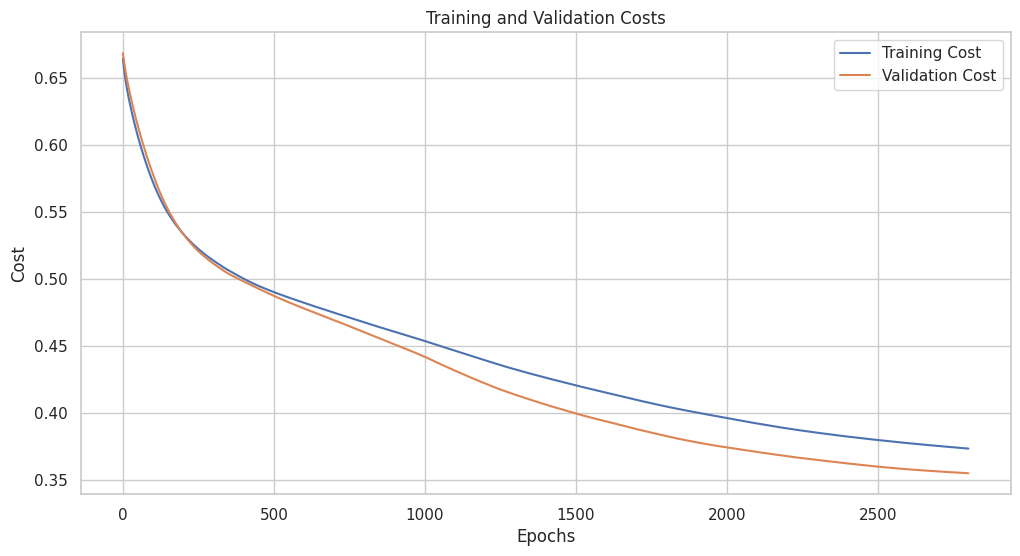

[I 2024-10-02 07:52:03,227] Trial 6 finished with value: 0.8590909090909091 and parameters: {'n_layers': 6, 'n_units_0': 49, 'n_units_1': 27, 'n_units_2': 43, 'n_units_3': 49, 'n_units_4': 43, 'n_units_5': 75, 'learning_rate': 0.004986355476812234, 'lambda_reg': 2.9082405469405488e-05}. Best is trial 6 with value: 0.8590909090909091.


Epoch 0: Train Cost = 0.644075449908282, Validation Cost = 0.6769044284935045
Train Metrics: {'accuracy': 0.6822323462414579, 'precision': 0.7253731343283583, 'recall': 0.5651162790697675, 'f1': 0.6352941176470588}
Validation Metrics: {'accuracy': 0.6409090909090909, 'precision': 0.7631578947368421, 'recall': 0.48739495798319327, 'f1': 0.594871794871795}
Epoch 50: Train Cost = 0.6293155513051463, Validation Cost = 0.6658691212879588
Train Metrics: {'accuracy': 0.7038724373576309, 'precision': 0.775974025974026, 'recall': 0.5558139534883721, 'f1': 0.6476964769647696}
Validation Metrics: {'accuracy': 0.6636363636363637, 'precision': 0.8260869565217391, 'recall': 0.4789915966386555, 'f1': 0.6063829787234043}
Epoch 100: Train Cost = 0.6191410153976136, Validation Cost = 0.6569524115001817
Train Metrics: {'accuracy': 0.7107061503416856, 'precision': 0.7838709677419354, 'recall': 0.5651162790697675, 'f1': 0.6567567567567568}
Validation Metrics: {'accuracy': 0.6727272727272727, 'precision': 0

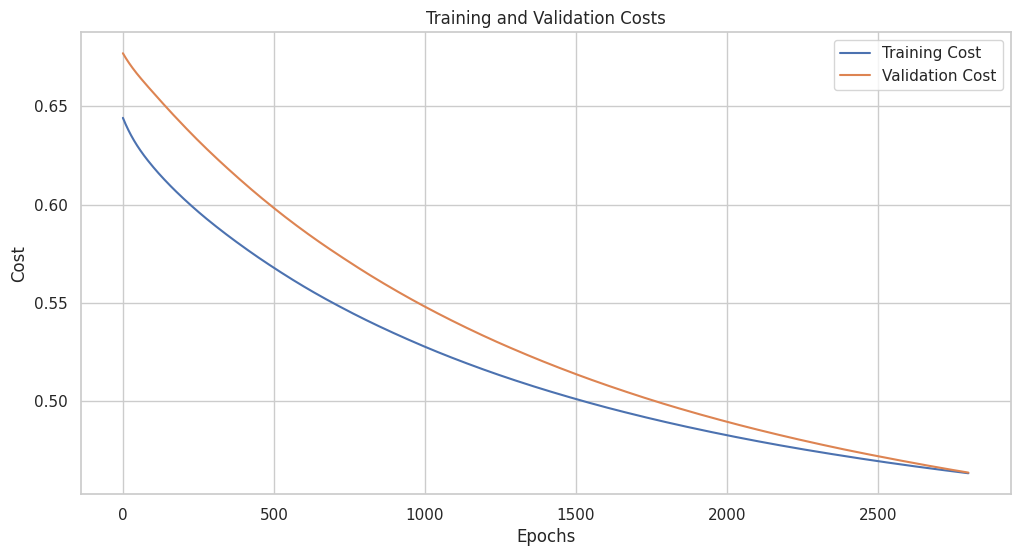

[I 2024-10-02 07:52:15,808] Trial 7 finished with value: 0.8045454545454546 and parameters: {'n_layers': 2, 'n_units_0': 42, 'n_units_1': 25, 'learning_rate': 0.0015221574347324533, 'lambda_reg': 3.9490336736771655e-05}. Best is trial 6 with value: 0.8590909090909091.


Epoch 0: Train Cost = 0.7512922009966074, Validation Cost = 0.73562140820625
Train Metrics: {'accuracy': 0.489749430523918, 'precision': 0.489749430523918, 'recall': 1.0, 'f1': 0.6574923547400612}
Validation Metrics: {'accuracy': 0.5409090909090909, 'precision': 0.5409090909090909, 'recall': 1.0, 'f1': 0.7020648967551621}
Epoch 50: Train Cost = 0.7058601169577395, Validation Cost = 0.7005085821006539
Train Metrics: {'accuracy': 0.4601366742596811, 'precision': 0.47256857855361595, 'recall': 0.8813953488372093, 'f1': 0.6152597402597402}
Validation Metrics: {'accuracy': 0.4909090909090909, 'precision': 0.5174129353233831, 'recall': 0.8739495798319328, 'f1': 0.65}
Epoch 100: Train Cost = 0.683197084106901, Validation Cost = 0.6827833258129179
Train Metrics: {'accuracy': 0.6047835990888383, 'precision': 0.5904139433551199, 'recall': 0.6302325581395349, 'f1': 0.609673790776153}
Validation Metrics: {'accuracy': 0.6409090909090909, 'precision': 0.6724137931034483, 'recall': 0.6554621848739496

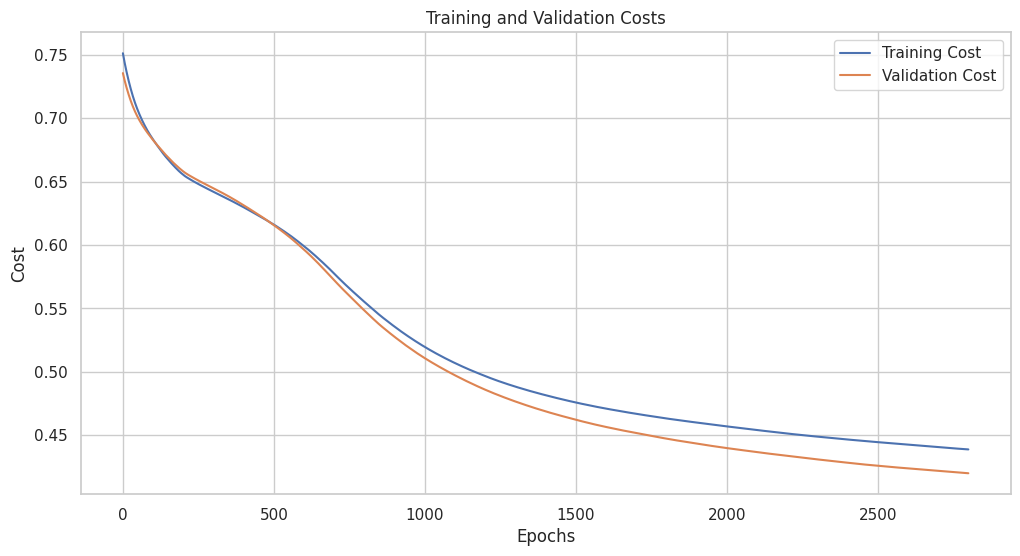

[I 2024-10-02 07:52:55,098] Trial 8 finished with value: 0.8181818181818182 and parameters: {'n_layers': 6, 'n_units_0': 96, 'n_units_1': 79, 'n_units_2': 11, 'n_units_3': 82, 'n_units_4': 34, 'n_units_5': 45, 'learning_rate': 0.0010636841283172594, 'lambda_reg': 0.0048188181425419295}. Best is trial 6 with value: 0.8590909090909091.


Epoch 0: Train Cost = 0.6842403264702799, Validation Cost = 0.7023987924173727
Train Metrics: {'accuracy': 0.5136674259681093, 'precision': 0.7142857142857143, 'recall': 0.011627906976744186, 'f1': 0.02288329519450801}
Validation Metrics: {'accuracy': 0.4681818181818182, 'precision': 1.0, 'recall': 0.01680672268907563, 'f1': 0.03305785123966942}
Epoch 50: Train Cost = 0.5633627192078919, Validation Cost = 0.559423566414805
Train Metrics: {'accuracy': 0.7722095671981777, 'precision': 0.759009009009009, 'recall': 0.7837209302325582, 'f1': 0.7711670480549199}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8333333333333334, 'recall': 0.7983193277310925, 'f1': 0.8154506437768242}
Epoch 100: Train Cost = 0.5007492776749259, Validation Cost = 0.4932287229126093
Train Metrics: {'accuracy': 0.7892938496583144, 'precision': 0.7923627684964201, 'recall': 0.772093023255814, 'f1': 0.7820965842167256}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.8611111111

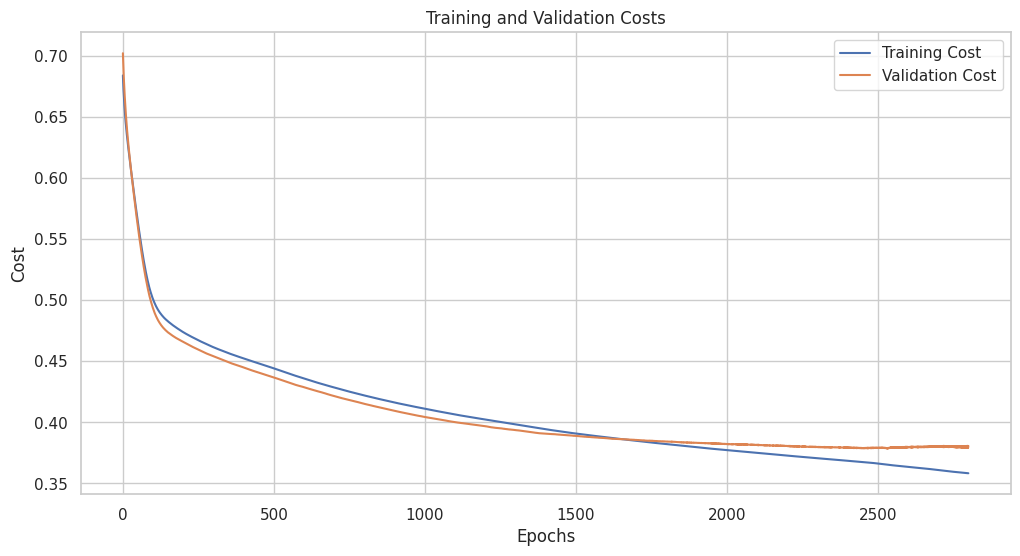

[I 2024-10-02 07:53:41,857] Trial 9 finished with value: 0.85 and parameters: {'n_layers': 7, 'n_units_0': 10, 'n_units_1': 59, 'n_units_2': 100, 'n_units_3': 41, 'n_units_4': 54, 'n_units_5': 20, 'n_units_6': 97, 'learning_rate': 0.008815242525611184, 'lambda_reg': 0.00990768696847282}. Best is trial 6 with value: 0.8590909090909091.


Epoch 0: Train Cost = 0.719969708512496, Validation Cost = 0.7061681671015048
Train Metrics: {'accuracy': 0.4510250569476082, 'precision': 0.4653333333333333, 'recall': 0.8116279069767441, 'f1': 0.5915254237288136}
Validation Metrics: {'accuracy': 0.509090909090909, 'precision': 0.5284974093264249, 'recall': 0.8571428571428571, 'f1': 0.6538461538461539}
Epoch 50: Train Cost = 0.5798032930466199, Validation Cost = 0.5739160265407871
Train Metrics: {'accuracy': 0.7619589977220956, 'precision': 0.8989169675090253, 'recall': 0.5790697674418605, 'f1': 0.7043847241867044}
Validation Metrics: {'accuracy': 0.7636363636363637, 'precision': 0.9240506329113924, 'recall': 0.6134453781512605, 'f1': 0.7373737373737375}
Epoch 100: Train Cost = 0.5147869516979711, Validation Cost = 0.5013346117957419
Train Metrics: {'accuracy': 0.8052391799544419, 'precision': 0.8295165394402035, 'recall': 0.7581395348837209, 'f1': 0.7922235722964763}
Validation Metrics: {'accuracy': 0.8, 'precision': 0.87878787878787

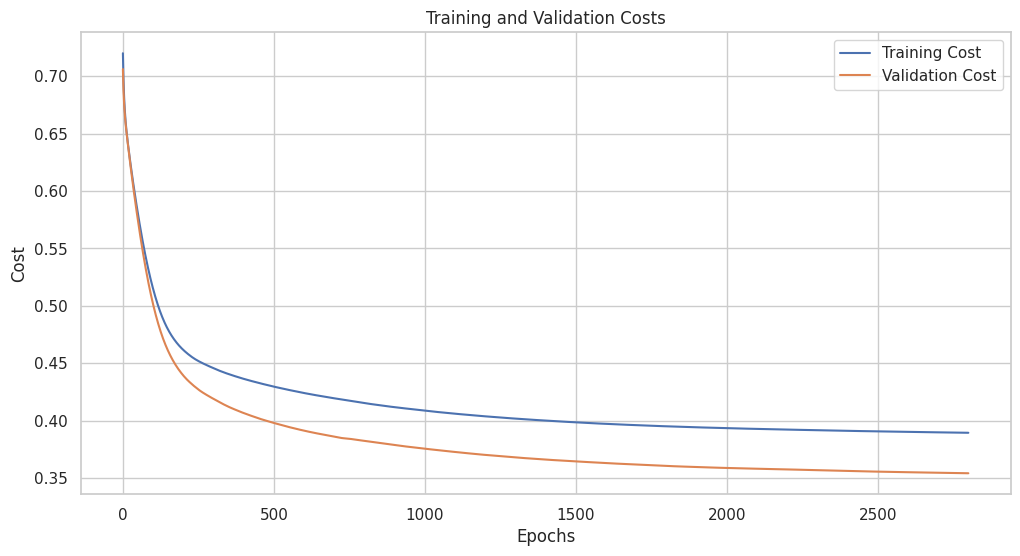

[I 2024-10-02 07:53:50,837] Trial 10 finished with value: 0.8590909090909091 and parameters: {'n_layers': 1, 'n_units_0': 27, 'learning_rate': 0.07912601276861315, 'lambda_reg': 0.00014785845925660842}. Best is trial 6 with value: 0.8590909090909091.


Epoch 0: Train Cost = 0.7544232820484245, Validation Cost = 0.7793655020532957
Train Metrics: {'accuracy': 0.4977220956719818, 'precision': 0.17647058823529413, 'recall': 0.0069767441860465115, 'f1': 0.013422818791946307}
Validation Metrics: {'accuracy': 0.4636363636363636, 'precision': 0.6666666666666666, 'recall': 0.01680672268907563, 'f1': 0.032786885245901634}
Epoch 50: Train Cost = 0.753890233650334, Validation Cost = 0.7787124544405851
Train Metrics: {'accuracy': 0.4977220956719818, 'precision': 0.17647058823529413, 'recall': 0.0069767441860465115, 'f1': 0.013422818791946307}
Validation Metrics: {'accuracy': 0.4636363636363636, 'precision': 0.6666666666666666, 'recall': 0.01680672268907563, 'f1': 0.032786885245901634}
Epoch 100: Train Cost = 0.7533618341775236, Validation Cost = 0.7780655152557315
Train Metrics: {'accuracy': 0.4977220956719818, 'precision': 0.17647058823529413, 'recall': 0.0069767441860465115, 'f1': 0.013422818791946307}
Validation Metrics: {'accuracy': 0.4636363

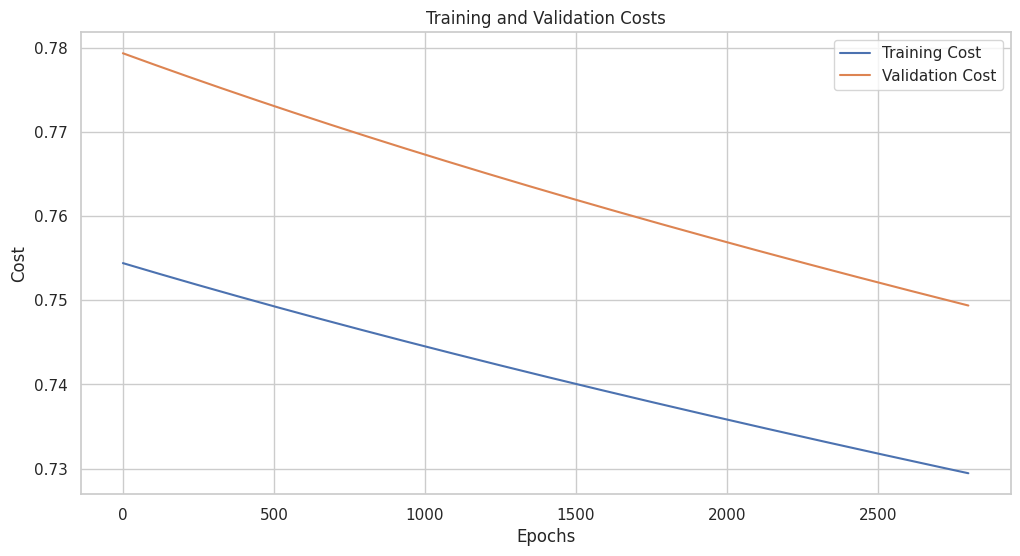

[I 2024-10-02 07:53:56,642] Trial 11 finished with value: 0.4636363636363636 and parameters: {'n_layers': 1, 'n_units_0': 26, 'learning_rate': 0.0001275560100347524, 'lambda_reg': 0.0001060687009851409}. Best is trial 6 with value: 0.8590909090909091.


Epoch 0: Train Cost = 0.6763911743486919, Validation Cost = 0.694076756074897
Train Metrics: {'accuracy': 0.510250569476082, 'precision': 0, 'recall': 0.0, 'f1': 0}
Validation Metrics: {'accuracy': 0.4590909090909091, 'precision': 0, 'recall': 0.0, 'f1': 0}
Epoch 50: Train Cost = 0.497231894739431, Validation Cost = 0.49267608685939573
Train Metrics: {'accuracy': 0.8006833712984055, 'precision': 0.8195488721804511, 'recall': 0.7604651162790698, 'f1': 0.7889022919179733}
Validation Metrics: {'accuracy': 0.7954545454545454, 'precision': 0.87, 'recall': 0.7310924369747899, 'f1': 0.7945205479452055}
Epoch 100: Train Cost = 0.46735611794468146, Validation Cost = 0.45353018773067827
Train Metrics: {'accuracy': 0.806378132118451, 'precision': 0.8110047846889952, 'recall': 0.7883720930232558, 'f1': 0.7995283018867924}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.875, 'recall': 0.7647058823529411, 'f1': 0.8161434977578476}
Epoch 150: Train Cost = 0.45111382118262305, Vali

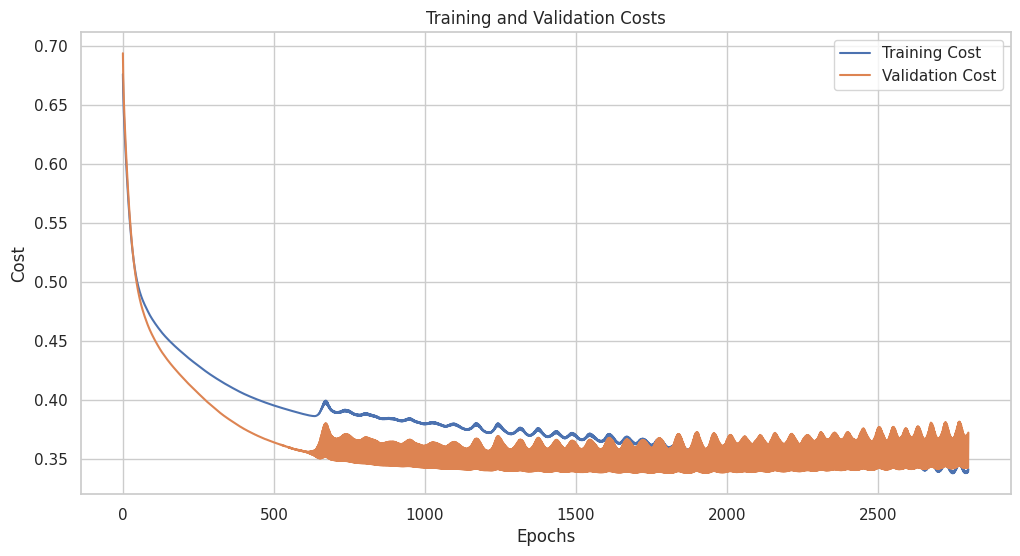

[I 2024-10-02 07:54:20,652] Trial 12 finished with value: 0.8636363636363636 and parameters: {'n_layers': 3, 'n_units_0': 38, 'n_units_1': 96, 'n_units_2': 36, 'learning_rate': 0.06887974860392179, 'lambda_reg': 1.779598798818606e-05}. Best is trial 12 with value: 0.8636363636363636.


Epoch 0: Train Cost = 0.8499153672152908, Validation Cost = 0.8305273067272002
Train Metrics: {'accuracy': 0.3940774487471526, 'precision': 0.4267241379310345, 'recall': 0.6906976744186046, 'f1': 0.5275310834813499}
Validation Metrics: {'accuracy': 0.4090909090909091, 'precision': 0.4678362573099415, 'recall': 0.6722689075630253, 'f1': 0.5517241379310345}
Epoch 50: Train Cost = 0.5062199704832027, Validation Cost = 0.501018410684087
Train Metrics: {'accuracy': 0.8018223234624146, 'precision': 0.826530612244898, 'recall': 0.7534883720930232, 'f1': 0.7883211678832116}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.88, 'recall': 0.7394957983193278, 'f1': 0.8036529680365297}
Epoch 100: Train Cost = 0.46849256256176447, Validation Cost = 0.45305644334394973
Train Metrics: {'accuracy': 0.806378132118451, 'precision': 0.8266331658291457, 'recall': 0.7651162790697674, 'f1': 0.7946859903381642}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.881188118811

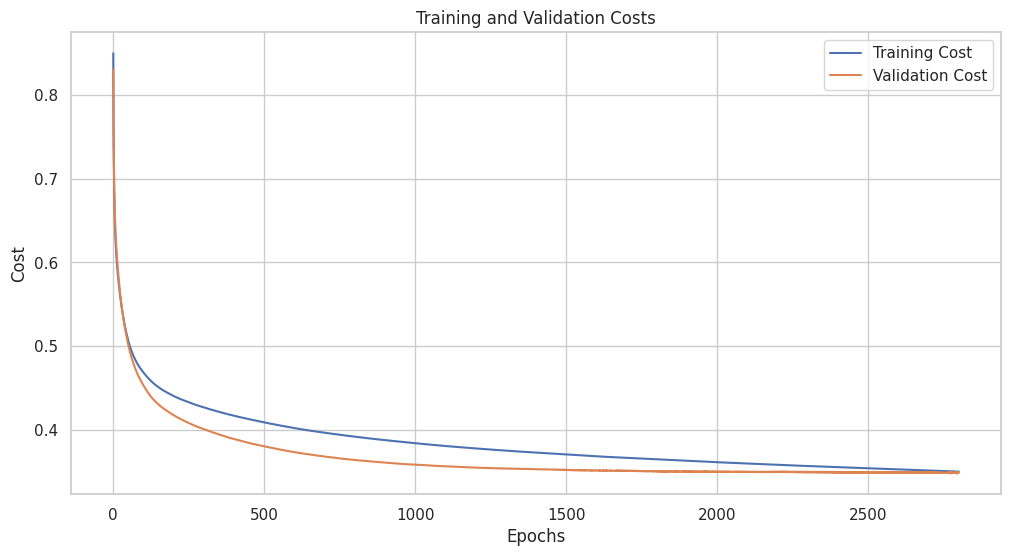

[I 2024-10-02 07:54:45,099] Trial 13 finished with value: 0.8590909090909091 and parameters: {'n_layers': 3, 'n_units_0': 44, 'n_units_1': 99, 'n_units_2': 29, 'learning_rate': 0.028822705482401064, 'lambda_reg': 1.1385700036705346e-05}. Best is trial 12 with value: 0.8636363636363636.


Epoch 0: Train Cost = 0.7532465134117947, Validation Cost = 0.7881251106664346
Train Metrics: {'accuracy': 0.510250569476082, 'precision': 0, 'recall': 0.0, 'f1': 0}
Validation Metrics: {'accuracy': 0.4590909090909091, 'precision': 0, 'recall': 0.0, 'f1': 0}
Epoch 50: Train Cost = 0.6517002146849732, Validation Cost = 0.670337980897767
Train Metrics: {'accuracy': 0.5865603644646925, 'precision': 0.7445255474452555, 'recall': 0.2372093023255814, 'f1': 0.3597883597883598}
Validation Metrics: {'accuracy': 0.55, 'precision': 0.8571428571428571, 'recall': 0.20168067226890757, 'f1': 0.32653061224489793}
Epoch 100: Train Cost = 0.6210715620803694, Validation Cost = 0.6363377148214512
Train Metrics: {'accuracy': 0.7118451025056948, 'precision': 0.8105263157894737, 'recall': 0.5372093023255814, 'f1': 0.6461538461538462}
Validation Metrics: {'accuracy': 0.7, 'precision': 0.8732394366197183, 'recall': 0.5210084033613446, 'f1': 0.6526315789473685}
Epoch 150: Train Cost = 0.5962569164009143, Valida

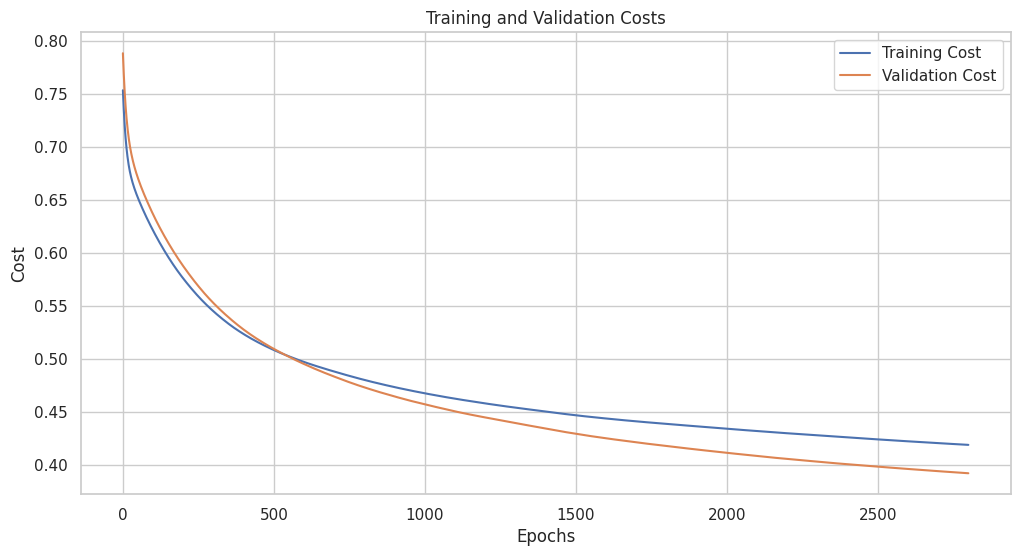

[I 2024-10-02 07:55:16,622] Trial 14 finished with value: 0.8318181818181818 and parameters: {'n_layers': 4, 'n_units_0': 36, 'n_units_1': 99, 'n_units_2': 39, 'n_units_3': 60, 'learning_rate': 0.0028522162448967386, 'lambda_reg': 4.02404938820685e-05}. Best is trial 12 with value: 0.8636363636363636.


Epoch 0: Train Cost = 0.8052418925622247, Validation Cost = 0.7691115485499708
Train Metrics: {'accuracy': 0.520501138952164, 'precision': 0.5056461731493099, 'recall': 0.9372093023255814, 'f1': 0.6568867155664222}
Validation Metrics: {'accuracy': 0.5727272727272728, 'precision': 0.5628140703517588, 'recall': 0.9411764705882353, 'f1': 0.7044025157232705}
Epoch 50: Train Cost = 0.4318662291024737, Validation Cost = 0.4218891802657213
Train Metrics: {'accuracy': 0.8120728929384966, 'precision': 0.8337531486146096, 'recall': 0.7697674418604651, 'f1': 0.8004836759371221}
Validation Metrics: {'accuracy': 0.8227272727272728, 'precision': 0.9081632653061225, 'recall': 0.7478991596638656, 'f1': 0.8202764976958525}
Epoch 100: Train Cost = 0.41027597181468306, Validation Cost = 0.39655010041139716
Train Metrics: {'accuracy': 0.8200455580865603, 'precision': 0.8523316062176166, 'recall': 0.7651162790697674, 'f1': 0.8063725490196079}
Validation Metrics: {'accuracy': 0.8272727272727273, 'precision'

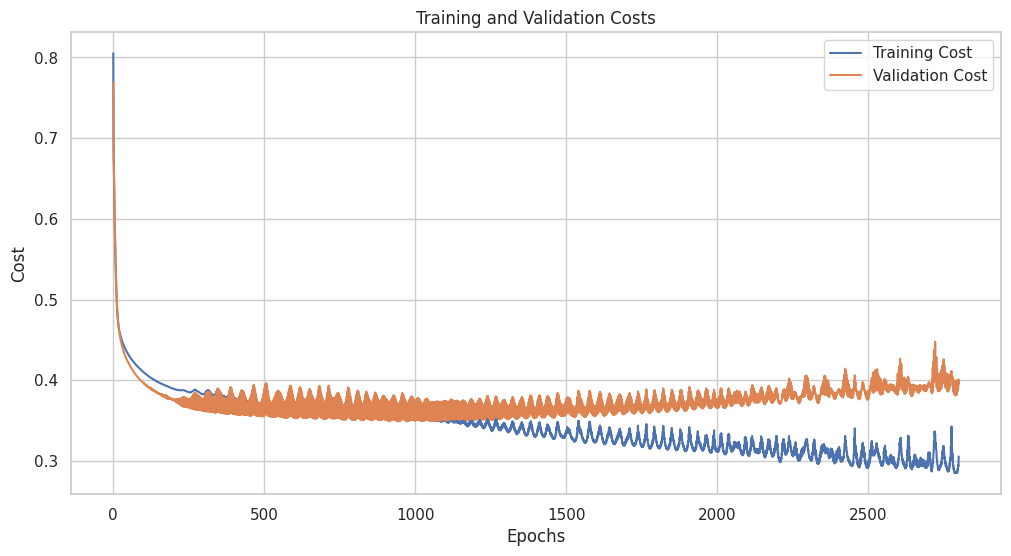

[I 2024-10-02 07:55:44,132] Trial 15 finished with value: 0.8636363636363636 and parameters: {'n_layers': 4, 'n_units_0': 60, 'n_units_1': 11, 'n_units_2': 41, 'n_units_3': 99, 'learning_rate': 0.08600547362603196, 'lambda_reg': 0.0008640258641636422}. Best is trial 12 with value: 0.8636363636363636.


Epoch 0: Train Cost = 0.7783009685931902, Validation Cost = 0.7611284882833648
Train Metrics: {'accuracy': 0.5330296127562643, 'precision': 0.8333333333333334, 'recall': 0.05813953488372093, 'f1': 0.10869565217391304}
Validation Metrics: {'accuracy': 0.4727272727272727, 'precision': 0.7142857142857143, 'recall': 0.04201680672268908, 'f1': 0.07936507936507937}
Epoch 50: Train Cost = 0.4533753682099881, Validation Cost = 0.4338693130268761
Train Metrics: {'accuracy': 0.8086560364464692, 'precision': 0.8133971291866029, 'recall': 0.7906976744186046, 'f1': 0.8018867924528302}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8584905660377359, 'recall': 0.7647058823529411, 'f1': 0.8088888888888889}
Epoch 100: Train Cost = 0.42338733962396846, Validation Cost = 0.39957490366550824
Train Metrics: {'accuracy': 0.8143507972665148, 'precision': 0.8329177057356608, 'recall': 0.7767441860465116, 'f1': 0.8038507821901324}
Validation Metrics: {'accuracy': 0.8318181818181818, 'preci

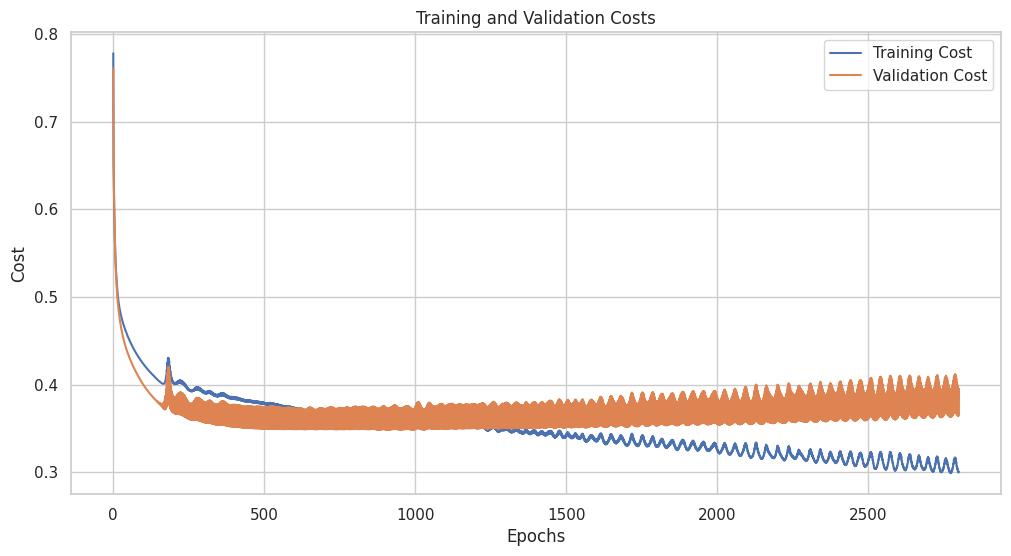

[I 2024-10-02 07:56:06,583] Trial 16 finished with value: 0.8727272727272727 and parameters: {'n_layers': 3, 'n_units_0': 69, 'n_units_1': 73, 'n_units_2': 20, 'learning_rate': 0.09931350502337162, 'lambda_reg': 0.0010347692955648457}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.6851362306867901, Validation Cost = 0.7009305720689973
Train Metrics: {'accuracy': 0.5068337129840547, 'precision': 0.0, 'recall': 0.0, 'f1': 0}
Validation Metrics: {'accuracy': 0.4636363636363636, 'precision': 1.0, 'recall': 0.008403361344537815, 'f1': 0.016666666666666666}
Epoch 50: Train Cost = 0.5565736008637099, Validation Cost = 0.55381529084992
Train Metrics: {'accuracy': 0.8018223234624146, 'precision': 0.821608040201005, 'recall': 0.7604651162790698, 'f1': 0.7898550724637681}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8725490196078431, 'recall': 0.7478991596638656, 'f1': 0.8054298642533937}
Epoch 100: Train Cost = 0.49851580429794284, Validation Cost = 0.4898237272008169
Train Metrics: {'accuracy': 0.7995444191343963, 'precision': 0.8143564356435643, 'recall': 0.7651162790697674, 'f1': 0.7889688249400479}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.8737864077669902, 'recall': 0.7563025210084033, 'f1': 0.8

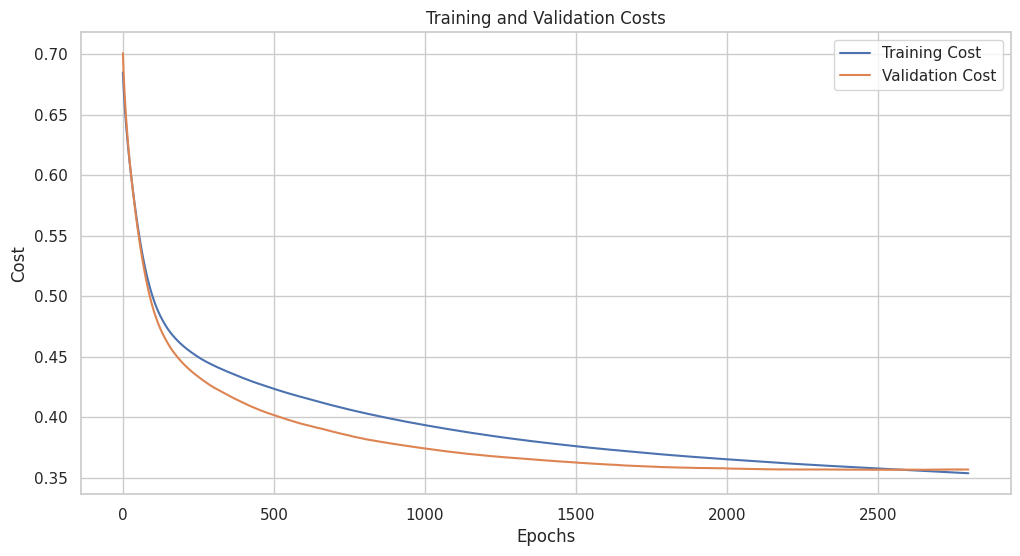

[I 2024-10-02 07:56:30,785] Trial 17 finished with value: 0.85 and parameters: {'n_layers': 3, 'n_units_0': 66, 'n_units_1': 80, 'n_units_2': 14, 'learning_rate': 0.026781677409028863, 'lambda_reg': 0.001931631838607122}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.6553388611671668, Validation Cost = 0.6744905044459049
Train Metrics: {'accuracy': 0.5763097949886105, 'precision': 1.0, 'recall': 0.13488372093023257, 'f1': 0.23770491803278693}
Validation Metrics: {'accuracy': 0.5272727272727272, 'precision': 1.0, 'recall': 0.12605042016806722, 'f1': 0.22388059701492538}
Epoch 50: Train Cost = 0.45864879609542075, Validation Cost = 0.44349671671290425
Train Metrics: {'accuracy': 0.8041002277904328, 'precision': 0.8131067961165048, 'recall': 0.7790697674418605, 'f1': 0.7957244655581948}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.8811881188118812, 'recall': 0.7478991596638656, 'f1': 0.8090909090909092}
Epoch 100: Train Cost = 0.44159891383317174, Validation Cost = 0.41851995363948513
Train Metrics: {'accuracy': 0.8052391799544419, 'precision': 0.8120481927710843, 'recall': 0.7837209302325582, 'f1': 0.7976331360946746}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.8823529411764706, '

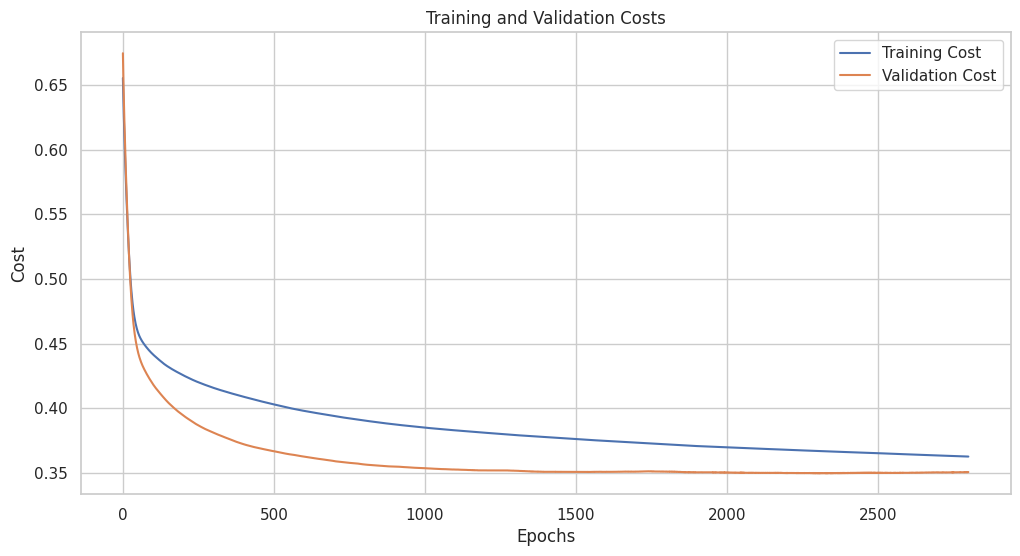

[I 2024-10-02 07:56:41,246] Trial 18 finished with value: 0.8545454545454545 and parameters: {'n_layers': 2, 'n_units_0': 10, 'n_units_1': 71, 'learning_rate': 0.0928048291586674, 'lambda_reg': 0.0004084073795061138}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.7686355876448593, Validation Cost = 0.7967607966071274
Train Metrics: {'accuracy': 0.2824601366742597, 'precision': 0.20588235294117646, 'recall': 0.16279069767441862, 'f1': 0.18181818181818182}
Validation Metrics: {'accuracy': 0.2590909090909091, 'precision': 0.21794871794871795, 'recall': 0.14285714285714285, 'f1': 0.17258883248730966}
Epoch 50: Train Cost = 0.6240990906283849, Validation Cost = 0.6492489637542088
Train Metrics: {'accuracy': 0.6879271070615034, 'precision': 0.9105263157894737, 'recall': 0.40232558139534885, 'f1': 0.5580645161290323}
Validation Metrics: {'accuracy': 0.6681818181818182, 'precision': 0.9423076923076923, 'recall': 0.4117647058823529, 'f1': 0.5730994152046782}
Epoch 100: Train Cost = 0.5620468321605158, Validation Cost = 0.5767736946086475
Train Metrics: {'accuracy': 0.7722095671981777, 'precision': 0.859375, 'recall': 0.6395348837209303, 'f1': 0.7333333333333334}
Validation Metrics: {'accuracy': 0.7545454545454545, 'precision': 0.

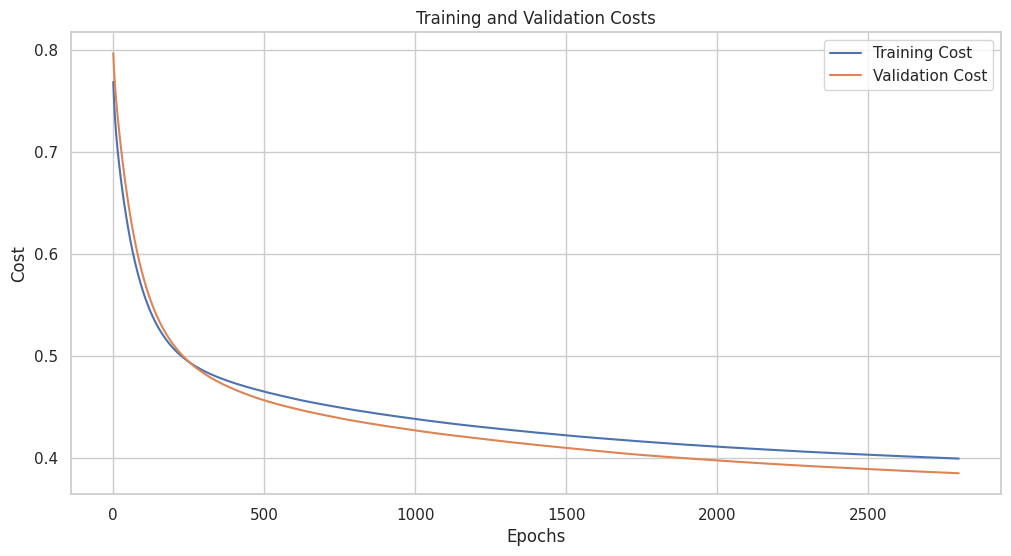

[I 2024-10-02 07:56:58,282] Trial 19 finished with value: 0.8318181818181818 and parameters: {'n_layers': 2, 'n_units_0': 30, 'n_units_1': 90, 'learning_rate': 0.016269181112710272, 'lambda_reg': 0.04046366631929715}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.7017045716506597, Validation Cost = 0.6969389165696905
Train Metrics: {'accuracy': 0.479498861047836, 'precision': 0.4844649021864212, 'recall': 0.9790697674418605, 'f1': 0.6481909160892996}
Validation Metrics: {'accuracy': 0.5227272727272727, 'precision': 0.5324074074074074, 'recall': 0.9663865546218487, 'f1': 0.6865671641791045}
Epoch 50: Train Cost = 0.5796292928625971, Validation Cost = 0.5616008834592872
Train Metrics: {'accuracy': 0.8029612756264237, 'precision': 0.8023529411764706, 'recall': 0.7930232558139535, 'f1': 0.7976608187134503}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.8611111111111112, 'recall': 0.7815126050420168, 'f1': 0.8193832599118943}
Epoch 100: Train Cost = 0.5212473849414386, Validation Cost = 0.5001220521916273
Train Metrics: {'accuracy': 0.7995444191343963, 'precision': 0.8067632850241546, 'recall': 0.7767441860465116, 'f1': 0.7914691943127962}
Validation Metrics: {'accuracy': 0.8181818181818182, 'precision': 

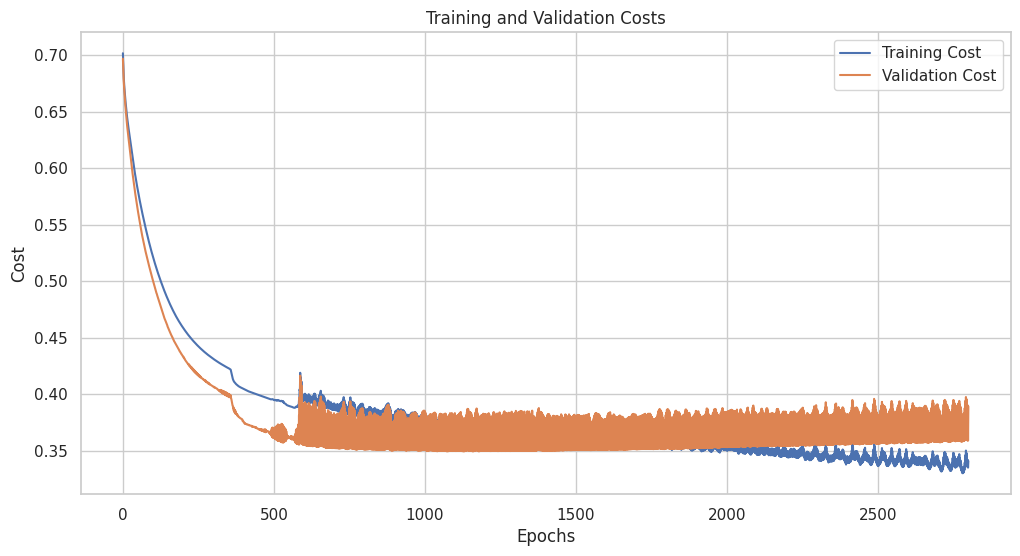

[I 2024-10-02 07:57:25,412] Trial 20 finished with value: 0.8681818181818182 and parameters: {'n_layers': 4, 'n_units_0': 70, 'n_units_1': 68, 'n_units_2': 25, 'n_units_3': 10, 'learning_rate': 0.04431109945754346, 'lambda_reg': 0.0004331791290789688}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.9131654973858867, Validation Cost = 0.8550251743602545
Train Metrics: {'accuracy': 0.6412300683371298, 'precision': 0.609942638623327, 'recall': 0.7418604651162791, 'f1': 0.6694648478488983}
Validation Metrics: {'accuracy': 0.7, 'precision': 0.6992481203007519, 'recall': 0.7815126050420168, 'f1': 0.7380952380952381}
Epoch 50: Train Cost = 0.473834542962553, Validation Cost = 0.4591391115237578
Train Metrics: {'accuracy': 0.7904328018223234, 'precision': 0.8288770053475936, 'recall': 0.7209302325581395, 'f1': 0.7711442786069651}
Validation Metrics: {'accuracy': 0.7909090909090909, 'precision': 0.8686868686868687, 'recall': 0.7226890756302521, 'f1': 0.7889908256880734}
Epoch 100: Train Cost = 0.4468763553834203, Validation Cost = 0.42397801158849413
Train Metrics: {'accuracy': 0.8029612756264237, 'precision': 0.8320413436692506, 'recall': 0.7488372093023256, 'f1': 0.7882496940024479}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.875, 'recall'

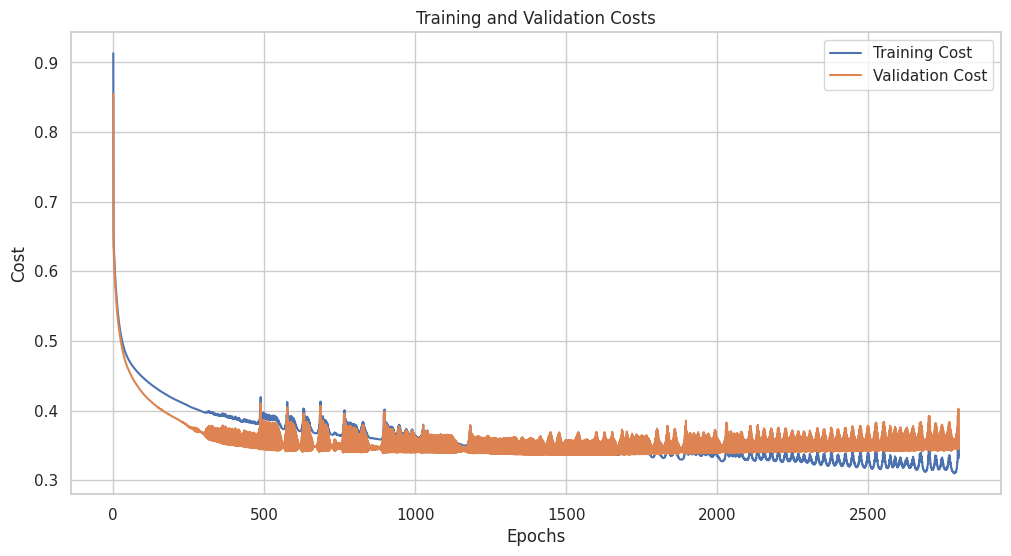

[I 2024-10-02 07:57:49,654] Trial 21 finished with value: 0.8272727272727273 and parameters: {'n_layers': 4, 'n_units_0': 70, 'n_units_1': 66, 'n_units_2': 25, 'n_units_3': 10, 'learning_rate': 0.03679109790568924, 'lambda_reg': 0.0004595194188571172}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.8894515668289633, Validation Cost = 0.9498277928808053
Train Metrics: {'accuracy': 0.5113895216400911, 'precision': 1.0, 'recall': 0.002325581395348837, 'f1': 0.004640371229698376}
Validation Metrics: {'accuracy': 0.4636363636363636, 'precision': 1.0, 'recall': 0.008403361344537815, 'f1': 0.016666666666666666}
Epoch 50: Train Cost = 0.49513739903664056, Validation Cost = 0.49679825075727985
Train Metrics: {'accuracy': 0.7995444191343963, 'precision': 0.8207070707070707, 'recall': 0.7558139534883721, 'f1': 0.7869249394673123}
Validation Metrics: {'accuracy': 0.7954545454545454, 'precision': 0.87, 'recall': 0.7310924369747899, 'f1': 0.7945205479452055}
Epoch 100: Train Cost = 0.4637704324333853, Validation Cost = 0.45488935830371585
Train Metrics: {'accuracy': 0.8052391799544419, 'precision': 0.8105515587529976, 'recall': 0.786046511627907, 'f1': 0.7981109799291618}
Validation Metrics: {'accuracy': 0.8227272727272728, 'precision': 0.8773584905660378, 'recall': 0.7

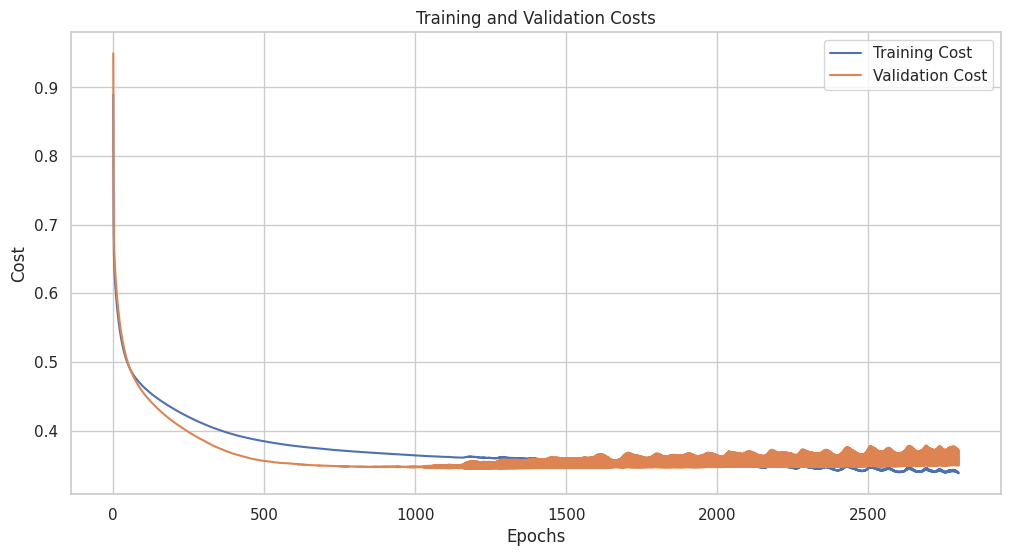

[I 2024-10-02 07:58:10,469] Trial 22 finished with value: 0.8409090909090909 and parameters: {'n_layers': 3, 'n_units_0': 51, 'n_units_1': 47, 'n_units_2': 25, 'learning_rate': 0.050187250573562874, 'lambda_reg': 0.00010375366802232823}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.7388164547769596, Validation Cost = 0.7607473339439149
Train Metrics: {'accuracy': 0.510250569476082, 'precision': 0, 'recall': 0.0, 'f1': 0}
Validation Metrics: {'accuracy': 0.4590909090909091, 'precision': 0, 'recall': 0.0, 'f1': 0}
Epoch 50: Train Cost = 0.5668009174188156, Validation Cost = 0.5703797021763463
Train Metrics: {'accuracy': 0.7961275626423691, 'precision': 0.8226221079691517, 'recall': 0.7441860465116279, 'f1': 0.7814407814407814}
Validation Metrics: {'accuracy': 0.8, 'precision': 0.8787878787878788, 'recall': 0.7310924369747899, 'f1': 0.7981651376146789}
Epoch 100: Train Cost = 0.500818330895451, Validation Cost = 0.4965309525850949
Train Metrics: {'accuracy': 0.8018223234624146, 'precision': 0.8152709359605911, 'recall': 0.7697674418604651, 'f1': 0.7918660287081338}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.8811881188118812, 'recall': 0.7478991596638656, 'f1': 0.8090909090909092}
Epoch 150: Train Cost = 0.474563584552

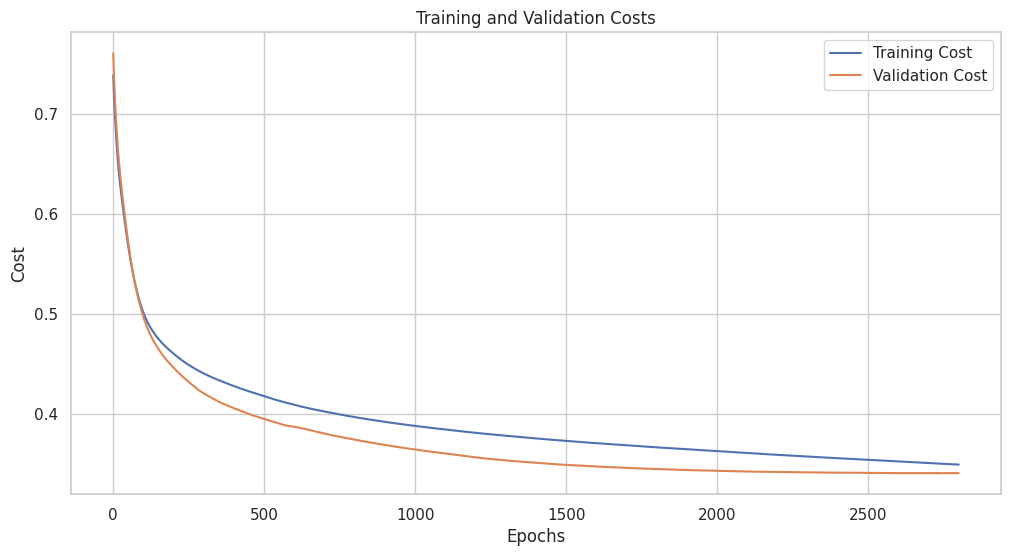

[I 2024-10-02 07:58:37,508] Trial 23 finished with value: 0.8590909090909091 and parameters: {'n_layers': 4, 'n_units_0': 71, 'n_units_1': 73, 'n_units_2': 32, 'n_units_3': 25, 'learning_rate': 0.01689029289387511, 'lambda_reg': 0.0020289937563825597}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.6465114143535623, Validation Cost = 0.65618290781143
Train Metrics: {'accuracy': 0.5774487471526196, 'precision': 0.8554216867469879, 'recall': 0.16511627906976745, 'f1': 0.27680311890838205}
Validation Metrics: {'accuracy': 0.5409090909090909, 'precision': 0.9090909090909091, 'recall': 0.16806722689075632, 'f1': 0.2836879432624114}
Epoch 50: Train Cost = 0.44678635363365965, Validation Cost = 0.42638095079937405
Train Metrics: {'accuracy': 0.8006833712984055, 'precision': 0.8028503562945368, 'recall': 0.786046511627907, 'f1': 0.7943595769682726}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.8737864077669902, 'recall': 0.7563025210084033, 'f1': 0.8108108108108107}
Epoch 100: Train Cost = 0.4275536745602598, Validation Cost = 0.4092920321852609
Train Metrics: {'accuracy': 0.8006833712984055, 'precision': 0.7904328018223234, 'recall': 0.8069767441860465, 'f1': 0.7986191024165707}
Validation Metrics: {'accuracy': 0.8318181818181818, 'precision

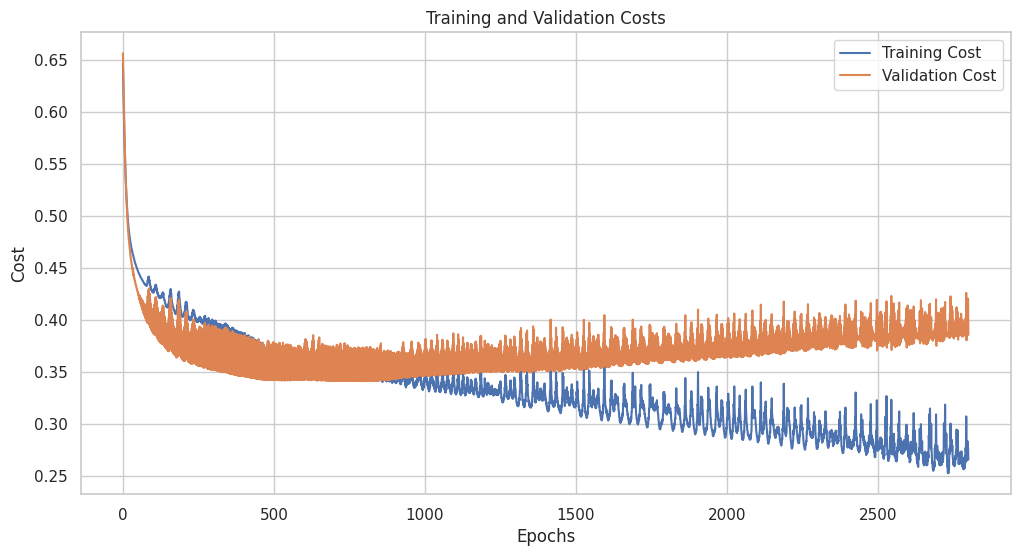

[I 2024-10-02 07:59:16,846] Trial 24 finished with value: 0.85 and parameters: {'n_layers': 5, 'n_units_0': 89, 'n_units_1': 90, 'n_units_2': 18, 'n_units_3': 62, 'n_units_4': 16, 'learning_rate': 0.06032243858845566, 'lambda_reg': 0.0001828908656837003}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.9474026609583897, Validation Cost = 0.9041322189470317
Train Metrics: {'accuracy': 0.45671981776765375, 'precision': 0.44418052256532065, 'recall': 0.43488372093023253, 'f1': 0.43948296122209163}
Validation Metrics: {'accuracy': 0.42272727272727273, 'precision': 0.4574468085106383, 'recall': 0.36134453781512604, 'f1': 0.40375586854460094}
Epoch 50: Train Cost = 0.4775716172877642, Validation Cost = 0.46898868582982295
Train Metrics: {'accuracy': 0.806378132118451, 'precision': 0.8140096618357487, 'recall': 0.7837209302325582, 'f1': 0.7985781990521327}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8653846153846154, 'recall': 0.7563025210084033, 'f1': 0.8071748878923767}
Epoch 100: Train Cost = 0.4511920559381118, Validation Cost = 0.43324349254068745
Train Metrics: {'accuracy': 0.8052391799544419, 'precision': 0.8120481927710843, 'recall': 0.7837209302325582, 'f1': 0.7976331360946746}
Validation Metrics: {'accuracy': 0.8090909090909091, 'pre

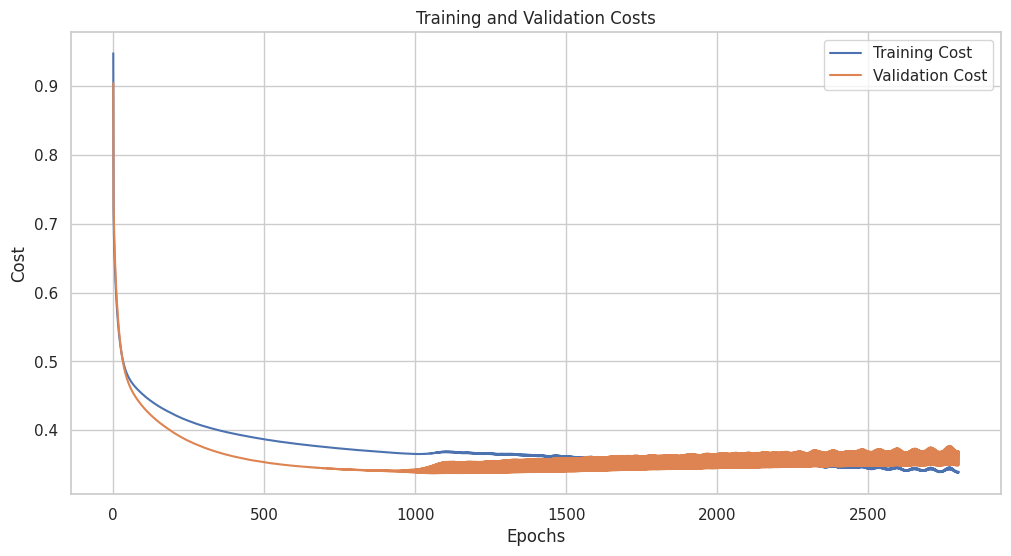

[I 2024-10-02 07:59:38,208] Trial 25 finished with value: 0.8681818181818182 and parameters: {'n_layers': 2, 'n_units_0': 60, 'n_units_1': 89, 'learning_rate': 0.09933405686687959, 'lambda_reg': 0.0014115536877134258}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.7475762770569598, Validation Cost = 0.7352511189266813
Train Metrics: {'accuracy': 0.4191343963553531, 'precision': 0.4256505576208178, 'recall': 0.5325581395348837, 'f1': 0.47314049586776863}
Validation Metrics: {'accuracy': 0.45, 'precision': 0.49206349206349204, 'recall': 0.5210084033613446, 'f1': 0.5061224489795918}
Epoch 50: Train Cost = 0.531592932557001, Validation Cost = 0.526433031213216
Train Metrics: {'accuracy': 0.7938496583143508, 'precision': 0.8120300751879699, 'recall': 0.7534883720930232, 'f1': 0.781664656212304}
Validation Metrics: {'accuracy': 0.7863636363636364, 'precision': 0.86, 'recall': 0.7226890756302521, 'f1': 0.7853881278538812}
Epoch 100: Train Cost = 0.4961097386363251, Validation Cost = 0.4865282030382726
Train Metrics: {'accuracy': 0.806378132118451, 'precision': 0.8217821782178217, 'recall': 0.772093023255814, 'f1': 0.7961630695443644}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8653846153846154, 'recall': 

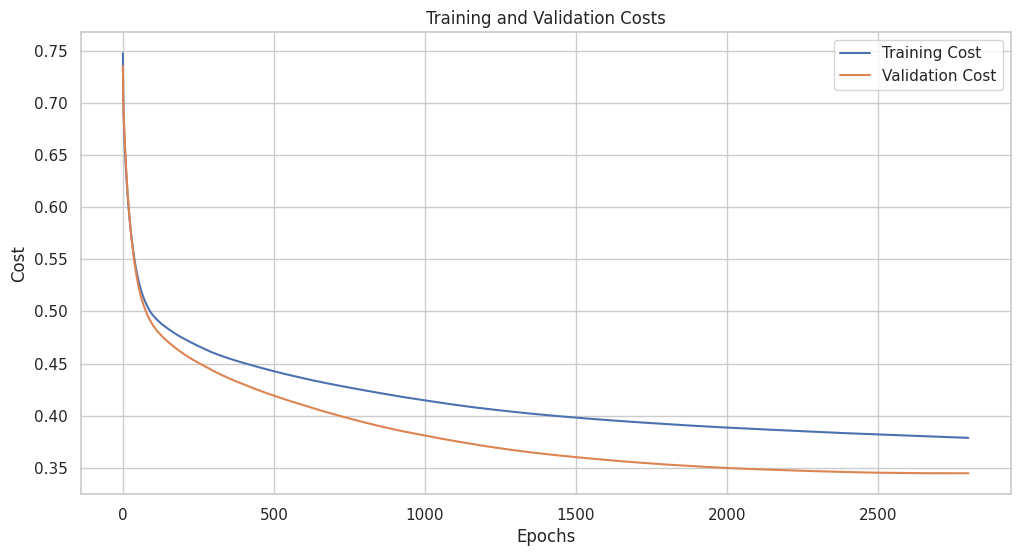

[I 2024-10-02 07:59:54,952] Trial 26 finished with value: 0.85 and parameters: {'n_layers': 2, 'n_units_0': 57, 'n_units_1': 51, 'learning_rate': 0.020455494769253298, 'lambda_reg': 0.0015288419613122095}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.8259026785953264, Validation Cost = 0.7942505105798716
Train Metrics: {'accuracy': 0.48291571753986334, 'precision': 0.48604651162790696, 'recall': 0.9720930232558139, 'f1': 0.648062015503876}
Validation Metrics: {'accuracy': 0.5272727272727272, 'precision': 0.5348837209302325, 'recall': 0.9663865546218487, 'f1': 0.6886227544910178}
Epoch 50: Train Cost = 0.6460297895849179, Validation Cost = 0.6366952217674602
Train Metrics: {'accuracy': 0.6469248291571754, 'precision': 0.6973684210526315, 'recall': 0.4930232558139535, 'f1': 0.5776566757493188}
Validation Metrics: {'accuracy': 0.6954545454545454, 'precision': 0.776595744680851, 'recall': 0.6134453781512605, 'f1': 0.6854460093896713}
Epoch 100: Train Cost = 0.6030956037885642, Validation Cost = 0.597009163498757
Train Metrics: {'accuracy': 0.6845102505694761, 'precision': 0.7475728155339806, 'recall': 0.5372093023255814, 'f1': 0.625169147496617}
Validation Metrics: {'accuracy': 0.7318181818181818, 'precision': 0

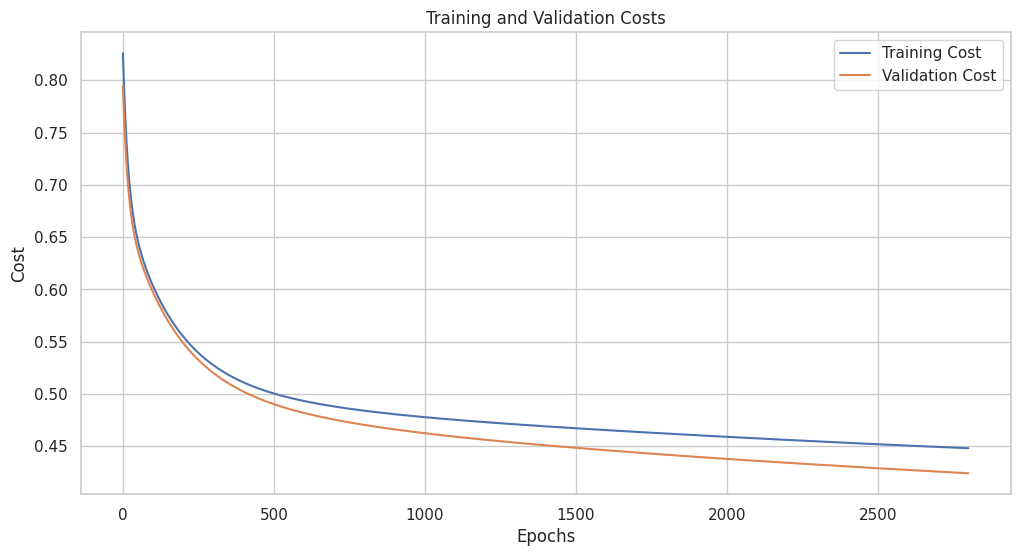

[I 2024-10-02 08:00:07,652] Trial 27 finished with value: 0.8090909090909091 and parameters: {'n_layers': 1, 'n_units_0': 84, 'learning_rate': 0.010814627705339731, 'lambda_reg': 0.005171132111611467}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.8430538686764402, Validation Cost = 0.8125296825453717
Train Metrics: {'accuracy': 0.47380410022779046, 'precision': 0.48104265402843605, 'recall': 0.9441860465116279, 'f1': 0.6373626373626373}
Validation Metrics: {'accuracy': 0.509090909090909, 'precision': 0.5260663507109005, 'recall': 0.9327731092436975, 'f1': 0.6727272727272727}
Epoch 50: Train Cost = 0.4950366233716886, Validation Cost = 0.49111792627539397
Train Metrics: {'accuracy': 0.8041002277904328, 'precision': 0.8225, 'recall': 0.7651162790697674, 'f1': 0.7927710843373494}
Validation Metrics: {'accuracy': 0.8, 'precision': 0.8640776699029126, 'recall': 0.7478991596638656, 'f1': 0.8018018018018017}
Epoch 100: Train Cost = 0.4648485118151072, Validation Cost = 0.4553518029976855
Train Metrics: {'accuracy': 0.8052391799544419, 'precision': 0.8120481927710843, 'recall': 0.7837209302325582, 'f1': 0.7976331360946746}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.8679245283018868, 'rec

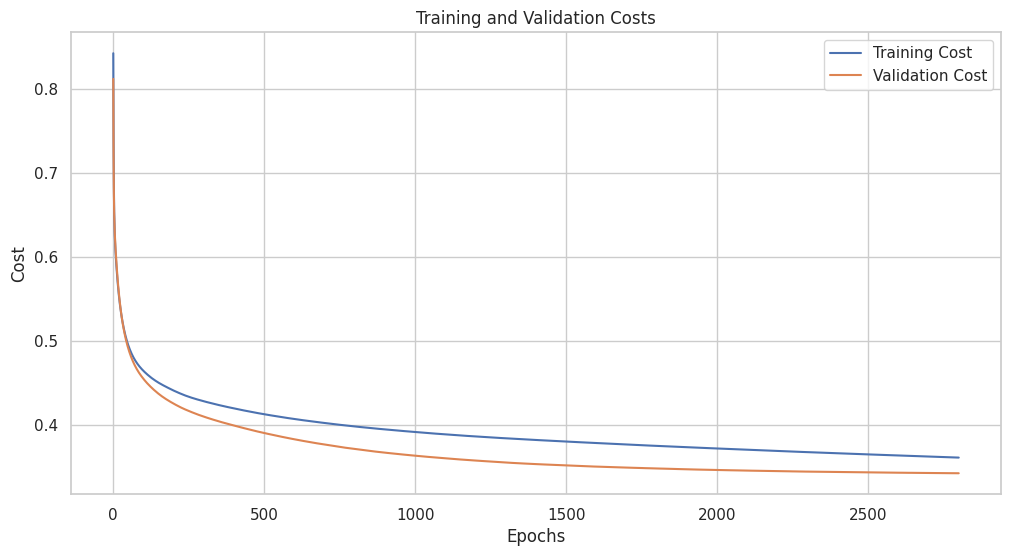

[I 2024-10-02 08:00:29,614] Trial 28 finished with value: 0.8545454545454545 and parameters: {'n_layers': 2, 'n_units_0': 73, 'n_units_1': 87, 'learning_rate': 0.03979888325062714, 'lambda_reg': 0.0004895901882025524}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.698011880330611, Validation Cost = 0.7222395492826303
Train Metrics: {'accuracy': 0.510250569476082, 'precision': 0, 'recall': 0.0, 'f1': 0}
Validation Metrics: {'accuracy': 0.4590909090909091, 'precision': 0, 'recall': 0.0, 'f1': 0}
Epoch 50: Train Cost = 0.49525683396822484, Validation Cost = 0.4832005798342148
Train Metrics: {'accuracy': 0.7995444191343963, 'precision': 0.8190954773869347, 'recall': 0.7581395348837209, 'f1': 0.78743961352657}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.8823529411764706, 'recall': 0.7563025210084033, 'f1': 0.8144796380090497}
Epoch 100: Train Cost = 0.4654096367389423, Validation Cost = 0.4462722625688679
Train Metrics: {'accuracy': 0.7995444191343963, 'precision': 0.812807881773399, 'recall': 0.7674418604651163, 'f1': 0.7894736842105263}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.8666666666666667, 'recall': 0.7647058823529411, 'f1': 0.8125}
Epoch 150: Train Cost = 0.44849945187

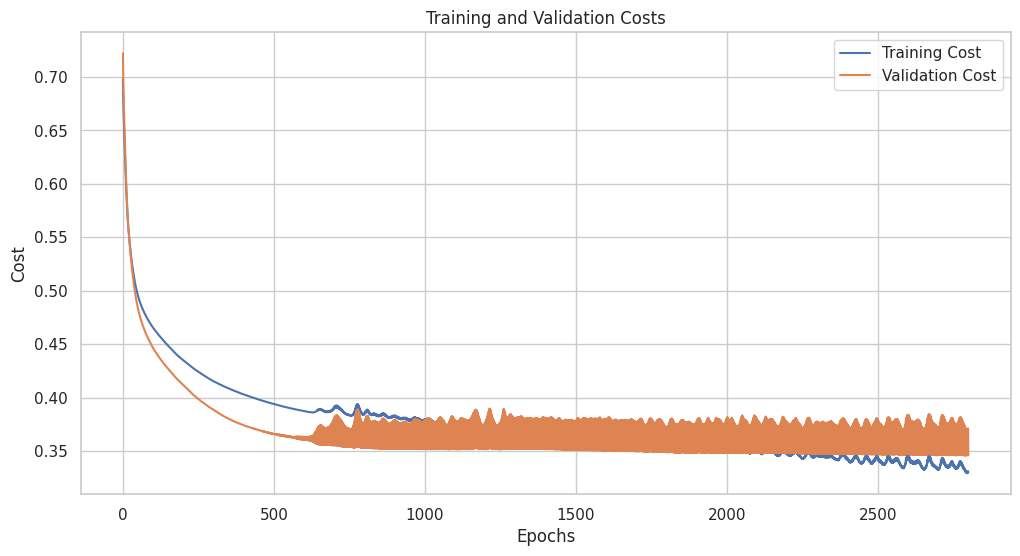

[I 2024-10-02 08:00:59,921] Trial 29 finished with value: 0.8409090909090909 and parameters: {'n_layers': 4, 'n_units_0': 63, 'n_units_1': 68, 'n_units_2': 49, 'n_units_3': 22, 'learning_rate': 0.04443136697204642, 'lambda_reg': 0.00025417523007470775}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.8254875216841896, Validation Cost = 0.9261370381499459
Train Metrics: {'accuracy': 0.5546697038724373, 'precision': 0.6274509803921569, 'recall': 0.22325581395348837, 'f1': 0.3293310463121784}
Validation Metrics: {'accuracy': 0.5272727272727272, 'precision': 0.7027027027027027, 'recall': 0.2184873949579832, 'f1': 0.3333333333333333}
Epoch 50: Train Cost = 0.45214726936483574, Validation Cost = 0.5523924637173703
Train Metrics: {'accuracy': 0.8189066059225513, 'precision': 0.8362282878411911, 'recall': 0.7837209302325582, 'f1': 0.8091236494597839}
Validation Metrics: {'accuracy': 0.8363636363636363, 'precision': 0.9108910891089109, 'recall': 0.773109243697479, 'f1': 0.8363636363636364}
Epoch 100: Train Cost = 0.4361044806946099, Validation Cost = 0.5489438541778979
Train Metrics: {'accuracy': 0.8257403189066059, 'precision': 0.8258823529411765, 'recall': 0.8162790697674419, 'f1': 0.8210526315789474}
Validation Metrics: {'accuracy': 0.85, 'precision': 0.9134615384

<ipython-input-42-e4a75818b08c>:3: RuntimeWarning: divide by zero encountered in log
  cross_entropy_cost = -1/m * np.sum(Y * np.log(A_l) + (1 - Y) * np.log(1 - A_l))
<ipython-input-42-e4a75818b08c>:3: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_cost = -1/m * np.sum(Y * np.log(A_l) + (1 - Y) * np.log(1 - A_l))
<ipython-input-42-e4a75818b08c>:3: RuntimeWarning: divide by zero encountered in log
  cross_entropy_cost = -1/m * np.sum(Y * np.log(A_l) + (1 - Y) * np.log(1 - A_l))
<ipython-input-42-e4a75818b08c>:3: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_cost = -1/m * np.sum(Y * np.log(A_l) + (1 - Y) * np.log(1 - A_l))


Epoch 2750: Train Cost = 0.17777810595927857, Validation Cost = 0.7673069921305063
Train Metrics: {'accuracy': 0.9430523917995444, 'precision': 0.9702970297029703, 'recall': 0.9116279069767442, 'f1': 0.9400479616306955}
Validation Metrics: {'accuracy': 0.8454545454545455, 'precision': 0.9047619047619048, 'recall': 0.7983193277310925, 'f1': 0.8482142857142857}


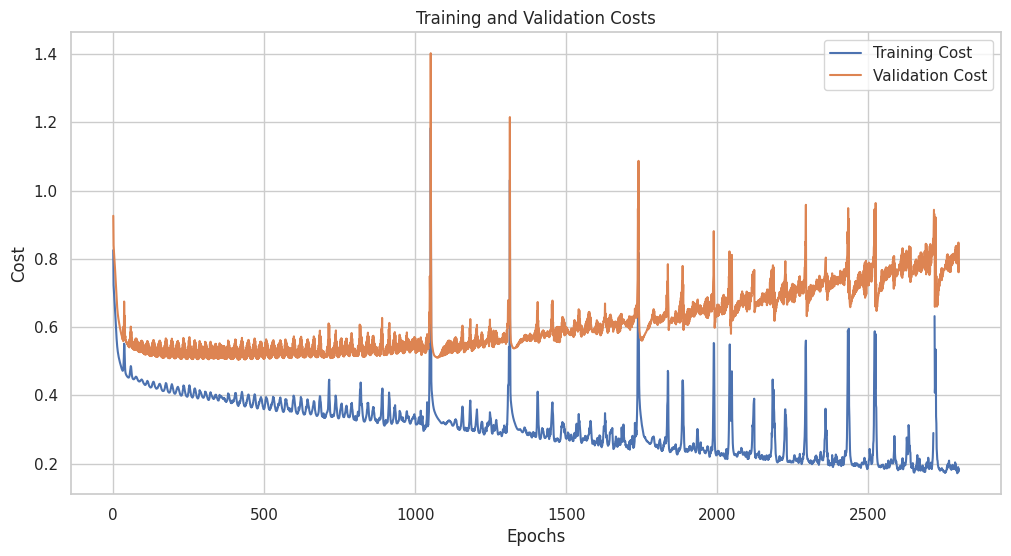

[I 2024-10-02 08:01:58,267] Trial 30 finished with value: 0.8454545454545455 and parameters: {'n_layers': 6, 'n_units_0': 100, 'n_units_1': 75, 'n_units_2': 20, 'n_units_3': 48, 'n_units_4': 98, 'n_units_5': 93, 'learning_rate': 0.09694943437079388, 'lambda_reg': 0.07696977860498716}. Best is trial 16 with value: 0.8727272727272727.


Epoch 0: Train Cost = 0.6898809924255687, Validation Cost = 0.7032091984519995
Train Metrics: {'accuracy': 0.5159453302961275, 'precision': 0.5221238938053098, 'recall': 0.1372093023255814, 'f1': 0.21731123388581955}
Validation Metrics: {'accuracy': 0.5, 'precision': 0.6956521739130435, 'recall': 0.13445378151260504, 'f1': 0.22535211267605634}
Epoch 50: Train Cost = 0.4702256076913738, Validation Cost = 0.44652346710772467
Train Metrics: {'accuracy': 0.8052391799544419, 'precision': 0.8166259168704156, 'recall': 0.7767441860465116, 'f1': 0.7961859356376639}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.8811881188118812, 'recall': 0.7478991596638656, 'f1': 0.8090909090909092}
Epoch 100: Train Cost = 0.4409391762082285, Validation Cost = 0.4109873224736526
Train Metrics: {'accuracy': 0.7995444191343963, 'precision': 0.7995283018867925, 'recall': 0.7883720930232558, 'f1': 0.7939110070257611}
Validation Metrics: {'accuracy': 0.8227272727272728, 'precision': 0.88461538

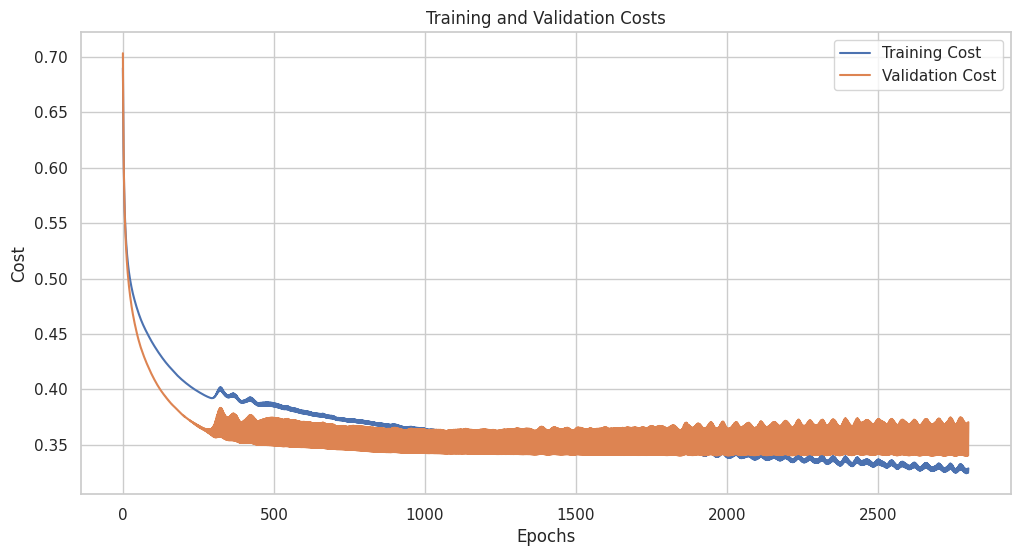

[I 2024-10-02 08:02:24,976] Trial 31 finished with value: 0.8772727272727273 and parameters: {'n_layers': 3, 'n_units_0': 66, 'n_units_1': 94, 'n_units_2': 34, 'learning_rate': 0.05700347634172194, 'lambda_reg': 0.0009178504123377064}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.7599638216691479, Validation Cost = 0.7429318247382904
Train Metrics: {'accuracy': 0.5444191343963554, 'precision': 0.5251677852348994, 'recall': 0.727906976744186, 'f1': 0.6101364522417154}
Validation Metrics: {'accuracy': 0.5590909090909091, 'precision': 0.5763888888888888, 'recall': 0.6974789915966386, 'f1': 0.6311787072243346}
Epoch 50: Train Cost = 0.4943669439182512, Validation Cost = 0.49340385229311756
Train Metrics: {'accuracy': 0.8018223234624146, 'precision': 0.8232323232323232, 'recall': 0.7581395348837209, 'f1': 0.7893462469733655}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8725490196078431, 'recall': 0.7478991596638656, 'f1': 0.8054298642533937}
Epoch 100: Train Cost = 0.4654309933648967, Validation Cost = 0.4564674719172723
Train Metrics: {'accuracy': 0.8029612756264237, 'precision': 0.8204488778054863, 'recall': 0.7651162790697674, 'f1': 0.7918170878459688}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision':

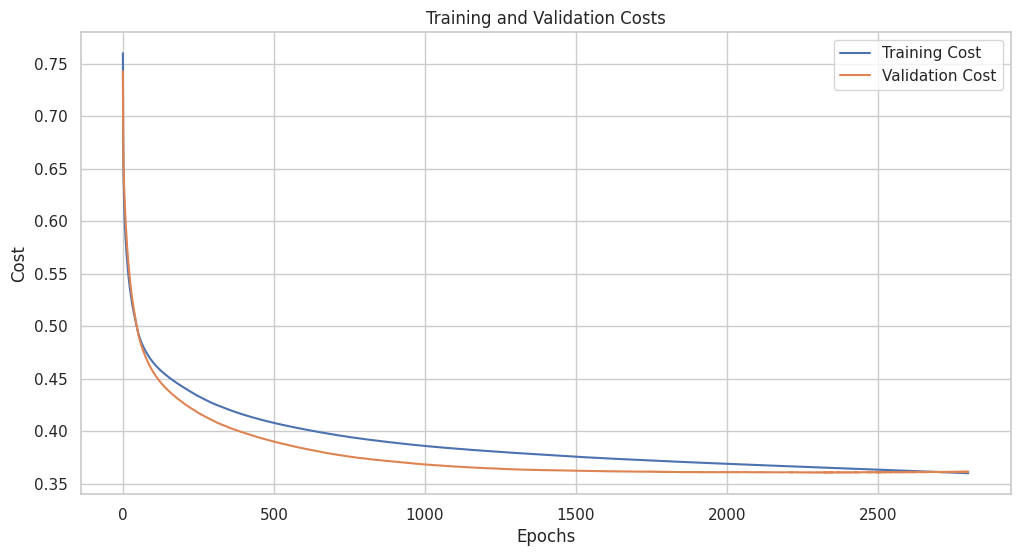

[I 2024-10-02 08:02:55,357] Trial 32 finished with value: 0.8590909090909091 and parameters: {'n_layers': 3, 'n_units_0': 66, 'n_units_1': 87, 'n_units_2': 48, 'learning_rate': 0.028471668244601397, 'lambda_reg': 0.0010922943109573102}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.6951051409580431, Validation Cost = 0.6949024113068157
Train Metrics: {'accuracy': 0.5808656036446469, 'precision': 0.5484375, 'recall': 0.8162790697674419, 'f1': 0.6560747663551402}
Validation Metrics: {'accuracy': 0.6045454545454545, 'precision': 0.5987654320987654, 'recall': 0.8151260504201681, 'f1': 0.6903914590747331}
Epoch 50: Train Cost = 0.48110067632783216, Validation Cost = 0.4770876192059586
Train Metrics: {'accuracy': 0.8041002277904328, 'precision': 0.8241206030150754, 'recall': 0.7627906976744186, 'f1': 0.7922705314009663}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8653846153846154, 'recall': 0.7563025210084033, 'f1': 0.8071748878923767}
Epoch 100: Train Cost = 0.4497939042852266, Validation Cost = 0.44073062904889754
Train Metrics: {'accuracy': 0.8052391799544419, 'precision': 0.8181818181818182, 'recall': 0.7744186046511627, 'f1': 0.7956989247311828}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.8666

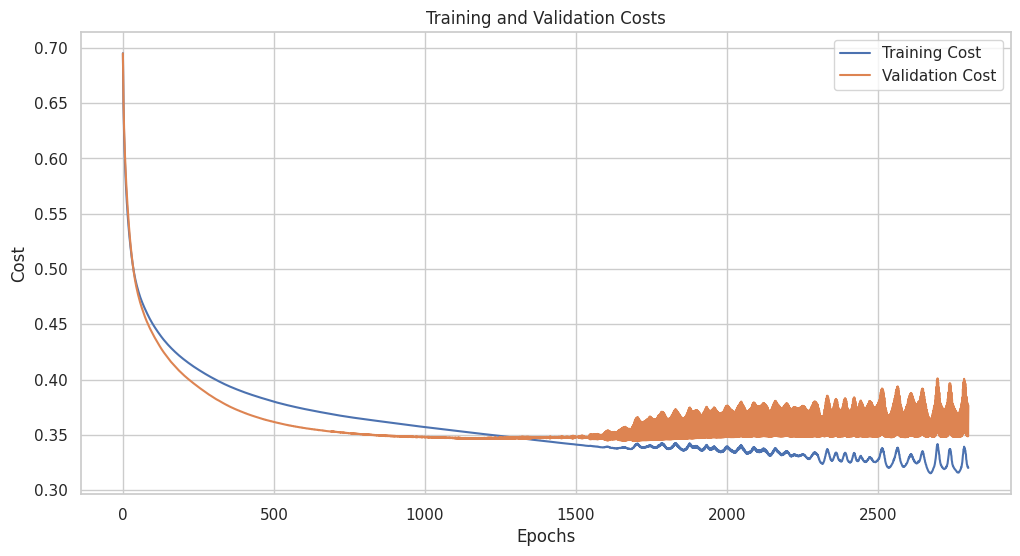

[I 2024-10-02 08:03:22,515] Trial 33 finished with value: 0.8681818181818182 and parameters: {'n_layers': 3, 'n_units_0': 62, 'n_units_1': 81, 'n_units_2': 22, 'learning_rate': 0.05447264412457552, 'lambda_reg': 0.0029247464463734827}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.7927434767033198, Validation Cost = 0.7861366486789174
Train Metrics: {'accuracy': 0.4430523917995444, 'precision': 0.3627906976744186, 'recall': 0.1813953488372093, 'f1': 0.24186046511627907}
Validation Metrics: {'accuracy': 0.4, 'precision': 0.37735849056603776, 'recall': 0.16806722689075632, 'f1': 0.23255813953488375}
Epoch 50: Train Cost = 0.4658554451983168, Validation Cost = 0.44678641450176354
Train Metrics: {'accuracy': 0.7972665148063781, 'precision': 0.7916666666666666, 'recall': 0.7953488372093023, 'f1': 0.7935034802784221}
Validation Metrics: {'accuracy': 0.8272727272727273, 'precision': 0.8648648648648649, 'recall': 0.8067226890756303, 'f1': 0.8347826086956522}
Epoch 100: Train Cost = 0.42620242891836274, Validation Cost = 0.40472569780207696
Train Metrics: {'accuracy': 0.8097949886104784, 'precision': 0.815347721822542, 'recall': 0.7906976744186046, 'f1': 0.8028335301062575}
Validation Metrics: {'accuracy': 0.8272727272727273, 'precision': 0.893203

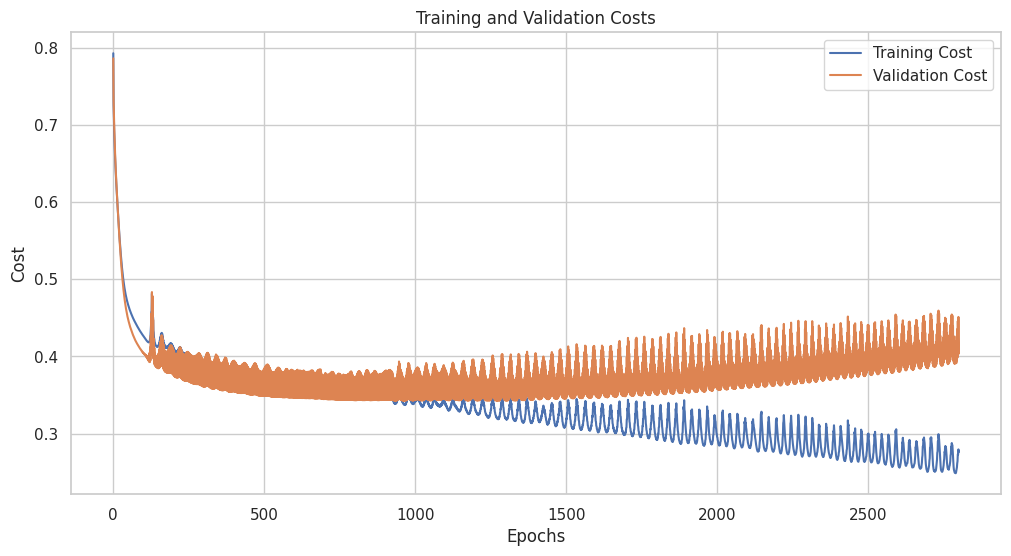

[I 2024-10-02 08:04:02,850] Trial 34 finished with value: 0.8363636363636363 and parameters: {'n_layers': 5, 'n_units_0': 79, 'n_units_1': 93, 'n_units_2': 33, 'n_units_3': 35, 'n_units_4': 77, 'learning_rate': 0.04787282349936796, 'lambda_reg': 0.0006204529261772647}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.8405095583721252, Validation Cost = 0.7907303712818451
Train Metrics: {'accuracy': 0.489749430523918, 'precision': 0.489749430523918, 'recall': 1.0, 'f1': 0.6574923547400612}
Validation Metrics: {'accuracy': 0.5409090909090909, 'precision': 0.5409090909090909, 'recall': 1.0, 'f1': 0.7020648967551621}
Epoch 50: Train Cost = 0.5437518236959321, Validation Cost = 0.5396879233436961
Train Metrics: {'accuracy': 0.7813211845102506, 'precision': 0.8181818181818182, 'recall': 0.7116279069767442, 'f1': 0.7611940298507464}
Validation Metrics: {'accuracy': 0.7727272727272727, 'precision': 0.8484848484848485, 'recall': 0.7058823529411765, 'f1': 0.7706422018348624}
Epoch 100: Train Cost = 0.5194062734715651, Validation Cost = 0.5148436815570262
Train Metrics: {'accuracy': 0.7927107061503417, 'precision': 0.8263157894736842, 'recall': 0.7302325581395349, 'f1': 0.7753086419753087}
Validation Metrics: {'accuracy': 0.7909090909090909, 'precision': 0.8686868686868687, 'recall': 0

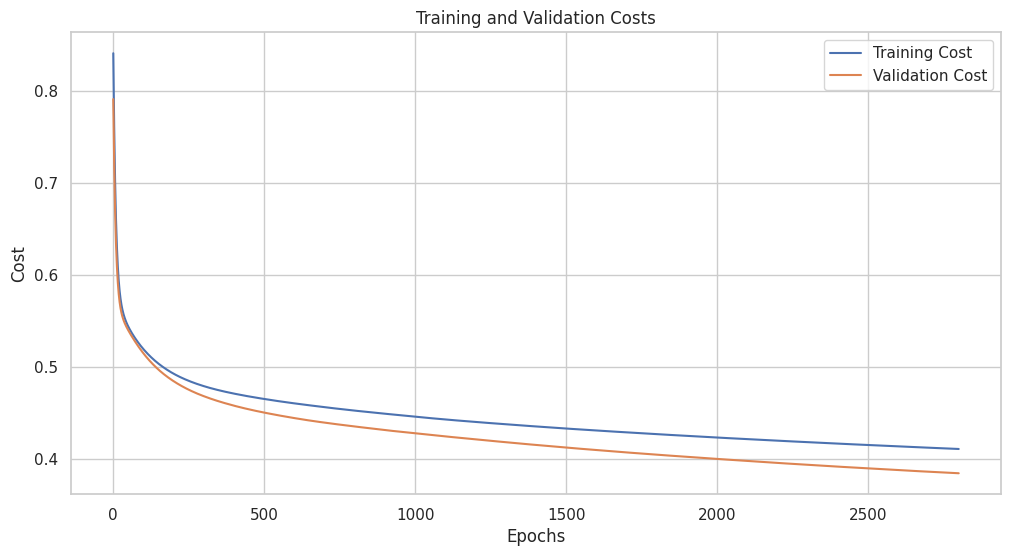

[I 2024-10-02 08:04:26,120] Trial 35 finished with value: 0.8363636363636363 and parameters: {'n_layers': 2, 'n_units_0': 56, 'n_units_1': 83, 'learning_rate': 0.007491445435424052, 'lambda_reg': 0.0011181519383520722}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 1.0238087277801307, Validation Cost = 0.9401146670125143
Train Metrics: {'accuracy': 0.489749430523918, 'precision': 0.489749430523918, 'recall': 1.0, 'f1': 0.6574923547400612}
Validation Metrics: {'accuracy': 0.5409090909090909, 'precision': 0.5409090909090909, 'recall': 1.0, 'f1': 0.7020648967551621}
Epoch 50: Train Cost = 0.5722114096715943, Validation Cost = 0.5609470755182809
Train Metrics: {'accuracy': 0.7881548974943052, 'precision': 0.7531120331950207, 'recall': 0.8441860465116279, 'f1': 0.7960526315789472}
Validation Metrics: {'accuracy': 0.8363636363636363, 'precision': 0.8547008547008547, 'recall': 0.8403361344537815, 'f1': 0.847457627118644}
Epoch 100: Train Cost = 0.5284161993877715, Validation Cost = 0.5172266232015547
Train Metrics: {'accuracy': 0.7938496583143508, 'precision': 0.7875288683602771, 'recall': 0.7930232558139535, 'f1': 0.7902665121668597}
Validation Metrics: {'accuracy': 0.8181818181818182, 'precision': 0.8691588785046729, 'recall': 0.

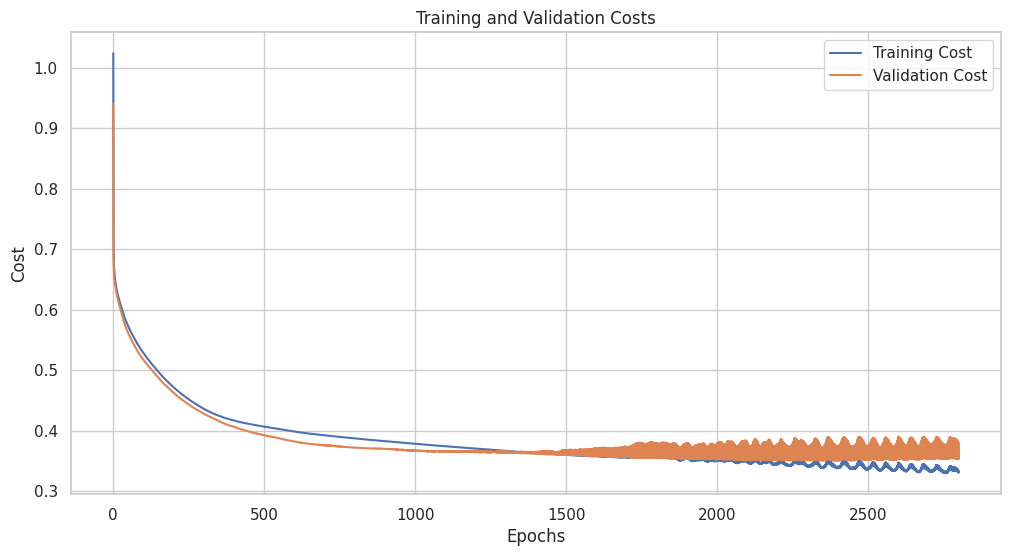

[I 2024-10-02 08:04:54,765] Trial 36 finished with value: 0.8454545454545455 and parameters: {'n_layers': 4, 'n_units_0': 75, 'n_units_1': 76, 'n_units_2': 10, 'n_units_3': 65, 'learning_rate': 0.023161937109825843, 'lambda_reg': 0.009233778143238268}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.99262922247249, Validation Cost = 0.9117281755700359
Train Metrics: {'accuracy': 0.489749430523918, 'precision': 0.489749430523918, 'recall': 1.0, 'f1': 0.6574923547400612}
Validation Metrics: {'accuracy': 0.5409090909090909, 'precision': 0.5409090909090909, 'recall': 1.0, 'f1': 0.7020648967551621}
Epoch 50: Train Cost = 0.8693789337701974, Validation Cost = 0.8041763573597553
Train Metrics: {'accuracy': 0.489749430523918, 'precision': 0.489749430523918, 'recall': 1.0, 'f1': 0.6574923547400612}
Validation Metrics: {'accuracy': 0.5409090909090909, 'precision': 0.5409090909090909, 'recall': 1.0, 'f1': 0.7020648967551621}
Epoch 100: Train Cost = 0.7807971329222962, Validation Cost = 0.7286455879602461
Train Metrics: {'accuracy': 0.489749430523918, 'precision': 0.489749430523918, 'recall': 1.0, 'f1': 0.6574923547400612}
Validation Metrics: {'accuracy': 0.5409090909090909, 'precision': 0.5409090909090909, 'recall': 1.0, 'f1': 0.7020648967551621}
Epoch 150: Train Cost

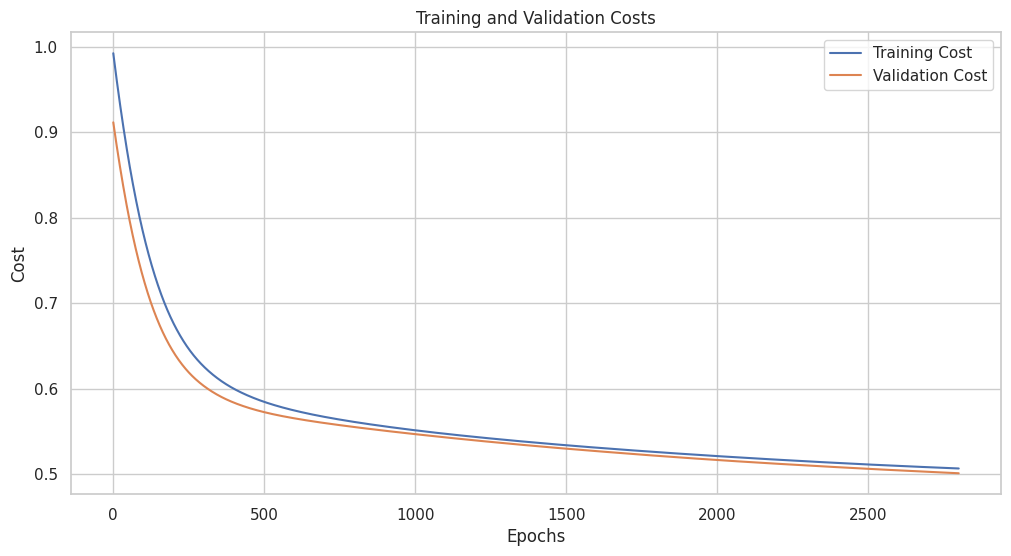

[I 2024-10-02 08:05:23,752] Trial 37 finished with value: 0.7772727272727272 and parameters: {'n_layers': 3, 'n_units_0': 82, 'n_units_1': 63, 'n_units_2': 55, 'learning_rate': 0.00023828184016978416, 'lambda_reg': 0.0003022826093509119}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.6830872912476132, Validation Cost = 0.6756377629270742
Train Metrics: {'accuracy': 0.5580865603644647, 'precision': 0.5406976744186046, 'recall': 0.6488372093023256, 'f1': 0.5898520084566595}
Validation Metrics: {'accuracy': 0.5636363636363636, 'precision': 0.5905511811023622, 'recall': 0.6302521008403361, 'f1': 0.6097560975609756}
Epoch 50: Train Cost = 0.6500944475434602, Validation Cost = 0.6503468540887224
Train Metrics: {'accuracy': 0.6560364464692483, 'precision': 0.7335766423357665, 'recall': 0.46744186046511627, 'f1': 0.5710227272727273}
Validation Metrics: {'accuracy': 0.6681818181818182, 'precision': 0.8194444444444444, 'recall': 0.4957983193277311, 'f1': 0.6178010471204188}
Epoch 100: Train Cost = 0.633280000272228, Validation Cost = 0.6355450258506963
Train Metrics: {'accuracy': 0.673120728929385, 'precision': 0.8095238095238095, 'recall': 0.43488372093023253, 'f1': 0.5658093797276853}
Validation Metrics: {'accuracy': 0.6772727272727272, 'precision':

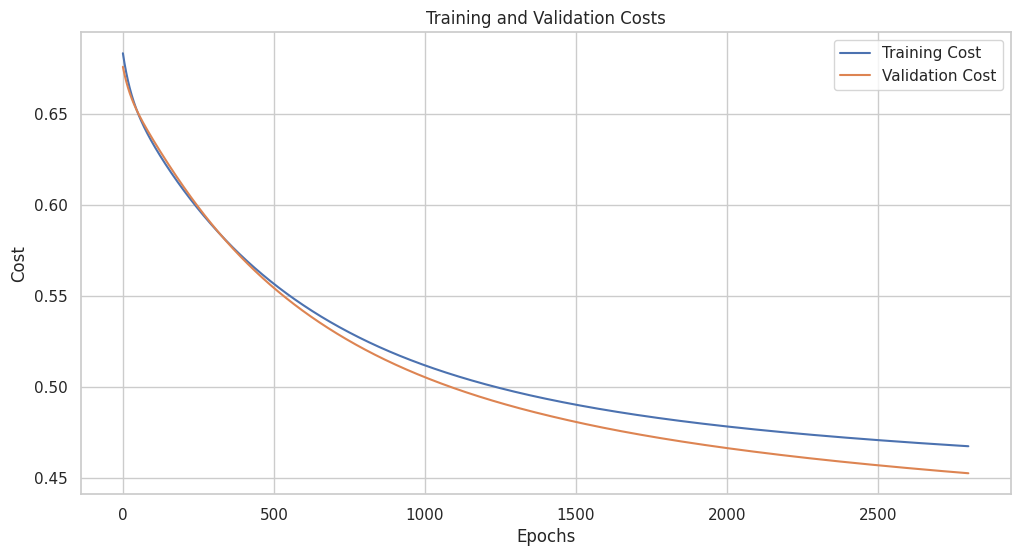

[I 2024-10-02 08:05:36,272] Trial 38 finished with value: 0.8045454545454546 and parameters: {'n_layers': 1, 'n_units_0': 69, 'learning_rate': 0.003532459097638047, 'lambda_reg': 0.0006707670427012821}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.6884773607222683, Validation Cost = 0.6914774481680771
Train Metrics: {'accuracy': 0.6560364464692483, 'precision': 0.7689075630252101, 'recall': 0.4255813953488372, 'f1': 0.5479041916167664}
Validation Metrics: {'accuracy': 0.5772727272727273, 'precision': 0.7954545454545454, 'recall': 0.29411764705882354, 'f1': 0.42944785276073616}
Epoch 50: Train Cost = 0.5096578525511377, Validation Cost = 0.5010024835016307
Train Metrics: {'accuracy': 0.7949886104783599, 'precision': 0.7729257641921398, 'recall': 0.8232558139534883, 'f1': 0.7972972972972973}
Validation Metrics: {'accuracy': 0.8363636363636363, 'precision': 0.8547008547008547, 'recall': 0.8403361344537815, 'f1': 0.847457627118644}
Epoch 100: Train Cost = 0.4306506202845975, Validation Cost = 0.41504770012186193
Train Metrics: {'accuracy': 0.8018223234624146, 'precision': 0.7949308755760369, 'recall': 0.8023255813953488, 'f1': 0.798611111111111}
Validation Metrics: {'accuracy': 0.8318181818181818, 'precision'

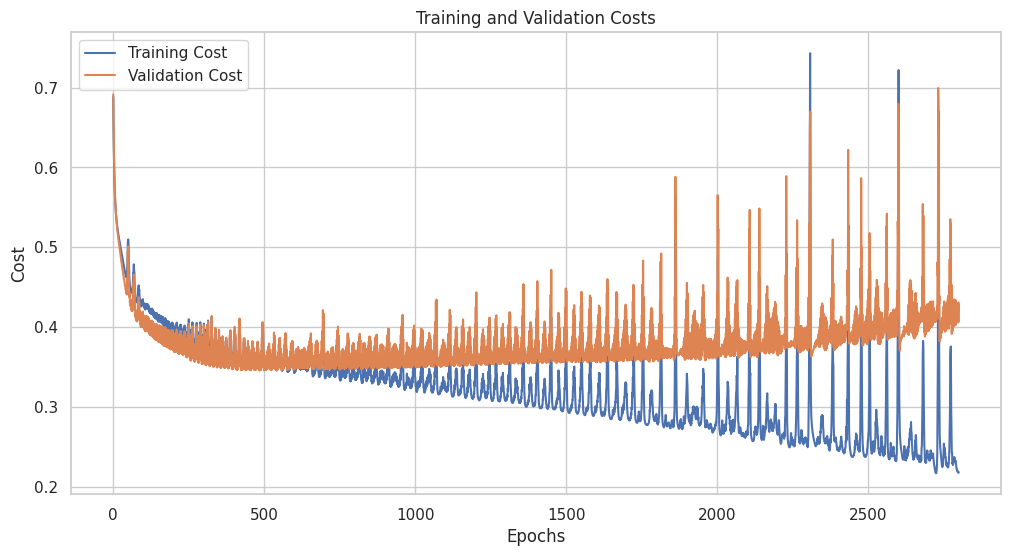

[I 2024-10-02 08:06:10,429] Trial 39 finished with value: 0.85 and parameters: {'n_layers': 5, 'n_units_0': 49, 'n_units_1': 53, 'n_units_2': 29, 'n_units_3': 98, 'n_units_4': 13, 'learning_rate': 0.09999049175914383, 'lambda_reg': 0.0028193965937340477}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.6890700872792894, Validation Cost = 0.6784881247833288
Train Metrics: {'accuracy': 0.5774487471526196, 'precision': 0.5406896551724137, 'recall': 0.9116279069767442, 'f1': 0.6787878787878787}
Validation Metrics: {'accuracy': 0.6727272727272727, 'precision': 0.6358381502890174, 'recall': 0.9243697478991597, 'f1': 0.7534246575342467}
Epoch 50: Train Cost = 0.567823171271663, Validation Cost = 0.5671023871801486
Train Metrics: {'accuracy': 0.806378132118451, 'precision': 0.8299492385786802, 'recall': 0.7604651162790698, 'f1': 0.7936893203883495}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.89, 'recall': 0.7478991596638656, 'f1': 0.8127853881278538}
Epoch 100: Train Cost = 0.5243423732570658, Validation Cost = 0.5186311194061513
Train Metrics: {'accuracy': 0.8075170842824602, 'precision': 0.830379746835443, 'recall': 0.7627906976744186, 'f1': 0.7951515151515153}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.89, 'recall': 

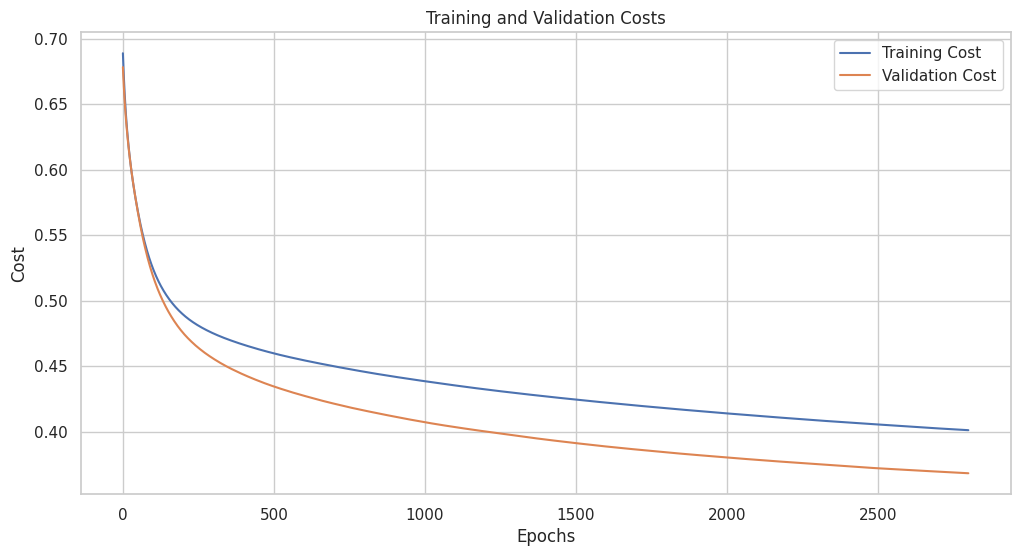

[I 2024-10-02 08:06:36,765] Trial 40 finished with value: 0.8409090909090909 and parameters: {'n_layers': 2, 'n_units_0': 88, 'n_units_1': 87, 'learning_rate': 0.012215156530470762, 'lambda_reg': 0.005184600131308523}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.6974696280319167, Validation Cost = 0.7351600650929244
Train Metrics: {'accuracy': 0.49544419134396356, 'precision': 0.21739130434782608, 'recall': 0.011627906976744186, 'f1': 0.02207505518763797}
Validation Metrics: {'accuracy': 0.45, 'precision': 0.375, 'recall': 0.025210084033613446, 'f1': 0.04724409448818898}
Epoch 50: Train Cost = 0.4881197568652495, Validation Cost = 0.48451156267291184
Train Metrics: {'accuracy': 0.8029612756264237, 'precision': 0.8204488778054863, 'recall': 0.7651162790697674, 'f1': 0.7918170878459688}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8725490196078431, 'recall': 0.7478991596638656, 'f1': 0.8054298642533937}
Epoch 100: Train Cost = 0.4610092847873185, Validation Cost = 0.45048172485652044
Train Metrics: {'accuracy': 0.8029612756264237, 'precision': 0.8188585607940446, 'recall': 0.7674418604651163, 'f1': 0.7923169267707082}
Validation Metrics: {'accuracy': 0.8, 'precision': 0.8640776699029126, 'recall': 0

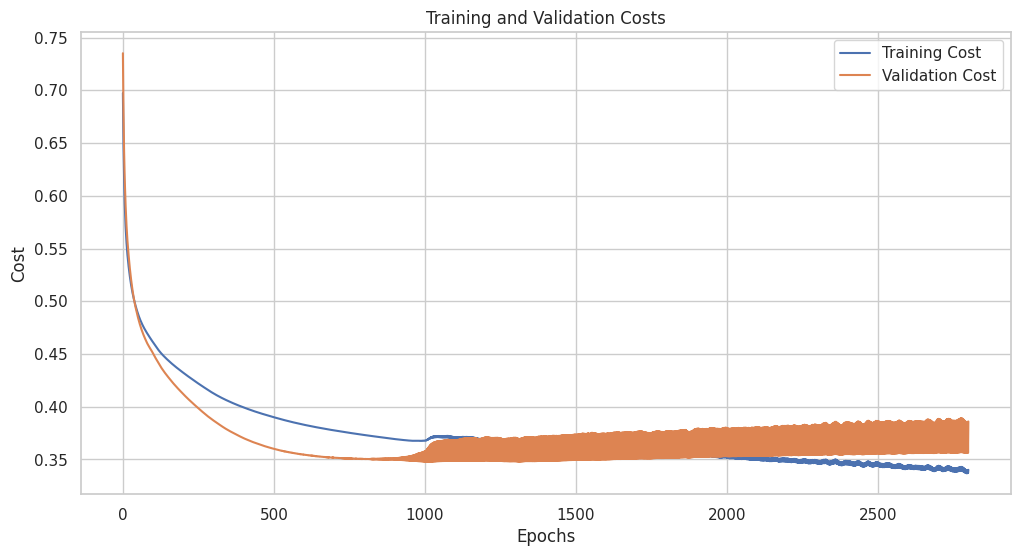

[I 2024-10-02 08:07:01,719] Trial 41 finished with value: 0.8727272727272727 and parameters: {'n_layers': 3, 'n_units_0': 62, 'n_units_1': 80, 'n_units_2': 22, 'learning_rate': 0.05762857764948119, 'lambda_reg': 0.0013848145305268523}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.7184528440988355, Validation Cost = 0.7166695417677807
Train Metrics: {'accuracy': 0.5558086560364465, 'precision': 0.6098901098901099, 'recall': 0.25813953488372093, 'f1': 0.3627450980392157}
Validation Metrics: {'accuracy': 0.55, 'precision': 0.7272727272727273, 'recall': 0.2689075630252101, 'f1': 0.39263803680981596}
Epoch 50: Train Cost = 0.46776103638410393, Validation Cost = 0.4519611669718791
Train Metrics: {'accuracy': 0.8052391799544419, 'precision': 0.8245614035087719, 'recall': 0.7651162790697674, 'f1': 0.7937273823884197}
Validation Metrics: {'accuracy': 0.8, 'precision': 0.8640776699029126, 'recall': 0.7478991596638656, 'f1': 0.8018018018018017}
Epoch 100: Train Cost = 0.4404985248760123, Validation Cost = 0.4165199972471822
Train Metrics: {'accuracy': 0.8109339407744874, 'precision': 0.8316582914572864, 'recall': 0.7697674418604651, 'f1': 0.7995169082125603}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision': 0.89, 'recall': 0.7478991

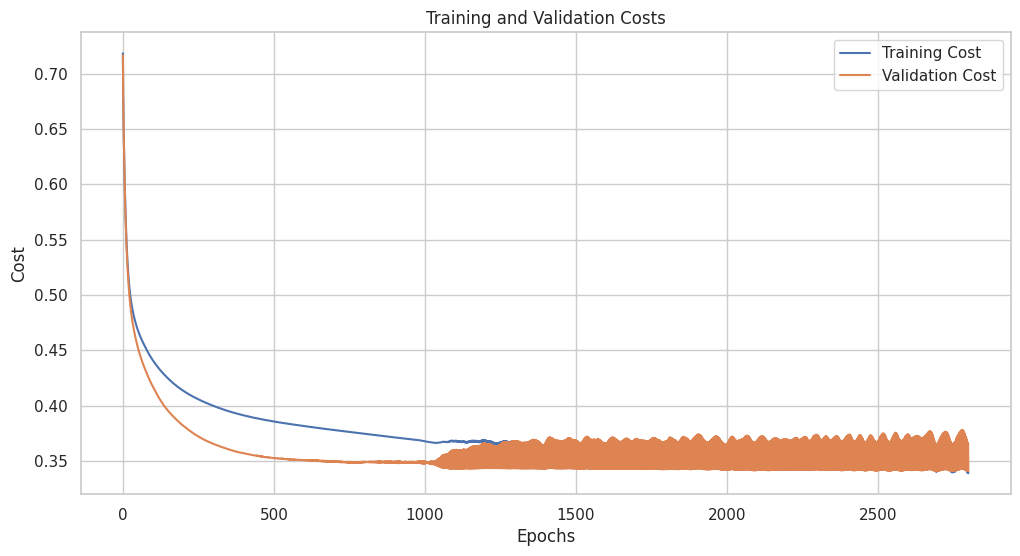

[I 2024-10-02 08:07:25,494] Trial 42 finished with value: 0.8545454545454545 and parameters: {'n_layers': 3, 'n_units_0': 57, 'n_units_1': 68, 'n_units_2': 20, 'learning_rate': 0.06420055384609064, 'lambda_reg': 0.0013889170577483854}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.7304755285147265, Validation Cost = 0.717117538531081
Train Metrics: {'accuracy': 0.4874715261958998, 'precision': 0.4885844748858447, 'recall': 0.9953488372093023, 'f1': 0.655436447166922}
Validation Metrics: {'accuracy': 0.5363636363636364, 'precision': 0.5388127853881278, 'recall': 0.9915966386554622, 'f1': 0.6982248520710058}
Epoch 50: Train Cost = 0.5286985999591449, Validation Cost = 0.5329783635437881
Train Metrics: {'accuracy': 0.8018223234624146, 'precision': 0.8152709359605911, 'recall': 0.7697674418604651, 'f1': 0.7918660287081338}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8653846153846154, 'recall': 0.7563025210084033, 'f1': 0.8071748878923767}
Epoch 100: Train Cost = 0.4766950268004644, Validation Cost = 0.4750714330302123
Train Metrics: {'accuracy': 0.8041002277904328, 'precision': 0.8161764705882353, 'recall': 0.7744186046511627, 'f1': 0.7947494033412889}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0

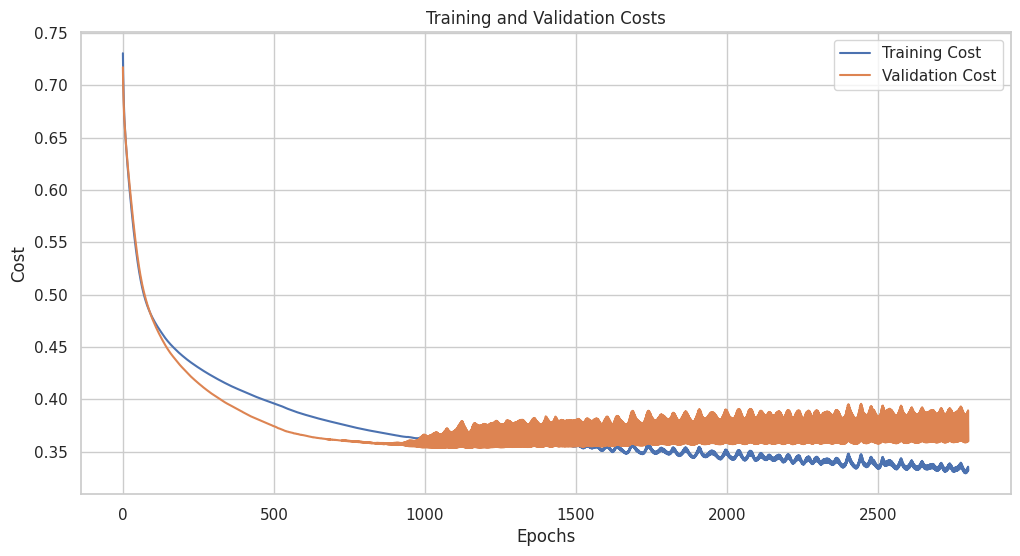

[I 2024-10-02 08:07:54,132] Trial 43 finished with value: 0.8272727272727273 and parameters: {'n_layers': 4, 'n_units_0': 76, 'n_units_1': 83, 'n_units_2': 15, 'n_units_3': 21, 'learning_rate': 0.03173830227962928, 'lambda_reg': 0.0007993544007222218}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.7442139830894249, Validation Cost = 0.763382725444067
Train Metrics: {'accuracy': 0.5125284738041003, 'precision': 1.0, 'recall': 0.004651162790697674, 'f1': 0.009259259259259259}
Validation Metrics: {'accuracy': 0.4636363636363636, 'precision': 1.0, 'recall': 0.008403361344537815, 'f1': 0.016666666666666666}
Epoch 50: Train Cost = 0.47808657247639624, Validation Cost = 0.4643559340619075
Train Metrics: {'accuracy': 0.8006833712984055, 'precision': 0.8132678132678133, 'recall': 0.7697674418604651, 'f1': 0.7909199522102748}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.8598130841121495, 'recall': 0.773109243697479, 'f1': 0.8141592920353983}
Epoch 100: Train Cost = 0.45107926766635964, Validation Cost = 0.42869777483300064
Train Metrics: {'accuracy': 0.7995444191343963, 'precision': 0.8038277511961722, 'recall': 0.7813953488372093, 'f1': 0.7924528301886792}
Validation Metrics: {'accuracy': 0.8227272727272728, 'precision': 0.8703703703703703, 

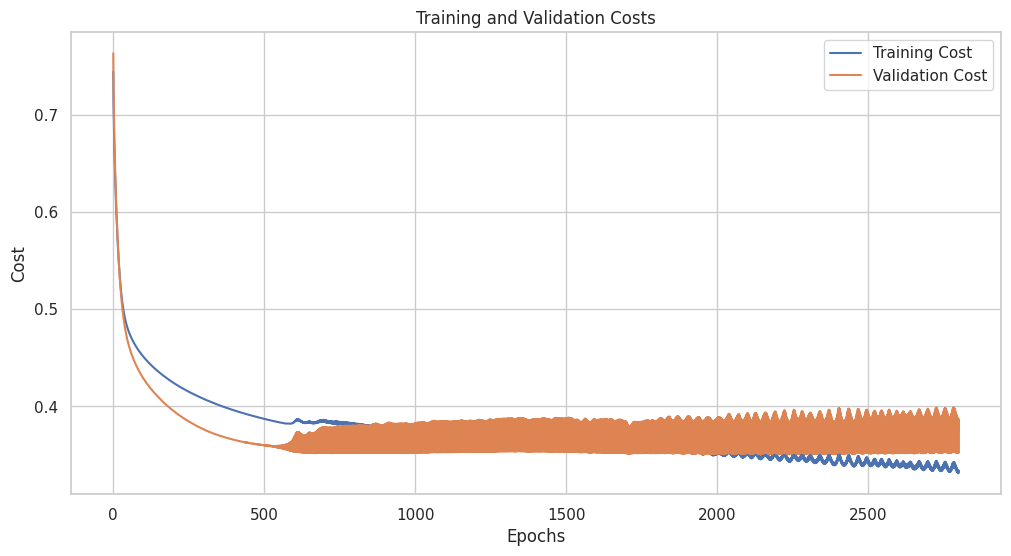

[I 2024-10-02 08:08:24,501] Trial 44 finished with value: 0.8590909090909091 and parameters: {'n_layers': 3, 'n_units_0': 67, 'n_units_1': 93, 'n_units_2': 27, 'learning_rate': 0.06897396666409782, 'lambda_reg': 0.001964032156005492}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.6847402030728034, Validation Cost = 0.7084338983943086
Train Metrics: {'accuracy': 0.5888382687927107, 'precision': 0.9726027397260274, 'recall': 0.16511627906976745, 'f1': 0.2823061630218688}
Validation Metrics: {'accuracy': 0.5727272727272728, 'precision': 1.0, 'recall': 0.21008403361344538, 'f1': 0.34722222222222227}
Epoch 50: Train Cost = 0.4895037210532362, Validation Cost = 0.4794331695030127
Train Metrics: {'accuracy': 0.8052391799544419, 'precision': 0.8261964735516373, 'recall': 0.7627906976744186, 'f1': 0.7932285368802902}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8653846153846154, 'recall': 0.7563025210084033, 'f1': 0.8071748878923767}
Epoch 100: Train Cost = 0.4656101269874054, Validation Cost = 0.4490579340916063
Train Metrics: {'accuracy': 0.7995444191343963, 'precision': 0.8159203980099502, 'recall': 0.7627906976744186, 'f1': 0.7884615384615385}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.866666666

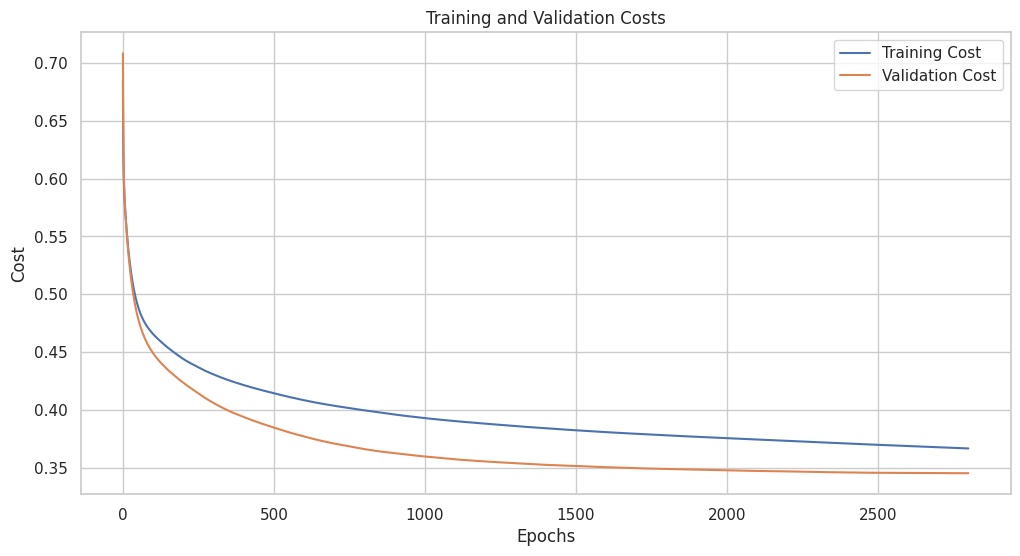

[I 2024-10-02 08:08:47,075] Trial 45 finished with value: 0.8681818181818182 and parameters: {'n_layers': 2, 'n_units_0': 61, 'n_units_1': 76, 'learning_rate': 0.03788921962052326, 'lambda_reg': 0.00024199513661801345}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.6746937365548545, Validation Cost = 0.6804962106019701
Train Metrics: {'accuracy': 0.5797266514806378, 'precision': 0.9692307692307692, 'recall': 0.14651162790697675, 'f1': 0.2545454545454545}
Validation Metrics: {'accuracy': 0.5454545454545454, 'precision': 1.0, 'recall': 0.15966386554621848, 'f1': 0.2753623188405797}
Epoch 50: Train Cost = 0.46354964415256983, Validation Cost = 0.44759972945892795
Train Metrics: {'accuracy': 0.7995444191343963, 'precision': 0.8112745098039216, 'recall': 0.7697674418604651, 'f1': 0.7899761336515513}
Validation Metrics: {'accuracy': 0.8045454545454546, 'precision': 0.8653846153846154, 'recall': 0.7563025210084033, 'f1': 0.8071748878923767}
Epoch 100: Train Cost = 0.4400102634152737, Validation Cost = 0.41991653665569706
Train Metrics: {'accuracy': 0.8086560364464692, 'precision': 0.8291457286432161, 'recall': 0.7674418604651163, 'f1': 0.7971014492753624}
Validation Metrics: {'accuracy': 0.8272727272727273, 'precision': 0.9090909

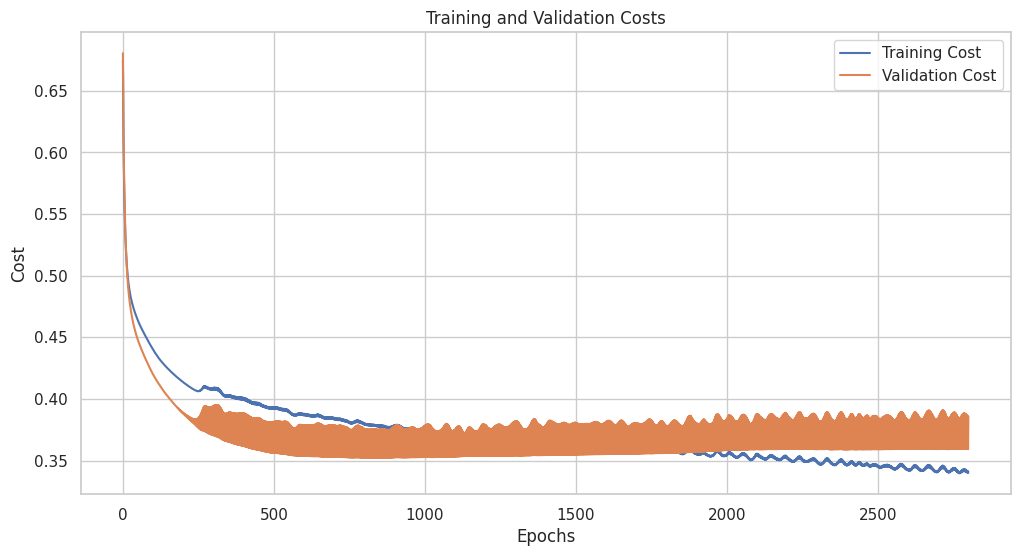

[I 2024-10-02 08:09:15,310] Trial 46 finished with value: 0.8590909090909091 and parameters: {'n_layers': 3, 'n_units_0': 50, 'n_units_1': 60, 'n_units_2': 82, 'learning_rate': 0.06544929180873446, 'lambda_reg': 0.003346699821496196}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.7137756146291006, Validation Cost = 0.7109916931668891
Train Metrics: {'accuracy': 0.5501138952164009, 'precision': 0.5464190981432361, 'recall': 0.4790697674418605, 'f1': 0.510532837670384}
Validation Metrics: {'accuracy': 0.5545454545454546, 'precision': 0.6060606060606061, 'recall': 0.5042016806722689, 'f1': 0.5504587155963303}
Epoch 50: Train Cost = 0.515633317126084, Validation Cost = 0.5026210636963367
Train Metrics: {'accuracy': 0.7961275626423691, 'precision': 0.8209718670076727, 'recall': 0.7465116279069768, 'f1': 0.7819732034104752}
Validation Metrics: {'accuracy': 0.8272727272727273, 'precision': 0.900990099009901, 'recall': 0.7647058823529411, 'f1': 0.8272727272727274}
Epoch 100: Train Cost = 0.4646267813020903, Validation Cost = 0.4412886339795785
Train Metrics: {'accuracy': 0.8018223234624146, 'precision': 0.8137254901960784, 'recall': 0.772093023255814, 'f1': 0.7923627684964202}
Validation Metrics: {'accuracy': 0.8363636363636363, 'precision': 0.8

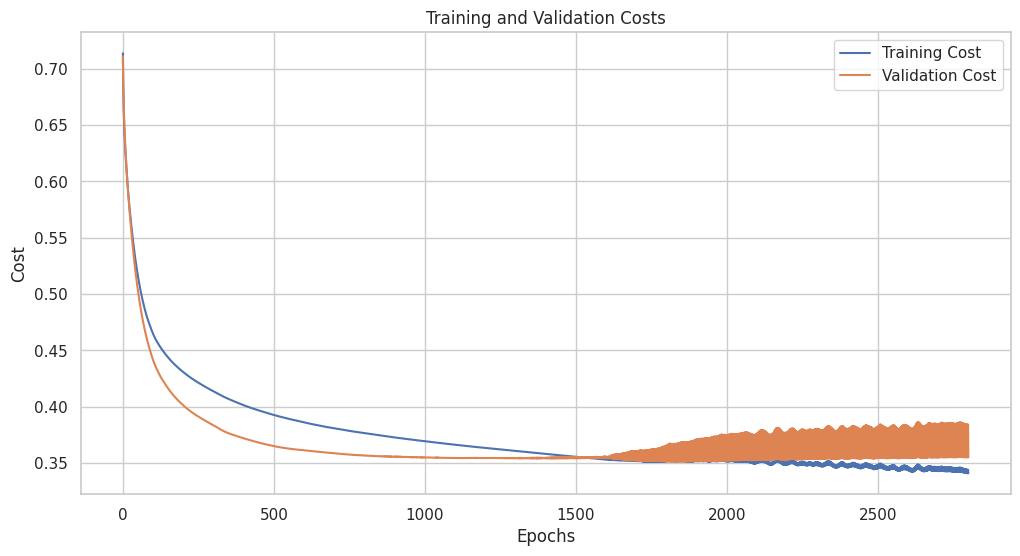

[I 2024-10-02 08:09:56,238] Trial 47 finished with value: 0.8318181818181818 and parameters: {'n_layers': 4, 'n_units_0': 78, 'n_units_1': 72, 'n_units_2': 72, 'n_units_3': 52, 'learning_rate': 0.02050339714235788, 'lambda_reg': 0.00035709187624145957}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.7935389841436681, Validation Cost = 0.7823781738272083
Train Metrics: {'accuracy': 0.4874715261958998, 'precision': 0.4822064056939502, 'recall': 0.6302325581395349, 'f1': 0.5463709677419355}
Validation Metrics: {'accuracy': 0.4863636363636364, 'precision': 0.5227272727272727, 'recall': 0.5798319327731093, 'f1': 0.5498007968127491}
Epoch 50: Train Cost = 0.5092517899045305, Validation Cost = 0.5127683086658488
Train Metrics: {'accuracy': 0.8029612756264237, 'precision': 0.8253164556962025, 'recall': 0.7581395348837209, 'f1': 0.7903030303030304}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.8811881188118812, 'recall': 0.7478991596638656, 'f1': 0.8090909090909092}
Epoch 100: Train Cost = 0.47603522185936403, Validation Cost = 0.47107257168542904
Train Metrics: {'accuracy': 0.7984054669703873, 'precision': 0.8092909535452323, 'recall': 0.7697674418604651, 'f1': 0.7890345649582837}
Validation Metrics: {'accuracy': 0.8227272727272728, 'precision

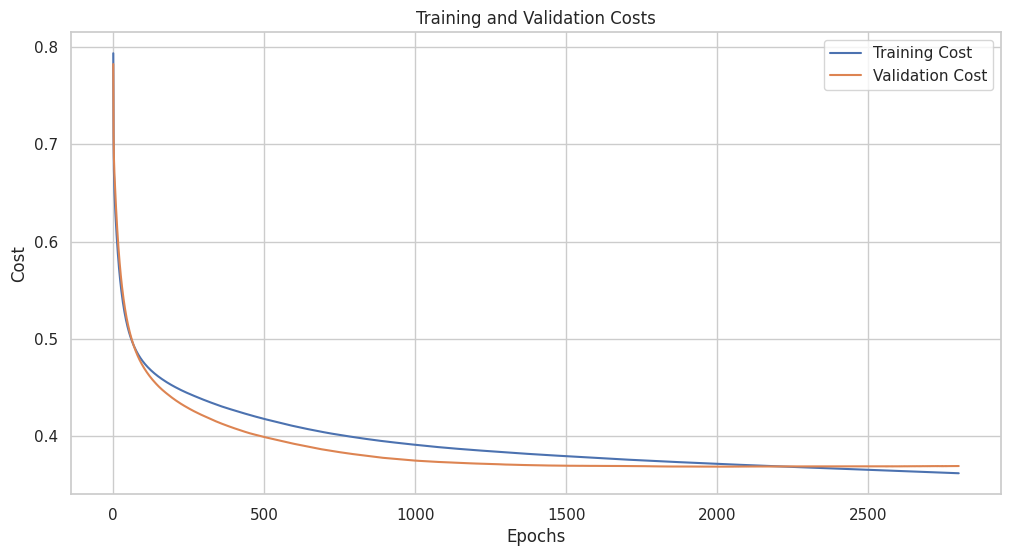

[I 2024-10-02 08:10:18,264] Trial 48 finished with value: 0.85 and parameters: {'n_layers': 2, 'n_units_0': 53, 'n_units_1': 94, 'learning_rate': 0.04946182881455022, 'lambda_reg': 0.01366117606001629}. Best is trial 31 with value: 0.8772727272727273.


Epoch 0: Train Cost = 0.6768000639776539, Validation Cost = 0.6870827994278129
Train Metrics: {'accuracy': 0.5501138952164009, 'precision': 0.6804123711340206, 'recall': 0.15348837209302327, 'f1': 0.2504743833017078}
Validation Metrics: {'accuracy': 0.4727272727272727, 'precision': 0.5652173913043478, 'recall': 0.1092436974789916, 'f1': 0.18309859154929578}
Epoch 50: Train Cost = 0.6634983610304009, Validation Cost = 0.6745955604783413
Train Metrics: {'accuracy': 0.5660592255125285, 'precision': 0.7816091954022989, 'recall': 0.15813953488372093, 'f1': 0.2630560928433269}
Validation Metrics: {'accuracy': 0.4863636363636364, 'precision': 0.6363636363636364, 'recall': 0.11764705882352941, 'f1': 0.19858156028368792}
Epoch 100: Train Cost = 0.6526963186144863, Validation Cost = 0.6638658830888655
Train Metrics: {'accuracy': 0.5842824601366743, 'precision': 0.8282828282828283, 'recall': 0.19069767441860466, 'f1': 0.31001890359168244}
Validation Metrics: {'accuracy': 0.5181818181818182, 'prec

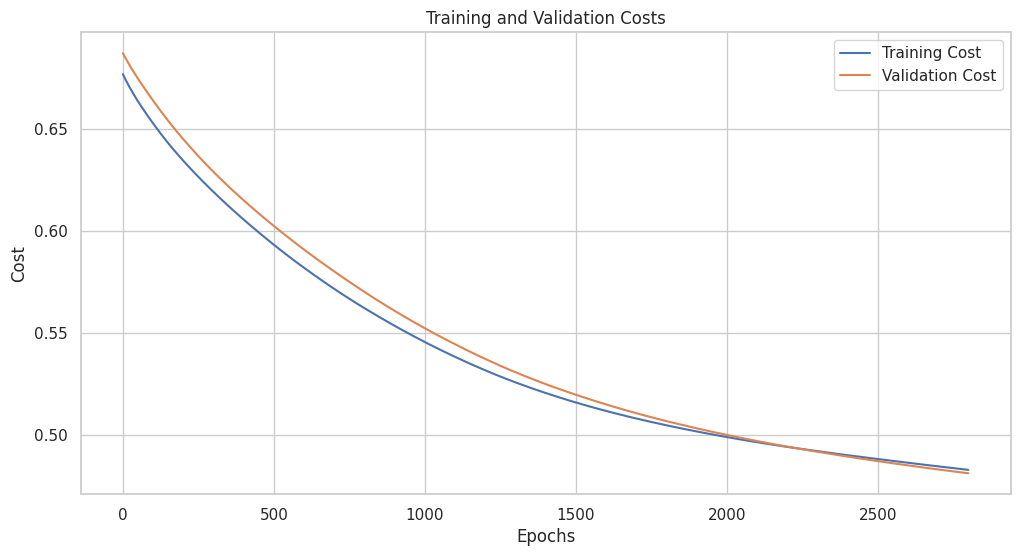

[I 2024-10-02 08:11:04,312] Trial 49 finished with value: 0.8181818181818182 and parameters: {'n_layers': 5, 'n_units_0': 46, 'n_units_1': 85, 'n_units_2': 46, 'n_units_3': 72, 'n_units_4': 76, 'learning_rate': 0.0005706909774658116, 'lambda_reg': 0.00012262651366918347}. Best is trial 31 with value: 0.8772727272727273.


Best parameters:  {'n_layers': 3, 'n_units_0': 66, 'n_units_1': 94, 'n_units_2': 34, 'learning_rate': 0.05700347634172194, 'lambda_reg': 0.0009178504123377064}


In [ ]:

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

best_params = study.best_params
print("Best parameters: ", best_params)


best_layer_dims = [X_train.shape[0]] + [
    best_params[f'n_units_{i}'] for i in range(best_params["n_layers"])] + [1]
best_learning_rate = best_params["learning_rate"]
best_lambd = best_params["lambda_reg"]



In [ ]:
print("Best parameters: ", best_params)

Best parameters:  {'n_layers': 3, 'n_units_0': 66, 'n_units_1': 94, 'n_units_2': 34, 'learning_rate': 0.05700347634172194, 'lambda_reg': 0.0009178504123377064}


***Preproceccing the test_df and apply on it the model to generate the predicted survivors.***

<Axes: >

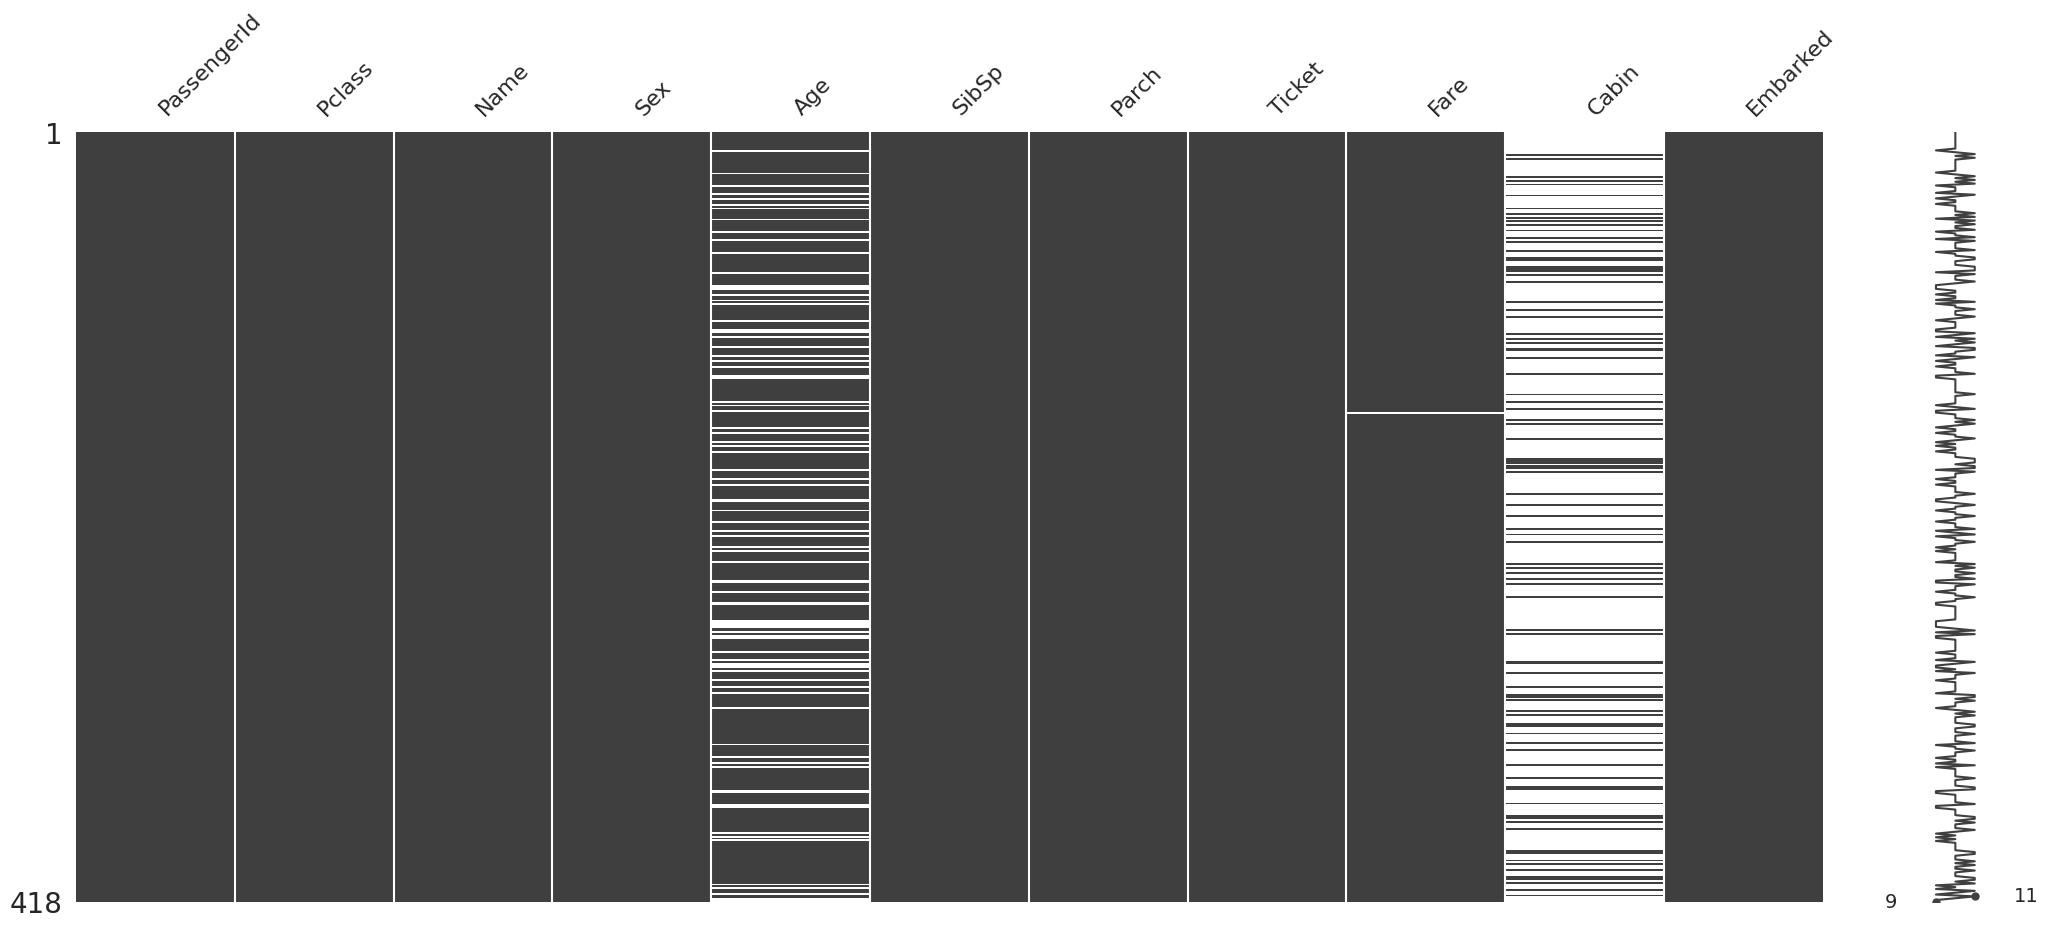

In [ ]:
msno.matrix(test_df)

***I will apply the same preprocessing that I did on the training set***

In [ ]:
test_df

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [ ]:
test_df['Age'] = test_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df = test_df.drop(columns=['Cabin'])
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df = test_df.drop(columns=['Name', 'Ticket'])

<ipython-input-14-344cf64de7bf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


<Axes: >

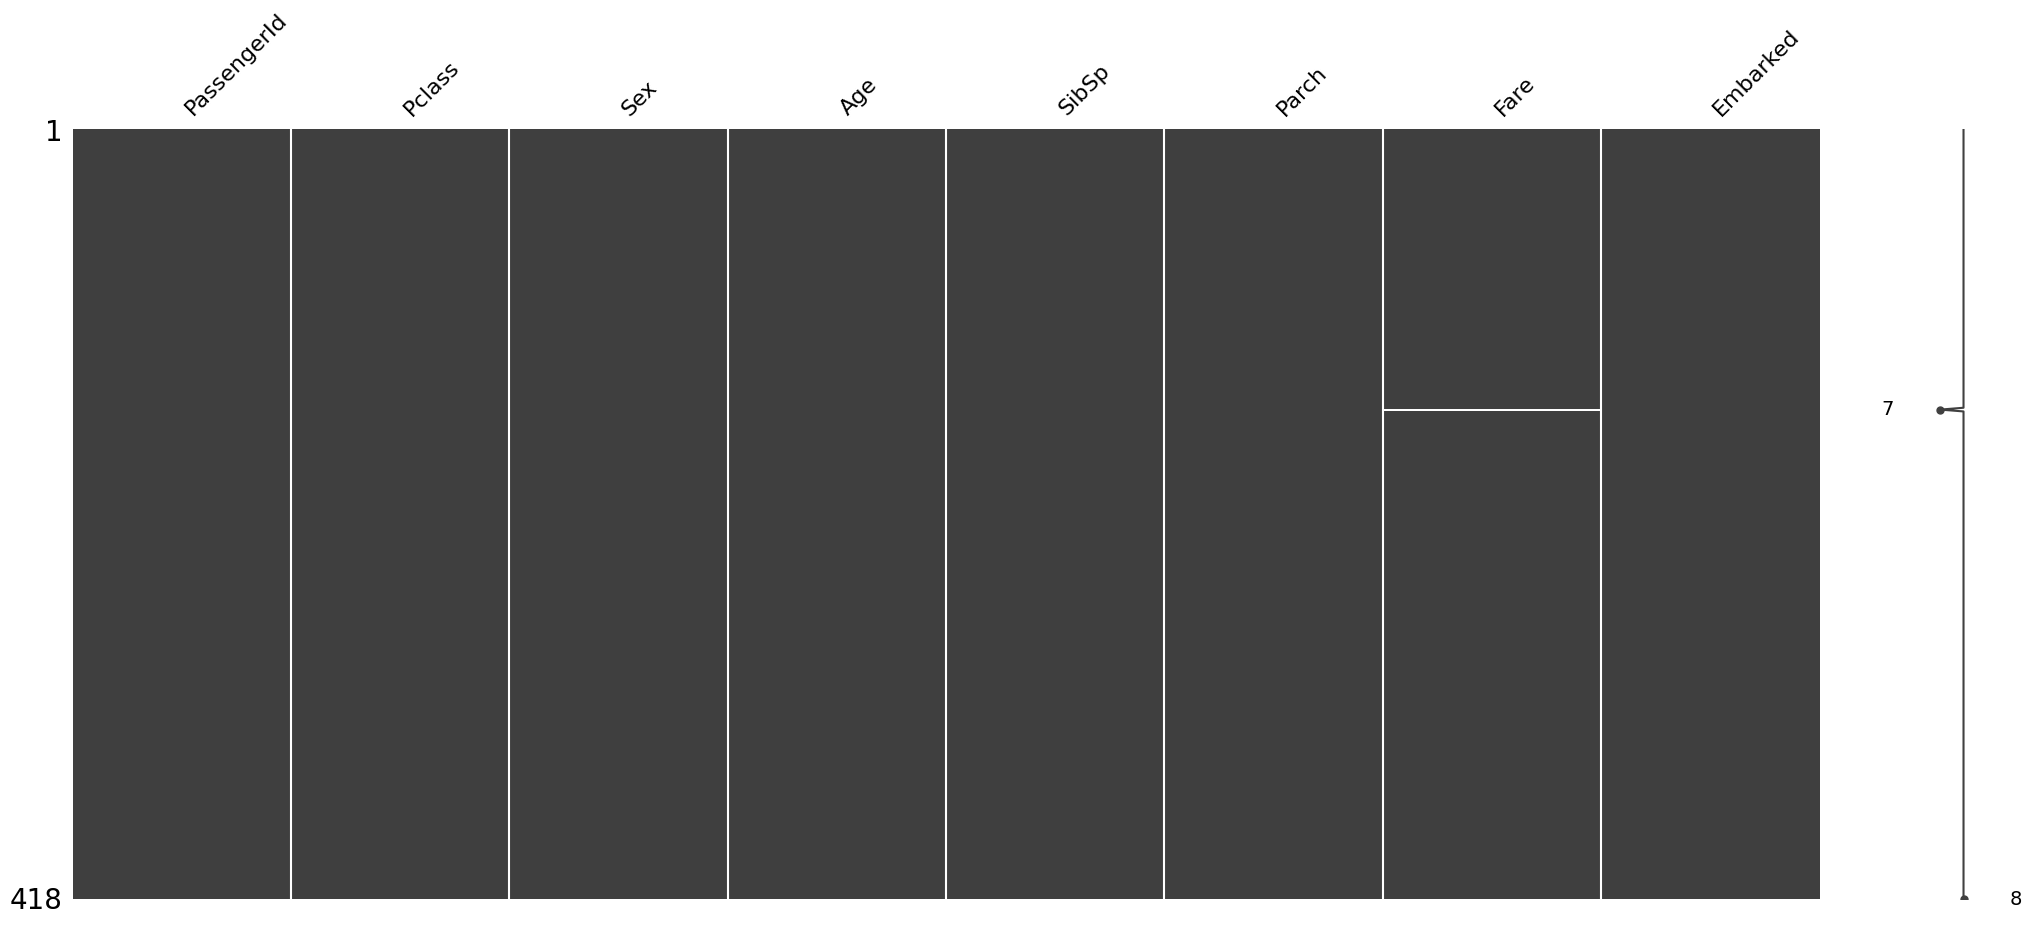

In [ ]:
msno.matrix(test_df)

In [ ]:
label_encoder = LabelEncoder()
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])
test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked'])

In [ ]:
test_scale = MinMaxScaler()
test_scaled = test_scale.fit_transform(test_df)


In [ ]:
test_df = pd.DataFrame(test_scaled, columns = test_df.columns)

In [ ]:
test_df = test_df.T

In [ ]:
print(test_df.shape)

(8, 418)


***Omptimized model using the best hyperparameters resulted from optuna***

Epoch 0: Train Cost = 0.7010874094353029, Validation Cost = 0.7049590222953576
Train Metrics: {'accuracy': 0.520501138952164, 'precision': 0.5306122448979592, 'recall': 0.1813953488372093, 'f1': 0.27036395147313697}
Validation Metrics: {'accuracy': 0.4863636363636364, 'precision': 0.5681818181818182, 'recall': 0.21008403361344538, 'f1': 0.3067484662576687}
Epoch 50: Train Cost = 0.4733034645583802, Validation Cost = 0.4680312221769723
Train Metrics: {'accuracy': 0.8075170842824602, 'precision': 0.8287153652392947, 'recall': 0.7651162790697674, 'f1': 0.7956469165659009}
Validation Metrics: {'accuracy': 0.8090909090909091, 'precision': 0.8737864077669902, 'recall': 0.7563025210084033, 'f1': 0.8108108108108107}
Epoch 100: Train Cost = 0.4447356157691836, Validation Cost = 0.43131633846805184
Train Metrics: {'accuracy': 0.7972665148063781, 'precision': 0.8103448275862069, 'recall': 0.7651162790697674, 'f1': 0.7870813397129186}
Validation Metrics: {'accuracy': 0.8136363636363636, 'precision

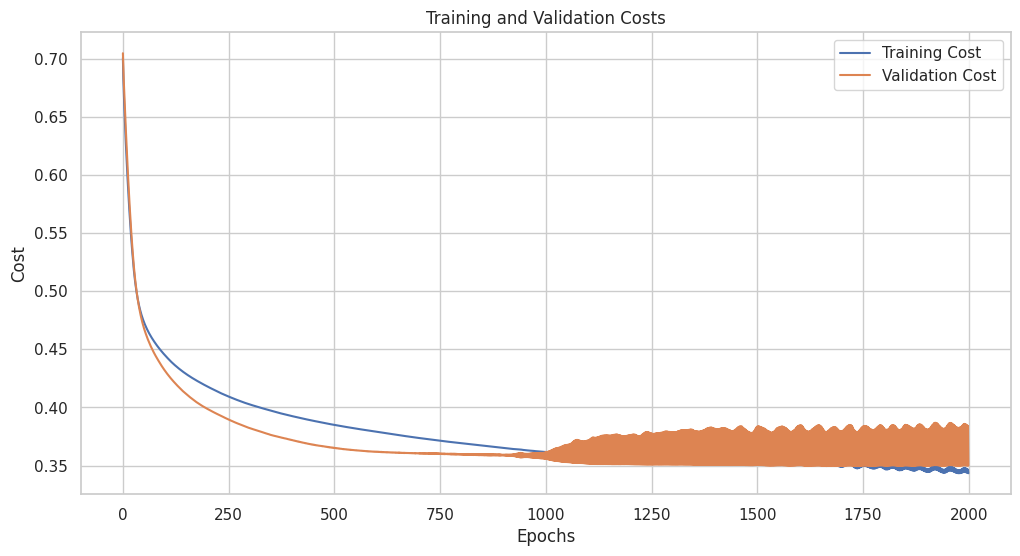

In [ ]:
layer_dims = [X_train.shape[0], 66, 94, 34, 1]

learning_rate = 0.05700347634172194
lambd = 0.0009178504123377064


params, train_costs, val_costs = model(
    X_train, y_train, X_val, y_val,
    layer_dims=layer_dims,
    learning_rate=learning_rate,
    num_epochs=2000,
    checkpoint_file='model_checkpoint.pkl',
    lambd=lambd
)

In [ ]:
train_predictions = predict(X_train, params)
val_predictions = predict(X_val, params)

train_metrics = compute_metrics(train_predictions, y_train.to_numpy().flatten())
val_metrics = compute_metrics(val_predictions, y_val.to_numpy().flatten())

print("\nFinal Metrics:")
print(f"Train Metrics: {train_metrics}")
print(f"Validation Metrics: {val_metrics}")


Final Metrics:
Train Metrics: {'accuracy': 0.8530751708428246, 'precision': 0.9263456090651558, 'recall': 0.7604651162790698, 'f1': 0.8352490421455939}
Validation Metrics: {'accuracy': 0.8318181818181818, 'precision': 0.9361702127659575, 'recall': 0.7394957983193278, 'f1': 0.8262910798122066}


In [ ]:
test_df.shape

(418, 8)

***in the following line of code i tried to save the model so that I don't train again when I need it***

In [ ]:
dnn_model = 'dnn_model.pkl'
with open(dnn_model, 'wb') as model_file:
    pickle.dump(params, model_file)

***loading the saved model***

In [ ]:
model_filename = 'dnn_model.pkl'
with open(model_filename, 'rb') as file:
    saved_params = pickle.load(file)

In [ ]:
test_df.shape

(8, 418)

In [ ]:
test_pred = predict(test_df.values, saved_params)

In [ ]:
test_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
test_pred = test_pred.flatten()

In [ ]:
test_df = test_df.T
print(test_df.shape)

(418, 8)


***Generating the Survived label for the
 test set and save it as csv***

In [ ]:
predicted_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_pred
})

In [ ]:
predicted_df['PassengerId'] = origin_df['PassengerId']

In [ ]:
predicted_df.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [ ]:
predicted_df.to_csv('prediction.csv', index=False)

***To evaluate my model on the testing set, I have loaded the generated predection of survived label; the, I have loaded it into Kaggle. I got a test accuracy of 0.79 as the below screenshot shows.***

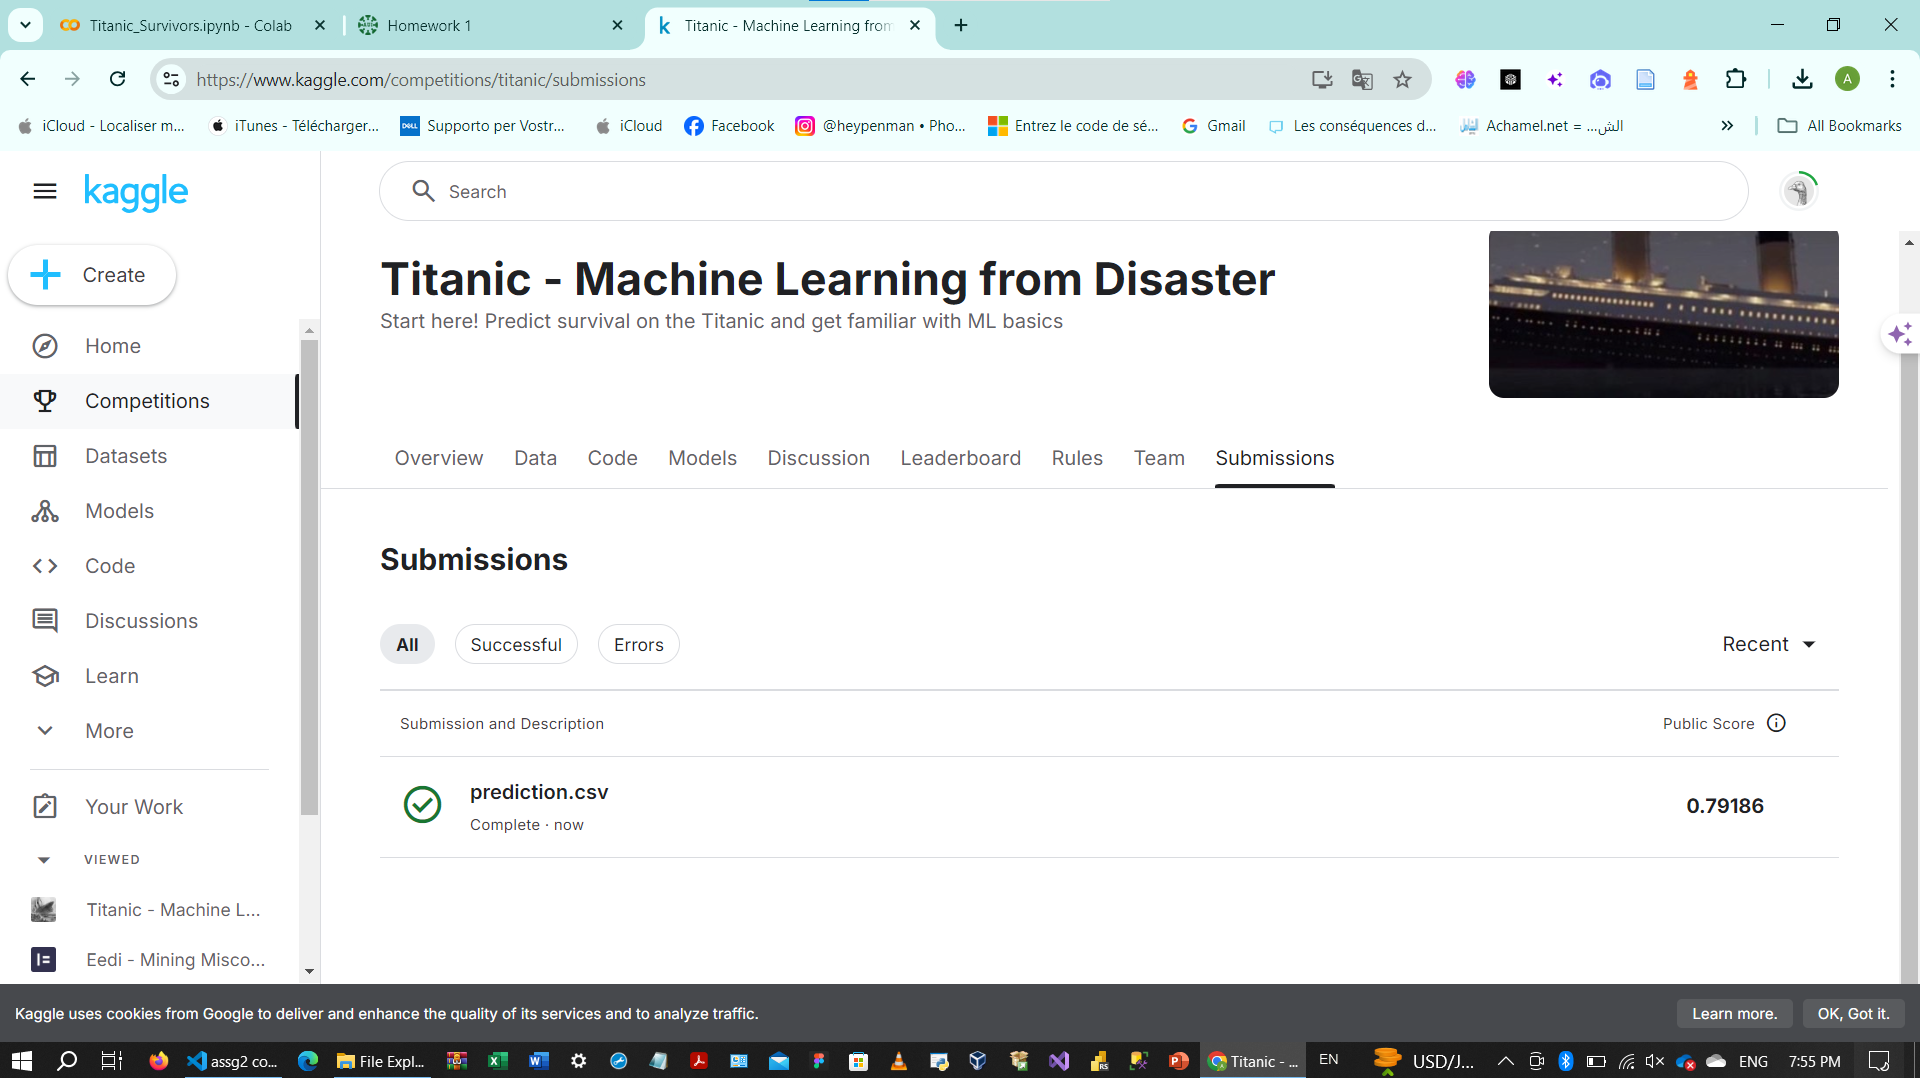

***References:***


*   https://www.blog.trainindata.com/overcoming-class-imbalance-with-smote/
*   https://docs.databricks.com/en/machine-learning/automl-hyperparam-tuning/optuna.html
*   https://numpy.org/doc/stable/reference/generated/numpy.sum.html
*   https://github.com/ResidentMario/





